# Modelo De Red Neuronal Para Emprendimientos Sociales

ESTA ES LA VERSION 2 DEL MODELO, EN EL GRAFO NO SE TIENE EN CUENTA LA CANTIDAD TOTAL DE SEGUIDORES DE CADA EMPRENDIMIENTO

In [1]:
# INSTALACIÓN DE LIBRERIAS NECESARIAS

!pip install networkx transformers pysentimiento pandas numpy scikit-learn matplotlib nltk seaborn plotly

In [2]:
# EN CASO DE ERROR DE VERSIONES DE TORCH, DESINSTALAR Y VOLVER A INSTALAR

"""
!pip uninstall torch torchvision torchaudio torch-sparse torch-scatter torch-geometric pyg-lib -y
"""

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: torch_sparse 0.6.18+pt26cu124
Uninstalling torch_sparse-0.6.18+pt26cu124:
  Successfully uninstalled torch_sparse-0.6.18+pt26cu124
Found existing installation: torch_scatter 2.1.2+pt26cu124
Uninstalling torch_scatter-2.1.2+pt26cu124:
  Successfully uninstalled torch_scatter-2.1.2+pt26cu124
Found existing installation: torch_geometric 2.5.3
Uninstalling torch_geometric-2.5.3:
  Successfully uninstalled torch_geometric-2.5.3
Found existing installation: pyg-lib 0.4.0+pt26cu124
Uninstalling pyg-lib-0.4.0+pt26cu124:
  Successfully uninstalled pyg-lib-0.4.0+pt26

In [3]:
# Instalación de PyTorch 2.6.0 con soporte para CUDA 12.4, incluyendo torchvision y torchaudio


!pip install torch==2.6.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
  Using cached https://download.pytorch.org/whl/cu124/torch-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/cu124/torchvision-0.21.0%2Bcu124-cp311-cp311-linux_x86_64.whl.metadata (6.1 kB)
  Using cached https://download.pytorch.org/whl/cu124/torchaudio-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl.metadata (6.6 kB)
Using cached https://download.pytorch.org/whl/cu124/torch-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl (768.5 MB)
Using cached https://download.pytorch.org/whl/cu124/torchvision-0.21.0%2Bcu124-cp311-cp311-linux_x86_64.whl (7.3 MB)
Using cached https://download.pytorch.org/whl/cu124/torchaudio-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl (3.4 MB)


In [4]:
# Instalación de PyG (PyTorch Geometric) y sus dependencias compatibles con PyTorch 2.6.0 y CUDA 12.4


!pip install torch-scatter==2.1.2+pt26cu124 torch-sparse==0.6.18+pt26cu124 torch-geometric==2.5.3 -f https://data.pyg.org/whl/torch-2.6.0+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
  Using cached https://data.pyg.org/whl/torch-2.6.0%2Bcu124/torch_scatter-2.1.2%2Bpt26cu124-cp311-cp311-linux_x86_64.whl (10.8 MB)
  Using cached https://data.pyg.org/whl/torch-2.6.0%2Bcu124/torch_sparse-0.6.18%2Bpt26cu124-cp311-cp311-linux_x86_64.whl (5.0 MB)
  Using cached torch_geometric-2.5.3-py3-none-any.whl.metadata (64 kB)
Using cached torch_geometric-2.5.3-py3-none-any.whl (1.1 MB)


In [5]:
# Instalación de pyg-lib 0.4.0 compatible con PyTorch 2.6.0 y CUDA 12.4 desde el repositorio oficial de PyG


!pip install pyg-lib==0.4.0+pt26cu124 -f https://data.pyg.org/whl/torch-2.6.0+cu124.html

Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
  Using cached https://data.pyg.org/whl/torch-2.6.0%2Bcu124/pyg_lib-0.4.0%2Bpt26cu124-cp311-cp311-linux_x86_64.whl (4.7 MB)


In [22]:
# IMPORTAR BIBILOTECAS

# files se utiliza para subir los archivos .csv solo a google colab.
"""
from google.colab import files
"""

import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from transformers import AutoTokenizer, AutoModel
import torch
import torch_geometric

In [23]:
# Verifica si hay una GPU disponible, si la hay retorna True, sino False
print(torch.cuda.is_available())   # Debería mostrar True
print(torch.__version__)  # Debería mostrar '2.6.0' si PyTorch se instaló correctamente
print(torch.version.cuda)  # Debería mostrar '12.4', indicando que se está usando CUDA 12.4 (cu124)
import torch_geometric
print(torch_geometric.__version__)  # Debería imprimir la versión de PyTorch Geometric sin errores si está instalado correctamente

True
2.6.0+cu124
12.4
2.5.3


In [ ]:
# Subir los archivos CSV (SOLO en Google Colab)
uploaded = files.upload()   

### Cargar los CSV a DataFrames

In [ ]:
"""
    PARA GOOGLE COLAB
"""
emprendimientos = pd.read_csv('emprendimientos.csv')
publicaciones = pd.read_csv('publicaciones.csv')
comentarios = pd.read_csv('comentarios.csv')
seguidores = pd.read_csv('seguidores.csv')
emprendimiento_tematica = pd.read_csv('emprendimiento_tematica.csv')
municipios = pd.read_csv('municipios.csv')
alcances = pd.read_csv('alcance.csv')
tematicas = pd.read_csv('tematicas.csv')

In [40]:
"""
    PARA JUPYTER NOTEBOOK
"""
emprendimientos = pd.read_csv('.\DATOS\emprendimientos.csv')
publicaciones = pd.read_csv('.\DATOS\publicaciones.csv')
comentarios = pd.read_csv('.\DATOS\comentarios.csv')
seguidores = pd.read_csv('.\DATOS\seguidores.csv')
emprendimiento_tematica = pd.read_csv('.\DATOS\emprendimiento_tematica.csv')
municipios = pd.read_csv('.\DATOS\municipios.csv')
alcances = pd.read_csv('.\\DATOS\\alcance.csv')
tematicas = pd.read_csv('.\\DATOS\\tematicas.csv')


In [15]:
"""
    EN CASO DE ERROR DE CODIFICACION PARA ALGÚN CSV
"""
print("")
# emprendimientos = pd.read_csv('emprendimientos.csv', encoding='utf-8-sig')

In [25]:
print("Municipios:\n", municipios.head())

Municipios:
    id_municipio municipio
0             1   Popayán
1             2    Silvia
2             3    Totoró
3             4   Cajibío
4             5  Piendamó


In [26]:
print("Alcances:\n", alcances.head())

Alcances:
    id_alcance      tipo
0           1     Local
1           2  Regional


In [27]:
print("Temáticas:\n", tematicas.tail())

Temáticas:
     id_tematica                    nombre
14           15          Inclusión social
15           16          Derechos humanos
16           17        Justicia ambiental
17           18   Participación ciudadana
18           19  Cultura Afrodescendiente


In [28]:
print("Publicaciones:\n", publicaciones.head())

Publicaciones:
    id_publicacion                                          contenido  n_likes  \
0               1  ¡Cultiva con nosotros! Únete a EcoHuertas Urba...        5   
1               2  ¡Verde en la ciudad! Participa en nuestro huer...        4   
2               3  Sembremos juntos un futuro sostenible. Ven a E...        3   
3               4  ¡Huertos para todos! Taller de compostaje este...        6   
4               5  Crece con EcoHuertas! Únete a nuestra comunida...        4   

   id_emprendimiento  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  


In [29]:
print("Comentarios:\n", comentarios.head())

Comentarios:
    id_comentario                                         comentario  \
0              1  ¡Qué bacano! Voy este sábado a sembrar. 🌱 #Hue...   
1              2  ¿Dónde es el taller en Popayán, parce? #Huerto...   
2              3  Buen proyecto, pero falta más info del horario...   
3              4  Me encanta la idea, pero ojalá sea más largo. ...   
4              5  ¡Qué chimba! @JuanCa, vente al taller. 🙌 #Sost...   

   id_publicacion  
0               1  
1               1  
2               1  
3               1  
4               1  


---
<h1 style="color: #FF0000">Arquitectura De La Red Neuronal | $GraphSAGE$ 📐📏🧱🏗️</h1>

---

<h2 style="color: #009eff">¿Qué es $GraphSAGE?$</h2>


GraphSAGE (Graph Sample and AggregatE) es una arquitectura de redes neuronales diseñada para aprender representaciones (embeddings) de nodos en grafos de manera **inductiva**, es decir, puede generalizar a nodos no vistos durante el entrenamiento. Es especialmente útil en grafos grandes y dinámicos, como redes sociales, redes de citas académicas o redes de recomendación, donde los datos no son estáticos y los nodos pueden cambiar con el tiempo.

A diferencia de métodos transductivos como DeepWalk o Node2Vec, que requieren entrenar con todo el grafo, GraphSAGE utiliza un enfoque basado en **muestreo de vecinos** y **agregación local**, lo que lo hace escalable y eficiente.

---

<h2 style="color: #009eff">Resumen General</h2>

La arquitectura en este caso es como un **"Cartografo"** que mapea un grafo de emprendimientos sociales en un espacio de embeddings. Cada emprendimiento (nodo) comienza con un "Perfil" rico en información (likes, seguidores, tematicas, texto, etc.), y el modelo explora su vecindario en el grafo, mezclando estas características con las de sus vecinos mediante un promedio ponderado. A través de dos capas convolucionales, refina estas representaciones usando *ReLU* y *DropOut* para mantener la robustez. Al final, produce embeddings compactos que captura tanto los atrubutos del nodo como su contexto estructural, listos para predecir conexiones entre emprendimientos con un predictor basado en *ReLU* y *Sigmoide*.

Es una arquitectura eficiente y escalable que transforma un grafo complejo en un mapa de relaciones útiles.

---

<span ><h1 style="color: #FF0000">**1. Explicación General de la Construcción del Grafo y la Arquitectura**</h1></span>

<h2 style="color: #009eff">1.1 Construcción del Grafo</h2>
   
El grafo $( G = (V, E) )$ representa una red de emprendimientos sociales, donde:

**<span style="color:#1E90FF">$Nodos (V)$</span>**: Cada nodo corresponde a un emprendimiento, identificado por id_emprendimiento. Los nodos contienen atributos como:

 - Nombre, descripción, redes sociales, sitio web.
 - Municipio de origen 
 - Temáticas asociadas 
 - Características numéricas (total de likes, cantidad de seguidores).
 - Embeddings de texto generados a partir de descripciones, publicaciones y comentarios.


**<span style="color:#1E90FF">$Aristas (E)$</span>**: Las conexiones entre emprendimientos se generan según tres criterios:

 - **Interacciones:** Se crean aristas entre emprendimientos que comparten temáticas en publicaciones, ponderadas por el número de likes (n_likes).

 - **Similitudes:** Se conectan emprendimientos con temáticas comunes, mismo municipio o alcance, con un peso calculado como:

    <div style="text-align: center;">
    <span style="font-size: 18px;">$w = \text{temas comunes} + \text{mismo municipio} + \text{mismo alcance}$</span>
    </div>     

    ­  

 - **Seguidores:** Se incrementa el peso de las aristas existentes según la cantidad de seguidores, cantidad normalizada:

    <div style="text-align: center;">
    <span style="font-size: 22px">$w' = w + \frac{\text{cantidad seguidores}}{1000}$</span>
    </div>   


<h2 style="color: #009eff">1.2 Proceso de Construcción</h2>

<div style="text-align: left">

- **Carga de Datos:** Los datos se extraen de una base de datos MySQL (emprendimientos_sociales), con tablas como Emprendimiento, Publicacion, Comentario,    Seguidores, y emprendimiento_tematica. Los embeddings de texto (descripciones, publicaciones, comentarios) se cargan desde archivos .npy.

­
   
- **Creación de Nodos:** Cada emprendimiento se agrega como un nodo en un grafo networkx.Graph, con atributos iniciales y características procesadas:
­

  <div style="text-align: left">
      
   - Numéricas: Likes y seguidores normalizados con MinMaxScaler.
   - Categóricas: Municipio y alcance codificados con OneHotEncoder; temáticas como matriz binaria.
   - Textuales: Embeddings combinados con pesos de **$ \text{descripciones} = 0.5, \text{publicaciones} = 0.3, \text{comentarios} = 0.2$** y reducidos a 128 dimensiones con TruncatedSVD.

  ­
  </div>

- **Creación de Aristas:** Se generan conexiones basadas en interacciones, similitudes y seguidores, asegurando un grafo no dirigido con pesos significativos.

    ­


    
- **Preparación para PyG:** El grafo se convierte a un objeto torch_geometric.data.Data, con:

    <div style="text-align: left">

     - **x**: Matriz de características combinadas (numéricas y textuales).
     - **edge_index:** Índices de aristas bidireccionales.
     - **edge_attr:** Pesos de las aristas.

    </div>

 

    
</div>


<h2 style="color: #009eff">1.3 Resultado</h2>

<div style="text-align: left">
    
- **Nodos:** Representan emprendimientos con características ricas (numéricas, categóricas, textuales).
- **Aristas:** Capturan relaciones basadas en interacciones y similitudes, con pesos que reflejan la fuerza de la conexión.
- **Escalabilidad:** El uso de TruncatedSVD y normalización asegura que el grafo sea manejable computacionalmente.
    
</div>

---

<h1 style="color: #FF0000">2. Arquitectura de $GraphSAGE$</h1>
   
GraphSAGE es un modelo de aprendizaje en grafos que genera embeddings para nodos mediante muestreo de vecinos, agregación y propagación. A continuación, se detalla su funcionamiento.

<h2 style="color: #009eff">2.1. Muestreo de Vecinos</h2>

Para cada nodo $(v)$, $GraphSAGE$ selecciona un subconjunto fijo de vecinos de forma aleatoria, reduciendo la complejidad computacional. En el código, el modelo utiliza la estructura completa del grafo **(edge_index)**, pero el muestreo implícito ocurre en la convolución **SAGEConv**, que procesa solo los vecinos conectados.

**Fórmula:** Para un nodo $(v)$, el vecindario muestreado es:

<div style="text-align: center">
    
<div style="font-size: 20px">$( \mathcal{N}(v) \subseteq { u \mid (u, v) \in E } )$</div>
    
</div>
­

**Implementación:** La clase $SAGEConv$ de PyTorch Geometric maneja el muestreo automáticamente, considerando las aristas definidas en edge_index.
­

<h2 style="color: #009eff">2.2. Agregación de Vecinos</h2>

La información de los vecinos muestreados se combina usando una función de agregación. En este caso, $SAGEConv$ utiliza un agregador de promedio (mean aggregator), que calcula el promedio ponderado de las características de los vecinos.

**Fórmula:**
<div style="text-align: center">
    
<div style="text-align: center;">
                <span style="font-size: 16px">$$\text{AGGREGATE}(\{ h_u^k \mid u \in \mathcal{N}(v) \}) = \frac{1}{|\mathcal{N}(v)|} \huge\sum_{u \in \mathcal{N}(v)} h_u^k$$</span>
</div>

­
­
    <div style="text-align: left">
        <span style="font-size: 15px">Donde $h_u^k$ es la representación del vecino $u$ en la capa $k$.</span>
    </div>

    
</div>

­



**Implementación:** La convolución $SAGEConv$ realiza:

<div style="text-align: center">
    <div style="font-size: 20px; text-align: center">$h_v^{k+1} = \sigma \left( W^k \cdot \text{CONCAT} \left( h_v^k, \text{AGGREGATE} \left( \{ h_u^k \mid u \in \mathcal{N}(v) \} \right) \right) + b^k \right)$</div>
</div>

<div style="text-align: left;">
    <span style="font-size: 16px"><b>Donde:</b></span>
    <ul>
        <li><b>$h_v^{k+1}$</b>: Representación del nodo $v$ en la capa $k+1$.</li>
        <li><b>$h_v^k$</b>: Representación del nodo $v$ en la capa $k$.</li>
        <li><b>$h_u^k$</b>: Representación del vecino $u$ en la capa $k$, donde $u \in \mathcal{N}(v)$.</li>
        <li><b>$\mathcal{N}(v)$</b>: Conjunto de vecinos del nodo $v$.</li>
        <li><b>$\text{AGGREGATE}$</b>: Función de agregación (promedio en SAGEConv) que combina las representaciones de los vecinos</li>
        <li><b>$\text{CONCAT}$</b>: Operación que concatena la representación del nodo $v$ y la agregación de sus vecinos.</li>
        <li><b>$W^k$</b>: Matriz de pesos aprendibles en la capa $k$.</li>
        <li><b>$b^k$</b>: Término de bias(sesgo) en la capa $k$.</li>
        <li><b>$\sigma$</b>: Función de activación (ReLU en el código).</li>
    </ul>
</div>

­

<h2 style="color: #009eff">2.3. Propagación a través de Capas</h2>



<div style="text-align: left">
   El modelo utiliza 2 capas de convolución (num_layers=2), permitiendo capturar información de vecinos hasta 2-hops (vecinos de vecinos). Cada capa  actualiza las representaciones de los nodos, integrando información más amplia del grafo.

   - Capa 1: Agrega información de los vecinos directos.
   - Capa 2: Incorpora información de los vecinos de los vecinos, generando embeddings más contextuales.
       
   - Dimensionalidad:

      <div style="text-align: left">

        - Entrada: (in_channels) (dimensión de combined_features).
        - Oculta: 256 (hidden_channels).
        - Salida: 128 (out_channels).

      </div>

           
</div>


­

<h2 style="color: #009eff">2.4. Predicción de Enlaces</h2>

<div style="text-align: left">

El modelo está diseñado para predicción de enlaces, es decir, determinar si dos nodos deben estar conectados. Esto se implementa mediante:

- Embeddings de nodos: Generados por las capas SAGEConv.

- Predictor: Una red neuronal que concatena los embeddings de dos nodos:

<div style="text-align: center;">
    <span style="font-size: 20px">$$[ h_{\text{src}}, h_{\text{dst}} ]$$</span>
</div>
<div style="text-align: center;">
    <span style="font-size: 20px">y predice la probabilidad de una arista:</span>
    <span style="font-size: 20px">$$\text{score} = \sigma \left( \text{Linear} \left( \text{ReLU} \left( \text{Linear} \left( [ h_{\text{src}}, h_{\text{dst}} ] \right) \right) \right) \right)$$</span>
</div>
<div style="text-align: left;">
    <span style="font-size: 16px"><b>Donde:</b></span>
    <ul>
        <li><b>$\sigma$</b>: Función sigmoide.</li>
        <li><b>$h_{\text{src}}, h_{\text{dst}}$</b>: Embeddings de los nodos fuente y destino (source, destination).</li>
        <li><b>$\text{Linear}$</b>: Capa lineal.</li>
        <li><b>$\text{ReLU}$</b>: Función de activación ReLU.</li>
        <li><b>$\text{score}$</b>: Probabilidad de una arista.</li>
    </ul>
</div>

- Pérdida: Entropía cruzada binaria (BCELoss) para aristas positivas y negativas.

    
</div>


<h2 style="color: #009eff">2.5. Entrenamiento</h2>

- **División de Datos:** Las aristas se dividen en entrenamiento **(70%)**, validación **(15%)** y prueba **(15%)** usando $RandomLinkSplit$.
  
- **Optimizador:** AdamW con $l r= 0.0001$ y $\text{weight\_decay} = 5e-4$.
  
- **Métricas:** AUC, precisión, recall, F1 y AP (average precision) para evaluar el rendimiento.
  
- **Early Stopping:** Se detiene el entrenamiento si el AUC de validación no mejora tras 30 épocas **(patience=30)**.


<h1 style="color: #FF0000">3. Ventajas de $GraphSAGE$</h1>

- **Inductivo:** GraphSAGE puede generar embeddings para nuevos emprendimientos sin reentrenar.
  
- **Escalable:** El muestreo de vecinos y la reducción de dimensionalidad (TruncatedSVD) permiten manejar grafos grandes.
  
- **Flexible:** La arquitectura soporta características heterogéneas (numéricas, categóricas, textuales) y tareas como predicción de enlaces.
 
- **Aplicación:** Identifica conexiones potenciales entre emprendimientos, útil para recomendar colaboraciones o detectar comunidades.

<h1 style="color: #FF0000">4. Resumen</h1>

La implementación de GraphSAGE para emprendimientos sociales combina datos estructurados (likes, seguidores, temáticas) y no estructurados (embeddings de texto) en un grafo robusto. La arquitectura procesa este grafo mediante muestreo, agregación y propagación, generando embeddings que capturan relaciones complejas. La predicción de enlaces permite identificar conexiones valiosas, con un entrenamiento eficiente y métricas sólidas (AUC, F1, etc.).



<h1 style="color: #FF0000">5. Visualizaciones de la Arquitectura</h1>

C:\Users\Angel\AppData\Local\Temp\ipykernel_26136\340614486.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(patches.Rectangle((x-1.5, y-0.5), 3, 1, fill=True, color=color, edgecolor='black'))


Figura guardada en: graphsage_diagram.png


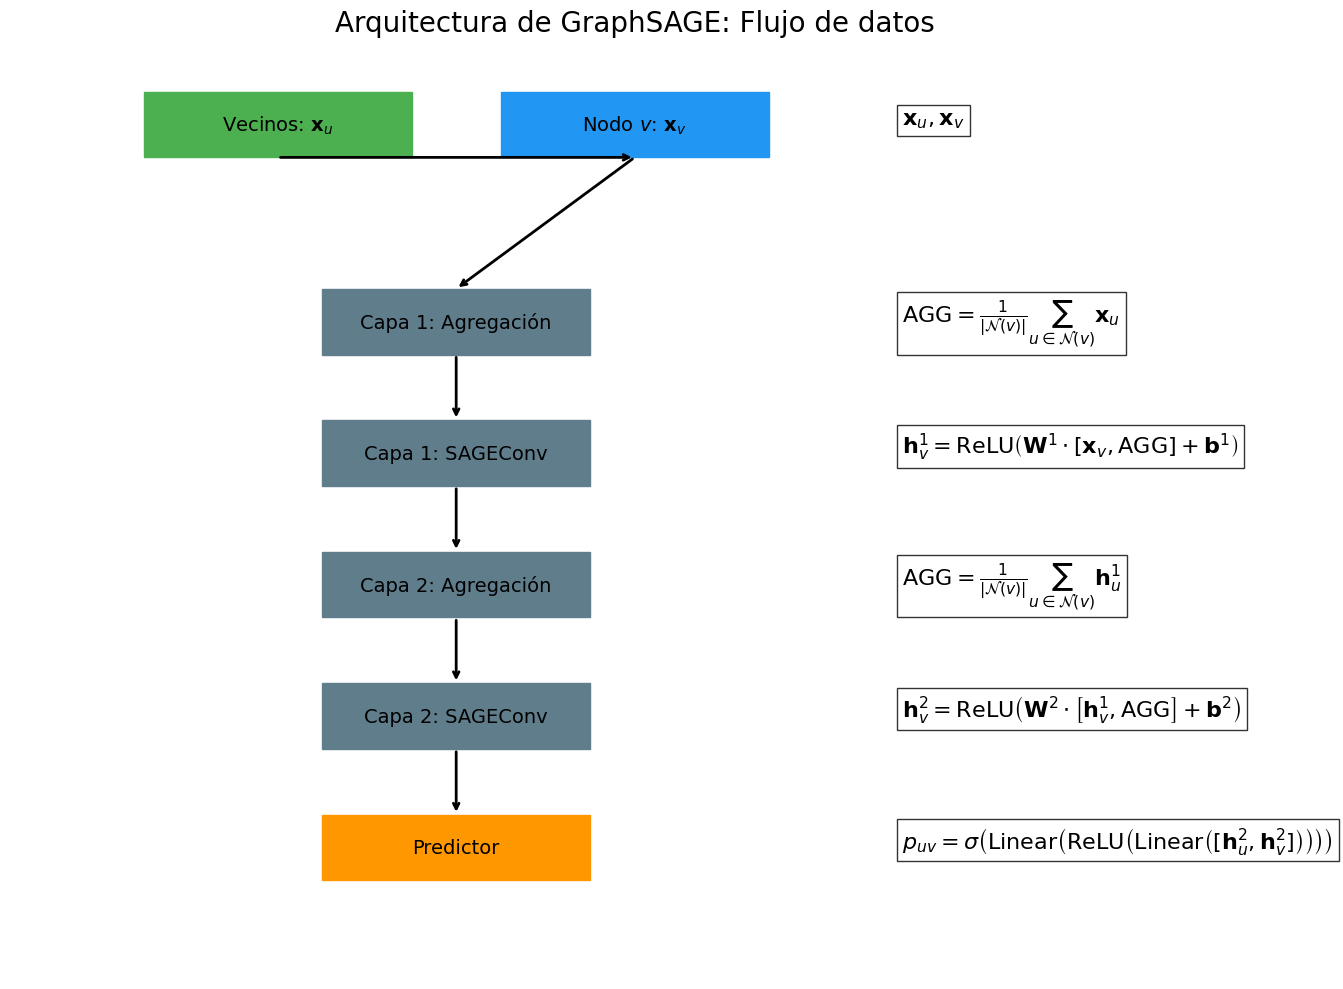

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

# Configurar el lienzo con orientación vertical
fig, ax = plt.subplots(figsize=(14, 10))

# Definir nodos y capas con "Vecinos" y "Nodo v" en una fila horizontal
nodes = [
    ("Vecinos: $\\mathbf{x}_u$", 3, 9, '#4CAF50'),  # Verde oscuro
    ("Nodo $v$: $\\mathbf{x}_v$", 7, 9, '#2196F3'),  # Azul oscuro
    ("Capa 1: Agregación", 5, 6, '#607D8B'),  # Gris azulado
    ("Capa 1: SAGEConv", 5, 4, '#607D8B'),  # Gris azulado
    ("Capa 2: Agregación", 5, 2, '#607D8B'),  # Gris azulado
    ("Capa 2: SAGEConv", 5, 0, '#607D8B'),  # Gris azulado
    ("Predictor", 5, -2, '#FF9800')  # Naranja oscuro
]

# Dibujar nodos/capas con tamaño ajustado y texto más grande
for label, x, y, color in nodes:
    ax.add_patch(patches.Rectangle((x-1.5, y-0.5), 3, 1, fill=True, color=color, edgecolor='black'))
    ax.text(x, y, label, ha='center', va='center', fontsize=14)

# Dibujar flechas rectas y resaltadas, apuntando a la parte superior de las cajas
arrows = [
    ((3, 8.5), (7, 8.5)),
    ((7, 8.5), (5, 6.5)),
    ((5, 5.5), (5, 4.5)),
    ((5, 3.5), (5, 2.5)),
    ((5, 1.5), (5, 0.5)),
    ((5, -0.5), (5, -1.5))
]

for start, end in arrows:
    ax.add_patch(patches.FancyArrowPatch(start, end, arrowstyle='->', mutation_scale=10, color='black', linewidth=2))

# Anotaciones de fórmulas corregidas
ax.text(10.0, 9, r'$\mathbf{x}_u, \mathbf{x}_v$', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.8))
ax.text(10.0, 6, r'$\text{AGG} = \frac{1}{|\mathcal{N}(v)|} \sum_{u \in \mathcal{N}(v)} \mathbf{x}_u$', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.8))
ax.text(10.0, 4, r'$\mathbf{h}_v^1 = \text{ReLU} \left( \mathbf{W}^1 \cdot \left[ \mathbf{x}_v, \text{AGG} \right] + \mathbf{b}^1 \right)$', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.8))
ax.text(10.0, 2, r'$\text{AGG} = \frac{1}{|\mathcal{N}(v)|} \sum_{u \in \mathcal{N}(v)} \mathbf{h}_u^1$', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.8))
ax.text(10.0, 0, r'$\mathbf{h}_v^2 = \text{ReLU} \left( \mathbf{W}^2 \cdot \left[ \mathbf{h}_v^1, \text{AGG} \right] + \mathbf{b}^2 \right)$', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.8))
ax.text(10.0, -2, r'$p_{uv} = \sigma \left( \text{Linear} \left( \text{ReLU} \left( \text{Linear} \left( [ \mathbf{h}_u^2, \mathbf{h}_v^2 ] \right) \right) \right) \right)$', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.8))

# Configuraciones finales
ax.set_xlim(0, 14)
ax.set_ylim(-4, 10)
ax.axis('off')
plt.title("Arquitectura de GraphSAGE: Flujo de datos", fontsize=20, pad=20)
plt.tight_layout()

# Guardar la figura en el directorio local
file_path = "graphsage_diagram.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
print(f"Figura guardada en: {file_path}")

plt.show()

<h1 style="color: #FF0000">Grafo Explicativo</h1>

Este grafo ilustra un **vecindario de dos capas** (k=2), mostrando cómo las **características** de los nodos se propagan desde los vecinos más lejanos hasta el nodo objetivo para calcular su embedding, que luego se usa para tareas como la **predicción de enlaces**.

<h2 style="color: #009eff">Estructura del Grafo</h2>

El grafo es un **grafo dirigido** que modela el muestreo de vecinos en dos capas alrededor de un **nodo objetivo** $(v)$:

- **Nodo objetivo \( v \)**: El nodo central, cuyo embedding queremos calcular. Representa, por ejemplo, un emprendimiento con características iniciales $X_v$ , que combinan atributos numéricos (como likes, seguidores, interacciones) y representaciones textuales (como descripciones o publicaciones procesadas).
- **Vecinos de capa 1 ( $u1, u2, u3$ )**: Los nodos directamente conectados a $(v)$ por aristas, que representan relaciones como interacciones (likes, comentarios) o similitudes (temáticas, ubicación). Cada vecino $(u_i)$ tiene características ${X}_{U_i}$, similares en estructura a $X_v$
- **Vecinos de capa 2 ( $w_1, w_2, w_3, w_4, w_5$ )**: Los nodos conectados a los vecinos de capa 1 (por ejemplo, ( $w_1, w_2$) son vecinos de ($u_1$). Estos nodos aportan información contextual de segundo orden, con características ${X}_{W_i}$.

Las **aristas dirigidas** indican el flujo de información: las características de los nodos de capa 2 $w_i$ se propagan a los nodos de capa 1 $u_i$, y estas, a su vez, al nodo objetivo $(v)$. Este diseño refleja el **muestreo jerárquico** de GraphSAGE, que limita el número de vecinos por capa para escalar a grafos grandes.

<h2 style="color: #009eff">Flujo de la Información y Operaciones</h2>

GraphSAGE genera el **embedding** del nodo objetivo $(v)$ mediante un proceso iterativo que combina **agregación** de características de vecinos y **transformaciones no lineales**. Las fórmulas en la figura describen cada etapa, siguiendo el flujo desde los vecinos de capa 2 hasta la predicción final. A continuación, se explica cada paso:

1. **Características Iniciales**:  
   - **Nodo objetivo**: $(x_v)$  
     Representa el vector de características iniciales del nodo $(v)$, que incluye atributos numéricos (por ejemplo, métricas de interacción) y embeddings textuales (por ejemplo, representaciones de descripciones).  
   - **Vecinos de capa 1**: ($u1, u2, u3$)  
     Son las características de los vecinos directos de $(v)$, que capturan información local sobre relaciones directas (por ejemplo, emprendimientos que interactúan directamente).  
   - **Vecinos de capa 2**: ($w_1, w_2, w_3, w_4, w_5$)  
     Representan las características de los vecinos de segundo orden, que aportan contexto más amplio (por ejemplo, emprendimientos relacionados con los vecinos de $(v)$.

2. **Agregación en la Capa 2**:

    <div style="text-align: center;">
                    <span style="font-size: 16px">$$\text{AGG} = \frac{1}{|\mathcal{N}(u)|} \huge\sum_{w \in \mathcal{N}(u)} x_w$$</span>
    </div>
   
   Para cada nodo de capa 1 $(u_i)$, como $(u_1, u_2, u_3)$, se calcula el **promedio** de las características de sus vecinos de capa 2 $(w_i)$. Por ejemplo, para $(u_1)$, se promedian $({x}_{w_1})$ y $({x}_{w_2})$. Esta operación agrega información contextual de segundo orden, capturando patrones más allá de las conexiones directas. El promedio asegura que la agregación sea invariante al tamaño del vecindario, manteniendo la escalabilidad.

3. **Agregación en la Capa 1**:

    <div style="text-align: center;">
                    <span style="font-size: 16px">$$\text{AGG} = \frac{1}{|\mathcal{N}(v)|} \huge\sum_{u \in \mathcal{N}(v)} x_u$$</span>
    </div>

     
   Las características de los vecinos de capa 1 $({x}_{u_1}), {x}_{u_2}, {x}_{u_3})$ se promedian para formar una representación agregada del vecindario directo de $(v)$. Esta agregación captura la información local de los emprendimientos directamente relacionados con $(v)$, como aquellos que comparten interacciones o similitudes temáticas.

4. **SAGEConv en la Capa 1**:

    <div style="text-align: center;">
                    <span style="font-size: 16px">$$\mathbf{h}_v^1 = \text{ReLU} \left( \mathbf{W}^1 \cdot \left[ \mathbf{x}_v, \text{AGG} \right] + \mathbf{b}^1 \right)$$</span>
    </div>
       
   La característica del nodo objetivo $(\mathbf{x}_v)$ se **concatena** con la agregación de capa 1 $AGG$. Esta representación combinada se transforma mediante una **matriz de pesos** $(\mathbf{W}^1)$, se suma un **término de bias** $(\mathbf{b}^1)$, y se aplica la función de activación **ReLU** para introducir no linealidad. El resultado es el **embedding de capa 1** $(\mathbf{h}_v^1)$, que integra las características propias de $(v)$ con la información de sus vecinos directos.

6. **SAGEConv en la Capa 2**:

    <div style="text-align: center;">
                    <span style="font-size: 16px">$$\mathbf{h}_v^2 = \text{ReLU} \left( \mathbf{W}^2 \cdot \left[ \mathbf{h}_v^1, \text{AGG} \right] + \mathbf{b}^2 \right))$$</span>
    </div>
 
    
   El embedding de capa 1 $(\mathbf{h}_v^1)$ se concatena con la agregación de capa 2 $AGG$, promedio de los $(\mathbf{x}_{w_i})$. Esta combinación se transforma con una nueva matriz de pesos $(\mathbf{W}^2)$, se suma un bias $(\mathbf{b}^2)$, y se aplica ReLU para generar el **embedding final** $(\mathbf{h}_v^2)$. Este embedding captura tanto las características locales (capa 1) como el contexto más amplio (capa 2), haciendo que la representación sea más robusta.

7. **Predicción de Enlace** (no incluida en el grafo, pero parte integral del modelo):

    <div style="text-align: center;">
                    <span style="font-size: 16px">$$p_{uv} = \sigma \left( \text{Linear} \left( \text{ReLU} \left( \text{Linear} \left( [ \mathbf{h}_u^2, \mathbf{h}_v^2 ] \right) \right) \right) \right)$$</span>
    </div>

  
   Para predecir la probabilidad de una arista entre $(v)$ y otro nodo $(u)$, se concatenan sus embeddings finales $(\mathbf{h}_v^2)$ y $(\mathbf{h}_u^2)$. Esta representación pasa por dos capas lineales, con una activación ReLU intermedia y una función **sigmoide** al final, produciendo la probabilidad $(p_{uv})$. En el contexto de emprendimientos, esto representa la probabilidad de una conexión relevante (por ejemplo, una colaboración potencial).

Figura guardada en: Grafo_Ejemplo.png


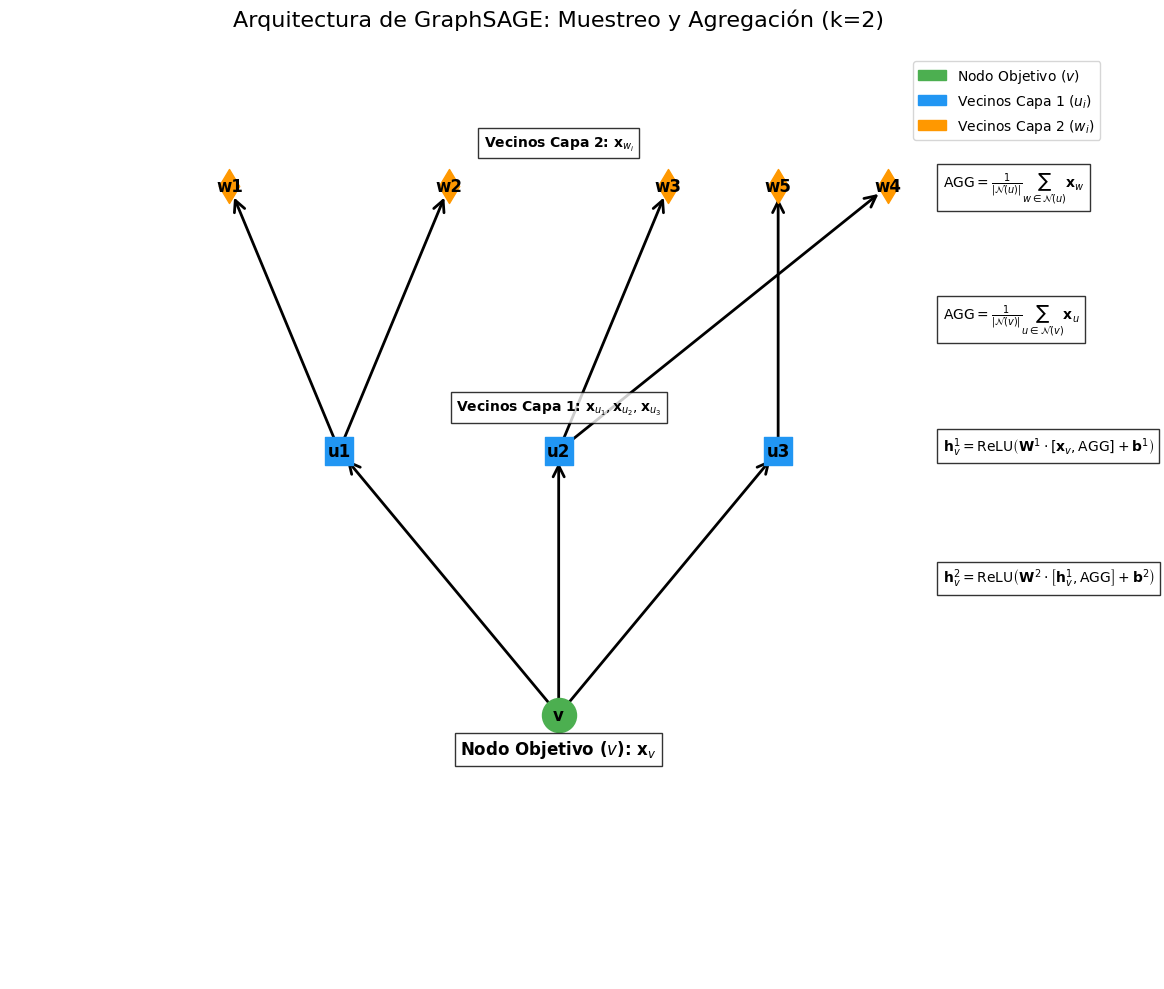

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Configurar el lienzo
fig, ax = plt.subplots(figsize=(12, 10))

# Crear grafo de muestreo (k=2)
G = nx.DiGraph()
G.add_edges_from([
    ("v", "u1"), ("v", "u2"), ("v", "u3"),  # Capa 1: vecinos de v
    ("u1", "w1"), ("u1", "w2"),             # Capa 2: vecinos de u1
    ("u2", "w3"), ("u2", "w4"),             # Capa 2: vecinos de u2
    ("u3", "w5")                            # Capa 2: vecinos de u3
])

# Posiciones jerárquicas ajustadas
pos = {
    "v": (0, 0),
    "u1": (-2, 2), "u2": (0, 2), "u3": (2, 2),
    "w1": (-3, 4), "w2": (-1, 4), "w3": (1, 4), 
    "w4": (3, 4), "w5": (2, 4)
}

# Dibujar nodos con colores y tamaños diferenciados
nx.draw_networkx_nodes(G, pos, nodelist=["v"], node_color="#4CAF50", node_size=600, node_shape="o")
nx.draw_networkx_nodes(G, pos, nodelist=["u1", "u2", "u3"], node_color="#2196F3", node_size=400, node_shape="s")
nx.draw_networkx_nodes(G, pos, nodelist=["w1", "w2", "w3", "w4", "w5"], node_color="#FF9800", node_size=300, node_shape="d")

# Dibujar aristas con flechas estilizadas
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="black", width=2)

# Etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

# Anotaciones de fórmulas reubicadas a la derecha
# Etiquetas de nodos cerca de los nodos
plt.text(0, -0.3, r"Nodo Objetivo ($v$): $\mathbf{x}_v$", ha="center", fontsize=12, fontweight="bold", bbox=dict(facecolor="white", alpha=0.8))
plt.text(0, 2.3, r"Vecinos Capa 1: $\mathbf{x}_{u_1}, \mathbf{x}_{u_2}, \mathbf{x}_{u_3}$", ha="center", fontsize=10, fontweight="bold", bbox=dict(facecolor="white", alpha=0.8))
plt.text(0, 4.3, r"Vecinos Capa 2: $\mathbf{x}_{w_i}$", ha="center", fontsize=10, fontweight="bold", bbox=dict(facecolor="white", alpha=0.8))

# Fórmulas de cálculo a la derecha, alineadas verticalmente
plt.text(3.5, 4, r"$\text{AGG} = \frac{1}{|\mathcal{N}(u)|} \sum_{w \in \mathcal{N}(u)} \mathbf{x}_w$", ha="left", fontsize=10, bbox=dict(facecolor="white", alpha=0.8))  # Agregación capa 2
plt.text(3.5, 3, r"$\text{AGG} = \frac{1}{|\mathcal{N}(v)|} \sum_{u \in \mathcal{N}(v)} \mathbf{x}_u$", ha="left", fontsize=10, bbox=dict(facecolor="white", alpha=0.8))  # Agregación capa 1
plt.text(3.5, 2, r"$\mathbf{h}_v^1 = \text{ReLU} \left( \mathbf{W}^1 \cdot \left[ \mathbf{x}_v, \text{AGG} \right] + \mathbf{b}^1 \right)$", ha="left", fontsize=10, bbox=dict(facecolor="white", alpha=0.8))  # SAGEConv capa 1
plt.text(3.5, 1, r"$\mathbf{h}_v^2 = \text{ReLU} \left( \mathbf{W}^2 \cdot \left[ \mathbf{h}_v^1, \text{AGG} \right] + \mathbf{b}^2 \right)$", ha="left", fontsize=10, bbox=dict(facecolor="white", alpha=0.8))  # SAGEConv capa 2
# plt.text(3.5, 0, r"$p_{uv} = \sigma \left( \text{Linear} \left( \text{ReLU} \left( \text{Linear} \left( [ \mathbf{h}_u^2, \mathbf{h}_v^2 ] \right) \right) \right) \right)$", ha="left", fontsize=10, bbox=dict(facecolor="white", alpha=0.8))  # Predicción

# Leyenda
legend_elements = [
    patches.Patch(color="#4CAF50", label="Nodo Objetivo ($v$)"),
    patches.Patch(color="#2196F3", label="Vecinos Capa 1 ($u_i$)"),
    patches.Patch(color="#FF9800", label="Vecinos Capa 2 ($w_i$)")
]
plt.legend(handles=legend_elements, loc="upper right", fontsize=10)

# Configuraciones finales
ax.set_xlim(-5, 5)
ax.set_ylim(-2, 5)
ax.axis("off")
plt.title("Arquitectura de GraphSAGE: Muestreo y Agregación (k=2)", fontsize=16, pad=20)
plt.tight_layout()

# Guardar la figura en el directorio local
file_path = "Grafo_Ejemplo.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')
print(f"Figura guardada en: {file_path}")

plt.show()

# Construcción Grafo

## Descripción General

Este código inicializa y construye un grafo no dirigido utilizando la biblioteca **NetworkX**, donde los nodos representan emprendimientos y sus atributos contienen información relevante extraída de una base de datos relacional.

---

### Estructura del Código

**`nx.Graph()`**  
Crea un objeto de grafo no dirigido (las aristas no tienen dirección) utilizando la biblioteca NetworkX.  
Este tipo de grafo es apropiado porque las relaciones entre emprendimientos (que se añadirán posteriormente) son **simétricas**.

---

**`for _, row in emprendimientos.iterrows():`**  
Itera sobre cada fila del DataFrame `emprendimientos` que contiene la información de cada emprendimiento.

- `_`: Ignora el índice de la fila.
- `row`: Contiene los datos del emprendimiento actual.

---

**`temas = emprendimiento_tematica[emprendimiento_tematica['id_emprendimiento'] == row['id_emprendimiento']]['id_tematica'].tolist()`**  
Consulta la tabla de relación muchos-a-muchos `emprendimiento_tematica` para obtener las temáticas asociadas al emprendimiento actual.

- Filtra las filas donde `id_emprendimiento` coincide con el actual.
- Extrae los valores de `id_tematica`.
- Convierte el resultado a una lista de temáticas (categorías) asociadas.

---

**Atributos del nodo**

```python
node_attrs = {
    'nombre_emprendimiento': row['nombre_emprendimiento'],
    'descripcion': row['descripcion'] if pd.notna(row['descripcion']) else '',
    'redes_sociales': row['redes_sociales'] if pd.notna(row['redes_sociales']) else '',
    'sitio_web': row['sitio_web'],
    'id_municipio_origen': row['id_municipio_origen'],
    'id_alcance': row['id_alcance'],
    'tematicas': temas
}
```

Crea un diccionario con los atributos del nodo:

- **`nombre_emprendimiento`**: Nombre del emprendimiento (cadena).
- **`descripcion`**: Descripción del emprendimiento (cadena), con manejo de valores nulos.
- **`redes_sociales`**: Redes sociales (cadena), con manejo de nulos.
- **`sitio_web`**: URL del sitio web (cadena).
- **`id_municipio_origen`**: ID del municipio de origen (entero).
- **`id_alcance`**: ID del alcance (entero).
- **`tematicas`**: Lista de IDs de temáticas asociadas (lista de enteros).

-------

**`G.add_node(row['id_emprendimiento'], **node_attrs)`** 

Añade un nodo al grafo G con:

    Identificador: row['id_emprendimiento'] (clave primaria de la tabla Emprendimiento).

    Atributos: Todos los definidos en node_attrs mediante ** que desempaqueta el diccionario.

In [41]:
# Inicializar el grafo
G = nx.Graph()

# Agregar nodos (emprendimientos)
for _, row in emprendimientos.iterrows():
    # Obtener temáticas asociadas
    temas = emprendimiento_tematica[emprendimiento_tematica['id_emprendimiento'] == row['id_emprendimiento']]['id_tematica'].tolist()
    # Atributos del nodo
    node_attrs = {
        'nombre_emprendimiento': row['nombre_emprendimiento'],
        'descripcion': row['descripcion'] if pd.notna(row['descripcion']) else '',
        'redes_sociales': row['redes_sociales'] if pd.notna(row['redes_sociales']) else '',
        'sitio_web': row['sitio_web'],
        'id_municipio_origen': row['id_municipio_origen'],
        'id_alcance': row['id_alcance'],
        'tematicas': temas
    }
    G.add_node(row['id_emprendimiento'], **node_attrs)

print(f"Nodos creados: {G.number_of_nodes()}") # Imprime el número de nodos

Nodos creados: 80


-----
# Creación de Aristas para el Grafo 

Este código establece las conexiones (aristas) entre los emprendimientos (nodos) del grafo, considerando tres tipos de relaciones:
1. **Interacciones** basadas en publicaciones y temáticas comunes
2. **Similitudes** por características compartidas (temáticas, municipio, alcance)
3. **Influencia** medida por cantidad de seguidores

-----

## Parte 1: Aristas por Interacciones (Publicaciones)

Se tiene lo siguiente:

*`publicaciones`*: un DataFrame con publicaciones, donde cada publicación está asociada a un id_emprendimiento.

*`emprendimiento_tematica`*: un DataFrame que relaciona emprendimientos con temáticas. Es una tabla de relación muchos-a-muchos entre emprendimientos y temáticas.

La idea es si dos emprendimientos comparten una misma temática, se consideran relacionados, aunque no haya información directa de interacción.



```python
for _, pub in publicaciones.iterrows():
    id_emprendimiento = pub['id_emprendimiento']
    # Conectar emprendimientos que comparten temáticas en publicaciones
    related_emprendimientos = emprendimiento_tematica[
        emprendimiento_tematica['id_tematica'].isin(
            emprendimiento_tematica[emprendimiento_tematica['id_emprendimiento'] == id_emprendimiento]['id_tematica']
        )
    ]['id_emprendimiento'].unique()
```

### Explicación:
1. **Flujo**: Itera sobre cada publicación en el DataFrame `publicaciones`.
2. **Lógica de conexión**:
   - Encuentra todos los emprendimientos (`related_emprendimientos`) que comparten al menos una temática con el emprendimiento que hizo la publicación.
   - Usa la tabla `emprendimiento_tematica` para esta relación muchos-a-muchos.
   - `unique()` asegura no tener duplicados.

```python
    for rel_emp in related_emprendimientos:
        if rel_emp != id_emprendimiento and rel_emp in G.nodes:
            weight = pub['n_likes'] if pd.notna(pub['n_likes']) else 0
            G.add_edge(id_emprendimiento, rel_emp, weight=weight + 1)
```

### Explicación:
1. **Creación de aristas**:
   - Para cada emprendimiento relacionado, crea una arista si:
     - No es el mismo emprendimiento (`rel_emp != id_emprendimiento`)
     - Existe en el grafo (`rel_emp in G.nodes`)
   - **Peso**: Basado en los "likes" de la publicación (`n_likes`), con:
     - Manejo de valores nulos (default 0)
     - +1 para evitar pesos cero (suavizado)

> **Propósito**: Modela que los emprendimientos que interactúan con temáticas similares están relacionados, donde la popularidad de la publicación (likes) afecta la fuerza de la conexión.
>
> Si dos emprendimientos comparten temáticas y uno publica algo que recibe muchos likes → hay una señal de relevancia o afinidad temática.
> El grafo resultante podría reflejar cuán influyente o visible es un emprendimiento en su grupo temático.

-----

## Parte 2: Aristas por Similitudes

```python
for emp1 in G.nodes:
    for emp2 in G.nodes:
        if emp1 < emp2:  # Evitar duplicados
```

### Explicación:
- Compara todos los pares de nodos únicos (`emp1 < emp2` evita comparar A-B y B-A).

```python
            emp1_attrs = G.nodes[emp1]
            emp2_attrs = G.nodes[emp2]
            # Similitud por temática
            temas_comunes = len(set(emp1_attrs['tematicas']) & set(emp2_attrs['tematicas']))
            # Similitud por municipio y alcance
            same_municipio = 1 if emp1_attrs['id_municipio_origen'] == emp2_attrs['id_municipio_origen'] else 0
            same_alcance = 1 if emp1_attrs['id_alcance'] == emp2_attrs['id_alcance'] else 0
```

### Explicación:
1. **Métricas de similitud**:
   - **Temáticas comunes**: Cuenta intersección de listas de temáticas.
   - **Municipio**: 1 si son del mismo municipio, 0 si no.
   - **Alcance**: 1 si tienen mismo alcance (local/regional).

```python
            # Ponderar arista
            weight = temas_comunes + same_municipio + same_alcance
            if weight > 0:
                G.add_edge(emp1, emp2, weight=weight)
```

### Explicación:
- **Peso total**: Suma de las tres métricas (puede ser 0-3).
- Solo crea arista si hay al menos una similitud (`weight > 0`).

> **Propósito**: Conecta emprendimientos con características intrínsecas similares, donde más coincidencias generan conexiones más fuertes.


-----

## Parte 3: Ajuste por Seguidores

```python
for _, row in seguidores.iterrows():
    id_emprendimiento = row['id_emprendimiento']
    if id_emprendimiento in G.nodes:
        G.nodes[id_emprendimiento]['seguidores'] = row['cantidad']
```

### Explicación:
- Añade atributo `seguidores` a cada nodo con el valor de la tabla `seguidores`.

```python
        # Aumentar peso de aristas existentes según seguidores
        for emp2 in G.neighbors(id_emprendimiento):
            G[id_emprendimiento][emp2]['weight'] += row['cantidad'] / 1000  # Normalizar
```

### Explicación:
- **Refuerzo de aristas**: Para cada conexión existente del emprendimiento:
  - Aumenta el peso proporcional a sus seguidores.
  - Divide entre 1000 para normalizar (evitar dominancia numérica).

> **Propósito**: Modela que emprendimientos con más seguidores influyen más en sus conexiones.


-----

## Resumen
```python
print(f"Aristas creadas: {G.number_of_edges()}")
```
- Reporta el total de aristas creadas combinando los tres métodos.

## Estrategia General
1. **Interacciones** → Datos observables (publicaciones)
2. **Similitudes** → Características intrínsecas
3. **Seguidores** → Popularidad/influencia

Esta combinación permite que GraphSage aprenda tanto de:
- Comportamiento real (interacciones)
- Atributos estructurales (similitudes)
- Señales de influencia social (seguidores)

> **Nota**: Los pesos son acumulativos (se suman cuando múltiples criterios aplican), lo que permite conexiones más ricas.

-----

In [42]:
# Parte 1: Crear aristas basadas en interacciones

for _, pub in publicaciones.iterrows():
    id_emprendimiento = pub['id_emprendimiento']
    # Conectar emprendimientos que comparten temáticas en publicaciones (simplificación, ya que no tenemos datos de quién comentó)
    related_emprendimientos = emprendimiento_tematica[
        emprendimiento_tematica['id_tematica'].isin(
            emprendimiento_tematica[emprendimiento_tematica['id_emprendimiento'] == id_emprendimiento]['id_tematica']
        )
    ]['id_emprendimiento'].unique()
    # Excluir el emprendimiento actual de la lista de relacionados
    related_emprendimientos = related_emprendimientos[related_emprendimientos != id_emprendimiento]

    """
    for rel_emp in related_emprendimientos:
        if rel_emp != id_emprendimiento and rel_emp in G.nodes:
            weight = pub['n_likes'] if pd.notna(pub['n_likes']) else 0
            G.add_edge(id_emprendimiento, rel_emp, weight=weight + 1)
    """

In [43]:
# Parte 2: Crear aristas basadas en similitudes

for emp1 in G.nodes:
    for emp2 in G.nodes:
        if emp1 < emp2:  # Evitar duplicados
            emp1_attrs = G.nodes[emp1]
            emp2_attrs = G.nodes[emp2]
            # Similitud por temática
            temas_comunes = len(set(emp1_attrs['tematicas']) & set(emp2_attrs['tematicas']))
            # Similitud por municipio y alcance
            same_municipio = 1 if emp1_attrs['id_municipio_origen'] == emp2_attrs['id_municipio_origen'] else 0
            same_alcance = 1 if emp1_attrs['id_alcance'] == emp2_attrs['id_alcance'] else 0
            # Ponderar arista
            weight = temas_comunes + same_municipio + same_alcance
            if weight > 0:
                G.add_edge(emp1, emp2, weight=weight)

In [43]:
# Parte 3: Agregar peso basado en seguidores
"""
for _, row in seguidores.iterrows():
    id_emprendimiento = row['id_emprendimiento']
    if id_emprendimiento in G.nodes:
        G.nodes[id_emprendimiento]['seguidores'] = row['cantidad']
        # Aumentar peso de aristas existentes según seguidores
        for emp2 in G.neighbors(id_emprendimiento):
            G[id_emprendimiento][emp2]['weight'] += row['cantidad'] / 1000  # Normalizar

print(f"Aristas creadas: {G.number_of_edges()}")

"""

'\nfor _, row in seguidores.iterrows():\n    id_emprendimiento = row[\'id_emprendimiento\']\n    if id_emprendimiento in G.nodes:\n        G.nodes[id_emprendimiento][\'seguidores\'] = row[\'cantidad\']\n        # Aumentar peso de aristas existentes según seguidores\n        for emp2 in G.neighbors(id_emprendimiento):\n            G[id_emprendimiento][emp2][\'weight\'] += row[\'cantidad\'] / 1000  # Normalizar\n\nprint(f"Aristas creadas: {G.number_of_edges()}")\n\n'


---

## Normalización de Atributos Numéricos y Codificación One-Hot

Crear un **vector de características numéricas y categóricas normalizadas y codificadas** para cada emprendimiento, y asignarlas a los nodos del grafo `G`.

La siguiente celda construye y agrega vectores de características (`features`) para cada nodo del grafo `G`, utilizando datos numéricos, categóricos y multiclase (temáticas). Este proceso es esencial para usar modelos de aprendizaje como **GraphSAGE**.

---

##  Paso a paso 

---

### 1. **Normalización de atributos numéricos**

```python
scaler = MinMaxScaler()
```

* Se crea un **escalador de Min-Max** (de `sklearn.preprocessing`) para que los valores numéricos estén entre 0 y 1.
* Esto es importante porque redes neuronales funcionan mejor con datos normalizados.

---

### 2. **Cálculo de likes por emprendimiento**

```python
likes_por_emprendimiento = publicaciones.groupby('id_emprendimiento')['n_likes'].sum().reset_index()
likes_por_emprendimiento.columns = ['id_emprendimiento', 'total_likes']
```

* Agrupa las publicaciones por `id_emprendimiento` y **suma la cantidad de likes**.
* Resultado: un DataFrame con la cantidad total de likes por cada emprendimiento.

#### Resultado:

| id\_emprendimiento | total\_likes |
| ------------------ | ------------ |
| A                  | 45           |
| B                  | 78           |

---

### 3. **Combinar likes y seguidores con emprendimientos**

```python
emprendimientos_features = emprendimientos.merge(likes_por_emprendimiento, on='id_emprendimiento', how='left').fillna({'total_likes': 0})
emprendimientos_features = emprendimientos_features.merge(seguidores[['id_emprendimiento', 'cantidad']], on='id_emprendimiento', how='left').fillna({'cantidad': 0})
```

* Se integran las columnas `total_likes` y `cantidad` (número de seguidores) al DataFrame principal de emprendimientos.
* Se llenan los valores nulos con 0 (por ejemplo, si un emprendimiento no tiene publicaciones ni seguidores).

---

### 4. **Normalización de variables numéricas**

```python
numeric_features = scaler.fit_transform(emprendimientos_features[['total_likes', 'cantidad']])
emprendimientos_features[['total_likes_norm', 'cantidad_norm']] = numeric_features
```

* Normaliza las columnas `total_likes` y `cantidad` entre 0 y 1.
* Se agregan dos nuevas columnas: `total_likes_norm` y `cantidad_norm`.

---

### 5. **Codificación one-hot del municipio de origen**

```python
onehot_encoder_municipio = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
municipio_encoded = onehot_encoder_municipio.fit_transform(emprendimientos[['id_municipio_origen']])
municipio_encoded_df = pd.DataFrame(municipio_encoded, columns=onehot_encoder_municipio.get_feature_names_out(['id_municipio_origen']))
```

* Convierte la variable `id_municipio_origen` en una representación **one-hot** (binaria).
* Cada municipio genera una columna.

#### Ejemplo:

| id\_municipio\_origen | id\_municipio\_origen\_1 | id\_municipio\_origen\_2 | id\_municipio\_origen\_3 |
| --------------------- | ------------------------ | ------------------------ | ------------------------ |
| 1                     | 0                        | 1.0                      | 0                        |
| 2                     | 1.0                      | 0                        | 0                        |
| 3                     | 0                        | 0                        | 1.0                      |

---

### 6. **Codificación one-hot del alcance**

```python
onehot_encoder_alcance = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
alcance_encoded = onehot_encoder_alcance.fit_transform(emprendimientos[['id_alcance']])
alcance_encoded_df = pd.DataFrame(alcance_encoded, columns=onehot_encoder_alcance.get_feature_names_out(['id_alcance']))
```

* Igual que lo anterior, pero para el campo `id_alcance`.

---

### 7. **Codificación binaria de temáticas por emprendimiento**

```python
tematica_encoded = np.zeros((len(emprendimientos), len(tematicas)))
for _, row in emprendimiento_tematica.iterrows():
    idx_emp = emprendimientos.index[emprendimientos['id_emprendimiento'] == row['id_emprendimiento']].tolist()[0]
    idx_tem = tematicas.index[tematicas['id_tematica'] == row['id_tematica']].tolist()[0]
    tematica_encoded[idx_emp, idx_tem] = 1
```

* Crea una **matriz binaria** donde:

  * Las filas representan emprendimientos
  * Las columnas representan temáticas
  * Un 1 indica que el emprendimiento está asociado a esa temática

#### Ejemplo:

| tematica\_1 | tematica\_2 | tematica\_3 |
| ----------- | ----------- | ----------- |
| 1           | 0           | 1           |

---

### 8. **Construcción del DataFrame final con características**

```python
features_df = pd.concat([
    emprendimientos_features[['id_emprendimiento', 'total_likes_norm', 'cantidad_norm']],
    municipio_encoded_df,
    alcance_encoded_df,
    tematica_encoded_df
], axis=1)
```

* Une:

  * Atributos numéricos normalizados (`total_likes_norm`, `cantidad_norm`)
  * One-hot de municipio
  * One-hot de alcance
  * Binarios de temáticas

---

### 9. **Asignación de características al grafo `G`**

```python
for _, row in features_df.iterrows():
    if row['id_emprendimiento'] in G.nodes:
        G.nodes[row['id_emprendimiento']]['features'] = row.drop('id_emprendimiento').values
```

* Recorre el `features_df` y asigna el vector de características al nodo correspondiente del grafo `G`.

---

### 10. **Impresión del tamaño de las características**

```python
print("Dimensiones de las características:\n", features_df.shape)
```

* Muestra cuántos emprendimientos (`n`) y cuántas características (`m`) se generaron.
* Esto será útil para verificar la **dimensión del input** que irá a la red neuronal.

---

## Resultado final

Cada nodo del grafo `G` tiene ahora un atributo:

```python
G.nodes['A']['features'] = np.array([...])
```

Este vector contiene información sobre:

* Popularidad (likes, seguidores)
* Ubicación (municipio)
* Alcance
* Temáticas

---

## ✅ Ventajas

* **Listo para modelos GNN**: cada nodo tiene un vector fijo.
* **Escalado y codificado**: facilita el aprendizaje automático.
* **Flexible**: puedes agregar más atributos numéricos o categóricos.



In [44]:
# Normalizar atributos numéricos
scaler = MinMaxScaler()

# Calcular total de likes por emprendimiento
likes_por_emprendimiento = publicaciones.groupby('id_emprendimiento')['n_likes'].sum().reset_index()
likes_por_emprendimiento.columns = ['id_emprendimiento', 'total_likes']

# Combinar likes y seguidores
emprendimientos_features = emprendimientos.merge(likes_por_emprendimiento, on='id_emprendimiento', how='left').fillna({'total_likes': 0})
emprendimientos_features = emprendimientos_features.merge(seguidores[['id_emprendimiento', 'cantidad']], on='id_emprendimiento', how='left').fillna({'cantidad': 0})

# Normalizar total_likes y cantidad
numeric_features = scaler.fit_transform(emprendimientos_features[['total_likes', 'cantidad']])
emprendimientos_features[['total_likes_norm', 'cantidad_norm']] = numeric_features

# Codificar atributos categóricos
onehot_encoder_municipio = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
municipio_encoded = onehot_encoder_municipio.fit_transform(emprendimientos[['id_municipio_origen']])
municipio_encoded_df = pd.DataFrame(municipio_encoded, columns=onehot_encoder_municipio.get_feature_names_out(['id_municipio_origen']))

onehot_encoder_alcance = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
alcance_encoded = onehot_encoder_alcance.fit_transform(emprendimientos[['id_alcance']])
alcance_encoded_df = pd.DataFrame(alcance_encoded, columns=onehot_encoder_alcance.get_feature_names_out(['id_alcance']))

# Codificar temáticas (matriz binaria)
tematica_encoded = np.zeros((len(emprendimientos), len(tematicas)))
for _, row in emprendimiento_tematica.iterrows():
    idx_emp = emprendimientos.index[emprendimientos['id_emprendimiento'] == row['id_emprendimiento']].tolist()[0]
    idx_tem = tematicas.index[tematicas['id_tematica'] == row['id_tematica']].tolist()[0]
    tematica_encoded[idx_emp, idx_tem] = 1
tematica_encoded_df = pd.DataFrame(tematica_encoded, columns=[f'tematica_{i}' for i in tematicas['id_tematica']])

# Combinar características numéricas y categóricas
features_df = pd.concat([emprendimientos_features[['id_emprendimiento', 'total_likes_norm', 'cantidad_norm']],
                         municipio_encoded_df, alcance_encoded_df, tematica_encoded_df], axis=1)

# Agregar características al grafo
for _, row in features_df.iterrows():
    if row['id_emprendimiento'] in G.nodes:
        G.nodes[row['id_emprendimiento']]['features'] = row.drop('id_emprendimiento').values

print("Dimensiones de las características:\n", features_df.shape)

Dimensiones de las características:
 (80, 41)


In [45]:
municipio_encoded_df.head()  # Marca 1.0 al municipio de origen

,id_municipio_origen_1,id_municipio_origen_2,id_municipio_origen_3,id_municipio_origen_4,id_municipio_origen_5,id_municipio_origen_6,id_municipio_origen_7,id_municipio_origen_8,id_municipio_origen_9,id_municipio_origen_10,id_municipio_origen_11,id_municipio_origen_12,id_municipio_origen_13,id_municipio_origen_14,id_municipio_origen_15,id_municipio_origen_16,id_municipio_origen_17
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
tematica_encoded_df.head() # Marca 1.0 a las tematicas implicadas en el emprendimiento

,tematica_1,tematica_2,tematica_3,tematica_4,tematica_5,tematica_6,tematica_7,tematica_8,tematica_9,tematica_10,tematica_11,tematica_12,tematica_13,tematica_14,tematica_15,tematica_16,tematica_17,tematica_18,tematica_19
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
features_df.head() # DataFrame final con todas las caracteristicas de los emprendimientos en codificación binaria

,id_emprendimiento,total_likes_norm,cantidad_norm,id_municipio_origen_1,id_municipio_origen_2,id_municipio_origen_3,id_municipio_origen_4,id_municipio_origen_5,id_municipio_origen_6,id_municipio_origen_7,...,tematica_10,tematica_11,tematica_12,tematica_13,tematica_14,tematica_15,tematica_16,tematica_17,tematica_18,tematica_19
0,1,0.58125,0.638484,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.90000,0.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.18125,0.233236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.08750,0.154519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,0.34375,0.402332,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 📜Procesar Texto✍️

---

## 🧠 ¿Qué es BETO?

**BETO** es un modelo BERT preentrenado para **español**, desarrollado por el equipo de la Universidad Católica de Chile. Es similar a BERT-base en arquitectura, pero entrenado exclusivamente con texto en español.

El modelo que se está cargando es:

* 📦 Nombre en Hugging Face: `dccuchile/bert-base-spanish-wwm-uncased`
* 📌 Características:

  * Basado en BERT-base
  * Preentrenado con Whole Word Masking (WWM)
  * No distingue entre mayúsculas y minúsculas (`uncased`)

---

## 📄 Código

### 1. `from transformers import AutoTokenizer, AutoModel`

* Importa dos clases de la biblioteca `transformers`:

  * `AutoTokenizer`: se encarga de convertir texto en **tokens numéricos** que el modelo puede entender.
  * `AutoModel`: carga la **arquitectura del modelo preentrenado**, sin ninguna cabeza de tarea específica (por ejemplo, sin clasificación, sin traducción).

---

### 2. `tokenizer = AutoTokenizer.from_pretrained(...)`

* Descarga y carga automáticamente el **tokenizador** asociado al modelo BETO.
* El tokenizador:

  * Divide el texto en subtokens (WordPiece)
  * Añade tokens especiales (`[CLS]`, `[SEP]`, etc.)
  * Genera tensores listos para ser procesados por el modelo

#### 🧾 Ejemplo:

```python
inputs = tokenizer("Hola, ¿cómo estás?", return_tensors="pt")
```

Resultado:

```python
{
  'input_ids': tensor([[CLS, 15412, 117, 12236, 7949, 106, SEP]]),
  'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])
}
```

---

### 3. `model = AutoModel.from_pretrained(...)`

* Carga el **modelo BETO preentrenado** (solo la base de BERT, sin una cabeza específica).
* Devuelve una instancia de `BertModel`, que al ejecutarse sobre entradas tokenizadas devuelve los **embeddings contextuales** para cada token.

#### 🧾 Ejemplo:

```python
outputs = model(**inputs)
```

* `outputs.last_hidden_state` → tensores `[batch_size, seq_length, hidden_size]` (por defecto `hidden_size=768`).
* Cada vector representa el significado contextual del token.

---

## 📦 Finalidad del código

Después de ejecutarlo:

* Se puede usar BETO para tareas como:

  * Extracción de características (embeddings)
  * Fine-tuning para clasificación, NER, etc.
  * Comparación semántica de oraciones
* Hay acceso a una **representación densa del texto en español**, entrenada con millones de oraciones.

---

## ✅ Ventajas de usar `AutoTokenizer` y `AutoModel`

* Carga automáticamente el modelo correcto según el nombre (`dccuchile/bert-base-spanish-wwm-uncased`)
* No hay que preocuparse por la arquitectura específica
* Compatible con versiones actualizadas de la librería 🤗 Transformers

---

In [13]:
# Cargar modelo BETO
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
model = AutoModel.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


---

###  Función: `get_text_embedding(text)`

#### 📌 Propósito:

Genera un **vector de embedding** de tamaño `768` para un texto en español, usando el modelo **BETO** (`bert-base-spanish-wwm-uncased`).

---

```python
def get_text_embedding(text):
```

* Define una función que recibe un `text` (cadena en español).

---

```python
    if not text or pd.isna(text):
        return np.zeros(768)  # Dimensión de BETO
```

* Si el texto está vacío (`""`, `None`) o es `NaN` (de un `DataFrame`), devuelve un vector de ceros de 768 dimensiones (para mantener compatibilidad dimensional).

---

```python
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
```

* Usa el `tokenizer` de BETO para convertir el texto en tensores:

  * `return_tensors="pt"` → salida como tensores de PyTorch
  * `truncation=True` → corta textos largos
  * `padding=True` → añade padding si es necesario
  * `max_length=128` → longitud máxima del texto tokenizado

---

```python
    with torch.no_grad():
        outputs = model(**inputs)
```

* Desactiva el cálculo de gradientes (más eficiente) y obtiene las salidas del modelo BETO.
* `outputs.last_hidden_state` es de forma `[1, seq_len, 768]`.

---

```python
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
```

* Calcula el promedio de los embeddings de todos los tokens → un vector de tamaño `768`.
* Lo convierte a un arreglo de NumPy para su posterior uso.

---

### 🧾 Resultado:

Devuelve un **embedding denso y contextualizado** de la oración, que puedes usar como entrada en modelos, clustering, visualización, etc.

---

In [20]:
# Función para obtener embeddings de texto
def get_text_embedding(text):
    if not text or pd.isna(text):
        return np.zeros(768)  # Dimensión de BETO
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)  # Mantener 512 tokens que es el maximo para no cortar texto
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

#### Duración aproximada del procesamiento de textos: 20 MIN

In [ ]:
# SI SE NECESITAN VOLVER A PROCESARO LOS TEXTOS Y CREAR LOS EMBEDDINGS:

'''

import numpy as np
from google.colab import files

# Procesar textos
emprendimientos['descripcion_embedding'] = emprendimientos['descripcion'].apply(get_text_embedding)
publicaciones['contenido_embedding'] = publicaciones['contenido'].apply(get_text_embedding)
comentarios['comentario_embedding'] = comentarios['comentario'].apply(get_text_embedding)

# Guardar embeddings de descripción, contenido y comentario
np.save('descripcion_embeddings.npy', emprendimientos['descripcion_embedding'].to_numpy())
np.save('contenido_embeddings.npy', publicaciones['contenido_embedding'].to_numpy())
np.save('comentario_embeddings.npy', comentarios['comentario_embedding'].to_numpy())

# Descargar los archivos para guardarlos localmente
files.download('descripcion_embeddings.npy')
files.download('contenido_embeddings.npy')
files.download('comentario_embeddings.npy')

'''

In [ ]:
# Subir los archivos .npy si no están en el entorno
uploaded = files.upload()  # Sube descripcion_embeddings.npy, contenido_embeddings.npy, comentario_embeddings.npy

In [45]:
# Cargar embeddings desde los archivos .npy (JUPYTER NOTEBOOK)
descripcion_embeddings = np.load('.\\Embeddings\\512tk\\descripcion_embeddings.npy', allow_pickle=True)
contenido_embeddings = np.load('.\\Embeddings\\512tk\\contenido_embeddings.npy', allow_pickle=True)
comentario_embeddings = np.load('.\\Embeddings\\512tk\\comentario_embeddings.npy', allow_pickle=True)

In [47]:
print("Filas en publicaciones:", len(publicaciones))
print("Elementos en contenido_embeddings:", len(contenido_embeddings))

Filas en publicaciones: 1140
Elementos en contenido_embeddings: 1520


In [46]:
# Asignar embeddings a los DataFrames
emprendimientos['descripcion_embedding'] = list(descripcion_embeddings)
publicaciones['contenido_embedding'] = list(contenido_embeddings)
comentarios['comentario_embedding'] = list(comentario_embeddings)

# Verificar que los embeddings se cargaron correctamente
print("Ejemplo de embedding de descripción:", emprendimientos['descripcion_embedding'].iloc[0][:5])
print("Ejemplo de embedding de contenido:", publicaciones['contenido_embedding'].iloc[0][:5])
print("Ejemplo de embedding de comentario:", comentarios['comentario_embedding'].iloc[0][:5])

ValueError: Length of values (1520) does not match length of index (1140)

---
<h1 style="color: #FF0000">Integración de Texto y Embeddings para GraphSAGE</h1>

---

<body>
    <h1 style="color: #FF0000">Preparación de Datos para GraphSAGE en PyTorch Geometric</h1>

<div class="section">
    <h2 style="color: #009eff">1. Carga de Datos y Embeddings</h2>
    <ul>
        <li><strong>Datos básicos</strong>: Carga archivos con info de <span class="highlight">emprendimientos</span>, <span class="highlight">publicaciones</span> y <span class="highlight">comentarios</span> para vincularlos al grafo.</li>
        <li><strong>Embeddings `.npy`</strong>: Vectores numéricos de texto (descripciones, publicaciones, comentarios) guardados en archivos `.npy` (ejemplo: <code>descripcion_embeddings.npy</code>), precomputados por un modelo.</li>
        <li><strong>512tk</strong>: Indica embeddings de <span class="highlight">512 dimensiones (subunidades de palabra)</span> generados por un modelo basado en <span class="highlight">transformers</span> ("tk" sugiere "tokenized").</li>
        <li><strong>Función <code>load_emb</code></strong>:
            <ul>
                <li><strong>Propósito</strong>: Carga archivos `.npy` y convierte los datos en una matriz usable.</li>
                <li><strong>Proceso</strong>: Usa <code>np.load(path, allow_pickle=True)</code> para leer, y si es tipo <code>object</code> (lista de vectores), los apila en una matriz 2D con <code>np.vstack([np.array(x, dtype=np.float32) for x in arr])</code>.</li>
                <li><strong>Por qué así</strong>: Convierte listas a matriz para cálculos eficientes, usando <code>float32</code> para ahorrar memoria.</li>
            </ul>
        </li>
        <li><strong>Recursos Textuales</strong>: Descarga <span class="highlight">stopwords</span> en español (<code>span_stop</code>) de NLTK para futuros filtros de texto, aunque no se usan aquí.</li>
        <li><strong>Resultado</strong>: Genera matrices <code>desc_embs</code>, <code>cont_embs</code>, <code>comm_embs</code> (cada una <code>número de textos × 512</code>) para procesar características textuales.</li>
    </ul>
</div>

<div class="section">
    <h2 style="color: #009eff">2. Preparar Embeddings Textuales</h2>
    <ul>
        <li><strong>Definir Pesos y Obtener Nodos</strong>:
            <ul>
                <li>Asigna pesos: <code>W_DESC = 0.5</code>, <code>W_PUB = 0.3</code>, <code>W_COM = 0.2</code> para ponderar descripciones, publicaciones y comentarios.</li>
                <li><code>node_ids = sorted(G.nodes())</code> ordena los nodos del grafo <code>G</code>.</li>
                <li><code>num_nodes = len(node_ids)</code> cuenta el número total de nodos.</li>
                <li><code>emb_dim = desc_embs.shape[1]</code> toma la dimensión de los embeddings (ejemplo: 512).</li>
            </ul>
        </li>
        <li><strong>Verificar Grafo Válido</strong>:
            <ul>
                <li><code>if num_nodes == 0: raise ValueError("El grafo G no tiene nodos.")</code> asegura que el grafo no esté vacío, deteniendo el proceso si lo está.</li>
            </ul>
        </li>
        <li><strong>Inicializar Matriz de Texto</strong>:
            <ul>
                <li><code>raw_text = np.zeros((num_nodes, emb_dim), dtype=np.float32)</code> crea una matriz preasignada de ceros con forma <code>(num_nodes, emb_dim)</code> para almacenar combinaciones de embeddings, usando <code>float32</code> para eficiencia.</li>
            </ul>
        </li>
        <li><strong>Combinar Embeddings por Nodo</strong>:
            <ul>
                <li><code>for i, nid in enumerate(node_ids):</code> itera sobre cada nodo <code>nid</code> con índice <code>i</code>.
                    <ul>
                        <li><span class="highlight">Descripción</span>: <code>row = empr[empr.id_emprendimiento == nid]</code> busca el nodo en <code>empr</code>. Si no está vacío (<code>if not row.empty</code>), <code>de = desc_embs[idx]</code> toma su embedding; si no, <code>de = np.zeros(emb_dim)</code>.</li>
                        <li><span class="highlight">Publicaciones</span>: <code>p_rows = pubs[pubs.id_emprendimiento == nid]</code> filtra publicaciones. Si no está vacío, <code>pe = np.nanmean(cont_embs[idxs], axis=0)</code> calcula el promedio de embeddings; si no, <code>pe = np.zeros(emb_dim)</code>.</li>
                        <li><span class="highlight">Comentarios</span>: <code>pub_ids = p_rows.id_publicacion.values</code> obtiene IDs de publicaciones. <code>c_rows = coms[coms.id_publicacion.isin(pub_ids)]</code> filtra comentarios. Si no está vacío, <code>ce = np.nanmean(comm_embs[idxs_c], axis=0)</code> promedia embeddings; si no, <code>ce = np.zeros(emb_dim)</code>.</li>
                        <li><code>raw_text[i] = W_DESC*de + W_PUB*pe + W_COM*ce</code> combina los embeddings ponderados en la matriz.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Reducir Dimensionalidad</strong>:
            <ul>
                <li><code>svd = TruncatedSVD(n_components=128, random_state=42)</code> inicializa SVD para reducir a 128 dimensiones con semilla fija.</li>
                <li><code>text_feats = svd.fit_transform(raw_text)</code> transforma <code>raw_text</code> (ejemplo: 512 dims) a <code>text_feats</code> (128 dims), eliminando redundancias.</li>
            </ul>
        </li>
        <li><strong>Asignar Características al Grafo</strong>:
            <ul>
                <li><code>for i, nid in enumerate(node_ids): G.nodes[nid]['text_features'] = text_feats[i]</code> asigna el vector reducido a cada nodo como atributo <code>text_features</code>.</li>
            </ul>
        </li>
    </ul>
    <div class="result">
        <strong>Resultado</strong>: Cada nodo en <code>G</code> tiene un atributo <code>text_features</code> con un vector de 128 dimensiones, combinando y reduciendo sus embeddings textuales.
    </div>
</div>

<div class="section">
    <h2 style="color: #009eff">3. Escalar Características Numéricas</h2>
    <ul>
        <li><strong>Inicializar Listas para Recopilar</strong>:
            <ul>
                <li><code>num_list, has_num = [], []</code> crea listas vacías para almacenar características numéricas y sus nodos correspondientes.</li>
                <li><code>for nid in node_ids:</code> itera sobre cada nodo <code>nid</code> de la lista <code>node_ids</code>.</li>
                <li><code>f = G.nodes[nid].get('features')</code> obtiene el atributo <code>features</code> del nodo; si existe (<code>if f is not None</code>), se añade a <code>num_list</code> y el <code>nid</code> a <code>has_num</code>.</li>
            </ul>
        </li>
        <li><strong>Procesar y Escalar Características</strong>:
            <ul>
                <li><code>if num_list:</code> verifica si hay características numéricas.</li>
                <li><code>num_mat = np.vstack(num_list)</code> apila las características en una matriz.</li>
                <li><code>scaler = MinMaxScaler().fit(num_mat)</code> ajusta un escalador para normalizar al rango \([0, 1]\).</li>
                <li><code>scaled = scaler.transform(num_mat)</code> aplica la normalización a la matriz.</li>
                <li><code>for j, nid in enumerate(has_num):</code> itera sobre los nodos con características.</li>
                <li><code>G.nodes[nid]['scaled_num'] = scaled[j]</code> asigna los valores normalizados al atributo <code>scaled_num</code> de cada nodo.</li>
            </ul>
        </li>
    </ul>
    <div class="result">
        <strong>Resultado</strong>: Nodos con características numéricas tienen el atributo <code>scaled_num</code> con valores normalizados en \([0, 1]\).
    </div>
</div>

<div class="section">
    <h2 style="color: #009eff">4. Combinar Características Numéricas y Textuales</h2>
    <ul>
        <li><strong>Definir Pesos</strong>:
            <ul>
                <li><code>A, B = 0.4, 0.6</code> establece pesos para características numéricas (<code>A</code>) y textuales (<code>B</code>), priorizando las textuales.</li>
            </ul>
        </li>
        <li><strong>Combinar por Nodo</strong>:
            <ul>
                <li><code>for nid in node_ids:</code> itera sobre cada nodo <code>nid</code> en <code>node_ids</code>.</li>
                <li><code>num = G.nodes[nid].get('scaled_num', np.zeros_like(text_feats[0], dtype=np.float32))</code> obtiene <code>scaled_num</code>; si no existe, usa un vector de ceros con la misma dimensión que <code>text_feats[0]</code>.</li>
                <li><code>txt = G.nodes[nid]['text_features']</code> accede al vector de características textuales del nodo.</li>
                <li><code>G.nodes[nid]['combined_features'] = np.hstack([A*num, B*txt])</code> concatena numéricas ponderadas (<code>A*num</code>) y textuales (<code>B*txt</code>) en un solo vector, asignándolo como <code>combined_features</code>.</li>
            </ul>
        </li>
    </ul>
    <div class="result">
        <strong>Resultado</strong>: Cada nodo en <code>G</code> tiene un atributo <code>combined_features</code> con características numéricas y textuales integradas.
    </div>
</div>

<div class="section">
    <h2 style="color: #009eff">5. Crear Objeto Data de PyG</h2>
    <ul>
        <li><strong>Preparar Matriz de Características</strong>:
            <ul>
                <li><code>x_list = [G.nodes[n]['combined_features'] for n in node_ids]</code> recopila las características combinadas de cada nodo en una lista.</li>
                <li><code>x = torch.tensor(np.vstack(x_list), dtype=torch.float)</code> convierte la lista apilada en un tensor PyTorch de tipo <code>float</code>.</li>
            </ul>
        </li>
        <li><strong>Construir Aristas y Pesos</strong>:
            <ul>
                <li><code>edges, weights = [], []</code> inicializa listas vacías para aristas y sus pesos.</li>
                <li><code>for u, v, e in G.edges(data=True):</code> itera sobre las aristas del grafo con sus datos.</li>
                <li><code>w = e.get('weight', 1.0)</code> obtiene el peso de la arista (usa 1.0 por defecto si no existe).</li>
                <li><code>edges += [[u, v], [v, u]]</code> añade aristas bidireccionales.</li>
                <li><code>weights += [w, w]</code> asigna el mismo peso a ambas direcciones.</li>
            </ul>
        </li>
        <li><strong>Convertir a Tensores</strong>:
            <ul>
                <li><code>edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()</code> convierte las aristas en un tensor de forma <code>(2, 2 × num_edges)</code>, transpuesto y contiguo.</li>
                <li><code>edge_attr = torch.tensor(weights, dtype=torch.float)</code> convierte los pesos en un tensor de tipo <code>float</code>.</li>
            </ul>
        </li>
        <li><strong>Crear Objeto Data</strong>:
            <ul>
                <li><code>data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, num_nodes=num_nodes, node_ids=torch.tensor(node_ids, dtype=torch.long))</code> crea un objeto <code>Data</code> con características, aristas, pesos, número de nodos e IDs.</li>
            </ul>
        </li>
    </ul>
    <div class="result">
        <strong>Resultado</strong>: Se genera un objeto <code>Data</code> listo para usar en PyTorch Geometric.
    </div>
</div>

<div class="section">
    <h2 style="color: #009eff">Resumen</h2>
    <p>El flujo sigue un proceso estructurado:</p>
    <ol>
        <li><strong>Carga de datos</strong>: Importa CSV y embeddings precomputados.</li>
        <li><strong>Procesamiento textual</strong>: Combina embeddings con pesos ($ W_{\text{DESC}}=0.5 $, $ W_{\text{PUB}}=0.3 $, $ W_{\text{COM}}=0.2 $) y reduce a 128 con SVD.</li>
        <li><strong>Escalado numérico</strong>: Normaliza características numéricas a \([0, 1]\).</li>
        <li><strong>Integración</strong>: Concatena numéricas y textuales con pesos ($ A=0.4 $, $ B=0.6 $).</li>
        <li><strong>Estructura del grafo</strong>: Convierte a objeto <code>Data</code> de PyG.</li>
    </ol>
</div>
</body>
</html>


## Metodo de Integración de Texto

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.corpus import stopwords

# ---------------------------------
# 1. CARGAR DATOS Y EMBEDDINGS
# ---------------------------------
empr = pd.read_csv('./DATOS/emprendimientos.csv')
pubs = pd.read_csv('./DATOS/publicaciones.csv')
coms = pd.read_csv('./DATOS/comentarios.csv')

def load_emb(path):
    arr = np.load(path, allow_pickle=True)
    if arr.dtype == object:
        # convierte lista de vectores a array 2D float32
        arr = np.vstack([np.array(x, dtype=np.float32) for x in arr])
    return arr

desc_embs = load_emb('./Embeddings/512tk/descripcion_embeddings.npy')
cont_embs = load_emb('./Embeddings/512tk/contenido_embeddings.npy')
comm_embs = load_emb('./Embeddings/512tk/comentario_embeddings.npy')

nltk.download('stopwords', quiet=True)
span_stop = set(stopwords.words('spanish'))

# ---------------------------------
# 2. PREPARAR EMBEDDINGS TEXTUALES
# ---------------------------------
W_DESC, W_PUB, W_COM = 0.5, 0.3, 0.2
node_ids = sorted(G.nodes())
num_nodes = len(node_ids)
emb_dim    = desc_embs.shape[1]

if num_nodes == 0:
    raise ValueError("El grafo G no tiene nodos.")

# preallocate matriz de texto
raw_text = np.zeros((num_nodes, emb_dim), dtype=np.float32)

for i, nid in enumerate(node_ids):
    # descripción
    row = empr[empr.id_emprendimiento == nid]
    if not row.empty:
        idx = row.index[0]
        de  = desc_embs[idx]
    else:
        de  = np.zeros(emb_dim, dtype=np.float32)

    # publicaciones
    p_rows = pubs[pubs.id_emprendimiento == nid]
    if not p_rows.empty:
        idxs = p_rows.index.values
        pe   = np.nanmean(cont_embs[idxs], axis=0)
    else:
        pe   = np.zeros(emb_dim, dtype=np.float32)

    # comentarios
    pub_ids = p_rows.id_publicacion.values
    c_rows  = coms[coms.id_publicacion.isin(pub_ids)]
    if not c_rows.empty:
        idxs_c = c_rows.index.values
        ce     = np.nanmean(comm_embs[idxs_c], axis=0)
    else:
        ce     = np.zeros(emb_dim, dtype=np.float32)

    raw_text[i] = W_DESC*de + W_PUB*pe + W_COM*ce

# reducir dimensionalidad texto a 128
svd = TruncatedSVD(n_components=128, random_state=42)
text_feats = svd.fit_transform(raw_text)

for i, nid in enumerate(node_ids):
    G.nodes[nid]['text_features'] = text_feats[i]

# ---------------------------------
# 3. ESCALAR FEATURES NUMÉRICAS
# ---------------------------------
# recopilar
num_list, has_num = [], []
for nid in node_ids:
    f = G.nodes[nid].get('features')
    if f is not None:
        num_list.append(f)
        has_num.append(nid)

if num_list:
    num_mat = np.vstack(num_list)
    scaler  = MinMaxScaler().fit(num_mat)
    scaled  = scaler.transform(num_mat)
    for j, nid in enumerate(has_num):
        G.nodes[nid]['scaled_num'] = scaled[j]

# ---------------------------------
# 4. COMBINAR NUMÉRICAS + TEXTO
# ---------------------------------
A, B = 0.4, 0.6
for nid in node_ids:
    num = G.nodes[nid].get('scaled_num',
         np.zeros_like(text_feats[0], dtype=np.float32))
    txt = G.nodes[nid]['text_features']
    G.nodes[nid]['combined_features'] = np.hstack([A*num, B*txt])

# ---------------------------------
# 5. CREAR Data DE PyG
# ---------------------------------
x_list = [G.nodes[n]['combined_features'] for n in node_ids]
x = torch.tensor(np.vstack(x_list), dtype=torch.float)

edges, weights = [], []
for u, v, e in G.edges(data=True):
    w = e.get('weight', 1.0)
    edges += [[u, v], [v, u]]
    weights += [w, w]

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_attr  = torch.tensor(weights, dtype=torch.float)

data = Data(
    x=x,
    edge_index=edge_index,
    edge_attr=edge_attr,
    num_nodes=num_nodes,
    node_ids=torch.tensor(node_ids, dtype=torch.long)
)

# Verificación
print(f"Nodos: {data.num_nodes}")
print(f"Dims por nodo: {data.num_node_features}")
print(f"Aristas (bidireccional): {data.edge_index.shape[1]}")



---
<h1 style="color: #FF0000">Resumen</h1>

---
<h2 style="color: #009eff">Grafo Construido:</h2>


**Nodos**: Emprendimientos con atributos (nombre_emprendimiento, descripcion, redes_sociales, sitio_web, id_municipio_origen, id_alcance, temáticas).

**Aristas**: Basadas en interacciones (likes, temáticas compartidas) y similitudes (temáticas, municipio, alcance), ponderadas por n_likes y seguidores.cantidad.

**Normalización y codificación**:
total_likes y cantidad normalizados.
id_municipio_origen, id_alcance y temáticas codificados con one-hot encoding.
**Procesamiento de texto**: Embeddings de BETO para descripcion, contenido y comentario, combinados por promedio.

**Formato final**: Grafo en formato PyTorch Geometric listo para GraphSAGE.

# ENTRENAMIENTO DEL MODELO ⚙️🤖

<div class="section">
    <h2>Preparación para el Entrenamiento del Modelo</h2>
    <ul>
        <li><strong>Verificar Nodos en el Grafo</strong>:
            <ul>
                <li><code>print("Nodos en G:", list(G.nodes)[:10])</code> muestra los primeros 10 nodos del grafo <code>G</code> para inspección.</li>
                <li><code>print("Número de nodos:", G.number_of_nodes())</code> imprime la cantidad total de nodos.</li>
            </ul>
        </li>
        <li><strong>Crear Mapeo de Nodos a Índices</strong>:
            <ul>
                <li><code>nodes = list(G.nodes)</code> obtiene la lista de nodos del grafo.</li>
                <li><code>mapping = {node: idx for idx, node in enumerate(nodes)}</code> genera un diccionario que mapea cada nodo a un índice contiguo (0 a N-1).</li>
            </ul>
        </li>
        <li><strong>Validar y Limpiar Aristas</strong>:
            <ul>
                <li><code>edges_to_remove = [e for e in G.edges if e[0] not in mapping or e[1] not in mapping]</code> identifica aristas con nodos no mapeados.</li>
                <li><code>if edges_to_remove: print("Eliminando aristas con nodos inválidos:", edges_to_remove); G.remove_edges_from(edges_to_remove)</code> elimina esas aristas y muestra un mensaje si las hay.</li>
            </ul>
        </li>
        <li><strong>Actualizar edge_index y edge_weight</strong>:
            <ul>
                <li><code>edge_index_list = [[mapping[e[0]], mapping[e[1]]] for e in G.edges]</code> convierte las aristas a índices usando el mapeo.</li>
                <li><code>edge_weight_list = [G[e[0]][e[1]]['weight'] for e in G.edges]</code> extrae los pesos de las aristas.</li>
                <li><code>edge_index = torch.tensor(edge_index_list, dtype=torch.long).t()</code> crea un tensor de aristas transpuesto de tipo <code>long</code>.</li>
                <li><code>edge_weight = torch.tensor(edge_weight_list, dtype=torch.float)</code> convierte los pesos en un tensor de tipo <code>float</code>.</li>
                <li><code>print("Edge index creado con éxito:", edge_index.shape)</code> verifica la forma del tensor de aristas.</li>
            </ul>
        </li>
    </ul>
    <div class="result">
        <strong>Resultado</strong>: Se preparan índices y pesos de aristas en formato tensor para el entrenamiento del modelo.
    </div>
</div>

In [ ]:
import torch
import networkx as nx


# Verificar nodos en el grafo
print("Nodos en G:", list(G.nodes)[:10])
print("Número de nodos:", G.number_of_nodes())

# Crear un mapeo de nodos a índices contiguos (0, 1, ..., N-1)
nodes = list(G.nodes)
mapping = {node: idx for idx, node in enumerate(nodes)}

# Verificar que todos los nodos en las aristas estén en el mapeo
edges_to_remove = [e for e in G.edges if e[0] not in mapping or e[1] not in mapping]
if edges_to_remove:
    print("Eliminando aristas con nodos inválidos:", edges_to_remove)
    G.remove_edges_from(edges_to_remove)

# Actualizar edge_index y edge_attr
edge_index_list = [[mapping[e[0]], mapping[e[1]]] for e in G.edges]
edge_weight_list = [G[e[0]][e[1]]['weight'] for e in G.edges]
edge_index = torch.tensor(edge_index_list, dtype=torch.long).t()
edge_weight = torch.tensor(edge_weight_list, dtype=torch.float)

print("Edge index creado con éxito:", edge_index.shape)

<div class="section">
    <h2>Obtener Características y Crear Objeto Data</h2>
    <ul>
        <li><strong>Obtener Características de los Nodos</strong>:
            <ul>
                <li><code>node_features = torch.tensor([G.nodes[n]['combined_features'] for n in sorted(G.nodes)], dtype=torch.float)</code> convierte las características combinadas de cada nodo (ordenados con <code>sorted(G.nodes)</code>) en un tensor de tipo <code>float</code>.</li>
            </ul>
        </li>
        <li><strong>Crear Objeto Data</strong>:
            <ul>
                <li><code>data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_weight)</code> crea un objeto <code>Data</code> de PyTorch Geometric usando las características (<code>x</code>), índices de aristas (<code>edge_index</code>) y pesos de aristas (<code>edge_weight</code>).</li>
            </ul>
        </li>
    </ul>
    <div class="result">
        <strong>Resultado</strong>: Se genera un objeto <code>Data</code> con características de nodos y estructura de aristas listo para el modelo.
    </div>
</div>

In [ ]:
# Obtener características de los nodos
node_features = torch.tensor([G.nodes[n]['combined_features'] for n in sorted(G.nodes)], dtype=torch.float)

# Crear objeto Data
data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_weight)

print(f"Dimensiones de node_features: {data.x.shape}")
print(f"Dimensiones de edge_index: {data.edge_index.shape}")
print(f"Dimensiones de edge_weight: {data.edge_attr.shape}")
print(f"Número de nodos: {data.num_nodes}")
print(f"Número de aristas: {data.num_edges}")

<div class="section">
    <h2>Normalizar y Dividir Datos para Entrenamiento</h2>
    <ul>
        <li><strong>Normalizar Características de Nodos</strong>:
            <ul>
                <li><code>scaler = StandardScaler()</code> inicializa un escalador para estandarizar las características.</li>
                <li><code>data.x = torch.tensor(scaler.fit_transform(data.x), dtype=torch.float)</code> ajusta y transforma las características <code>node_features</code> a media 0 y desviación estándar 1, convirtiéndolas a tensor de tipo <code>float</code>.</li>
            </ul>
        </li>
        <li><strong>Verificar Varianza de Características</strong>:
            <ul>
                <li><code>print("Media y desv. estándar de node_features:", data.x.mean(), data.x.std())</code> muestra la media y desviación estándar para confirmar la normalización.</li>
            </ul>
        </li>
        <li><strong>Dividir Aristas para Entrenamiento</strong>:
            <ul>
                <li><code>transform = RandomLinkSplit(num_val=0.15, num_test=0.15, is_undirected=True, add_negative_train_samples=True, neg_sampling_ratio=0.5)</code> configura una división aleatoria: 15% para validación, 15% para prueba, grafo no dirigido, con aristas negativas en entrenamiento (misma cantidad que positivas).</li>
                <li><code>try: train_data, val_data, test_data = transform(data)</code> aplica la división a <code>data</code>.</li>
                <li><code>print(f"Aristas de entrenamiento positivas: {train_data.edge_label_index.shape}")</code> muestra la forma de las aristas de entrenamiento.</li>
                <li><code>print(f"Aristas de validación: {val_data.edge_label_index.shape}")</code> muestra la forma de las aristas de validación.</li>
                <li><code>print(f"Aristas de prueba: {test_data.edge_label_index.shape}")</code> muestra la forma de las aristas de prueba.</li>
                <li><code>except Exception as e: print(f"Error al dividir aristas: {e}"); print("Número de aristas:", data.num_edges)</code> captura errores y muestra el número total de aristas si falla.</li>
            </ul>
        </li>
    </ul>
    <div class="result">
        <strong>Resultado</strong>: Características normalizadas y datos divididos en conjuntos de entrenamiento, validación y prueba para el modelo.
    </div>
</div>

In [ ]:
from torch_geometric.transforms import RandomLinkSplit
from sklearn.preprocessing import StandardScaler

# Normalizar node_features
scaler = StandardScaler()
data.x = torch.tensor(scaler.fit_transform(data.x), dtype=torch.float)

# Verificar varianza de características
print("Media y desv. estándar de node_features:", data.x.mean(), data.x.std())

# Dividir las aristas
transform = RandomLinkSplit(
    num_val=0.15,  # 15% para validación
    num_test=0.15,  # 15% para prueba
    is_undirected=True,  # Grafo no dirigido
    add_negative_train_samples=True,  # Generar aristas negativas
    neg_sampling_ratio=0.5  # Igual número de aristas negativas que positivas
)

try:
    train_data, val_data, test_data = transform(data)
    print(f"Aristas de entrenamiento positivas: {train_data.edge_label_index.shape}")
    print(f"Aristas de validación: {val_data.edge_label_index.shape}")
    print(f"Aristas de prueba: {test_data.edge_label_index.shape}")
except Exception as e:
    print(f"Error al dividir aristas: {e}")
    print("Número de aristas:", data.num_edges)

---

<h1 style="color: #FF0000">$GraphSAGE$</h1>

---

<h2 style="color: #009eff">Arquitectura del Modelo GraphSAGE</h2>

---

La implementación presentada corresponde a una red neuronal de tipo GraphSAGE (Graph Sample and Aggregated), diseñada para trabajar con datos estructurados en grafos. A continuación se analiza cada componente:

<h3 style="color: #009eff">Clase Principal GraphSAGE</h3>

```python
class GraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers=2, dropout=0.3):
        super().__init__()
        self.convs = nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        for _ in range(num_layers - 2):
            self.convs.append(SAGEConv(hidden_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))
        
        self.dropout = dropout
        self.predictor = nn.Sequential(
            nn.Linear(2 * out_channels, out_channels),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(out_channels, 1)
        )
```

Componentes clave:

1. **Capas convolucionales (SAGEConv)**:
   - Primera capa transforma características de entrada (in_channels) a espacio oculto
   - Capas intermedias mantienen dimensionalidad (hidden_channels)
   - Última capa reduce a dimensión de salida (out_channels)

2. **Módulo predictor**:
   - Combina características de nodos adyacentes (concatenación)
   - Dos capas lineales con activación ReLU y dropout
   - Produce score de enlace entre nodos

---

<h2 style="color: #009eff">Forward Pass</h2>

---

```python
    def forward(self, x, edge_index):
        for conv in self.convs[:-1]:
            x = conv(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return x
```

Proceso de propagación:
1. Aplica convoluciones gráficas secuencialmente
2. Función de activación ReLU después de cada capa (excepto última)
3. Regularización con dropout durante entrenamiento
4. Última capa sin activación para obtener embeddings finales

---

<h2 style="color: #009eff">Módulo de Predicción</h2>

---

```python
    def predict(self, x_src, x_dst):
        h = torch.cat([x_src, x_dst], dim=1)
        return torch.sigmoid(self.predictor(h)).view(-1)
```

Funcionamiento:
1. Concatena embeddings de nodos fuente y destino
2. Pasa por el predictor
3. Aplica sigmoide para obtener probabilidad de enlace

---

<h2 style="color: #009eff">Entrenamiento y Evaluación</h2>

---

<h3 style="color: #009eff">Función de Entrenamiento</h3>

```python
def train(model, data, optimizer, criterion):
    model.train()
    total_loss = 0
    optimizer.zero_grad()
    
    h = model(data.x, data.edge_index)
    
    pos_edge_index = data.edge_label_index[:, data.edge_label == 1]
    neg_edge_index = data.edge_label_index[:, data.edge_label == 0]
    
    pos_pred = model.predict(h[pos_edge_index[0]], h[pos_edge_index[1]])
    neg_pred = model.predict(h[neg_edge_index[0]], h[neg_edge_index[1]])
    
    loss = criterion(pos_pred, torch.ones_like(pos_pred)) + \
           criterion(neg_pred, torch.zeros_like(neg_pred))
    
    loss.backward()
    optimizer.step()
    
    return loss.item()
```

Flujo de entrenamiento:
1. Calcula embeddings para todos los nodos
2. Muestrea enlaces positivos y negativos
3. Calcula pérdida combinada (BCELoss)
4. Actualiza parámetros mediante backpropagation

<h3 style="color: #009eff">Evaluación del Modelo</h3>


```python
@torch.no_grad()
def test(model, data):
    model.eval()
    h = model(data.x, data.edge_index)
    pred = model.predict(h[data.edge_label_index[0]], h[data.edge_label_index[1]])
    y = data.edge_label.float()
    
    pred_np = pred.cpu().numpy()
    y_np = y.cpu().numpy()
    
    auc = roc_auc_score(y_np, pred_np)
    ap = average_precision_score(y_np, pred_np)
    pred_binary = (pred_np > 0.5).astype(int)
    precision = precision_score(y_np, pred_binary)
    recall = recall_score(y_np, pred_binary)
    f1 = f1_score(y_np, pred_binary)
    
    return {
        'auc': auc,
        'ap': ap,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
```

Métricas calculadas:
- AUC-ROC: Área bajo la curva ROC
- Average Precision: Precisión promedio
- Precisión, Recall y F1-score (umbral 0.5)

---

<h2 style="color: #009eff">Pipeline de Entrenamiento Completo</h2>

---

```python
def train_model(train_data, val_data, test_data, num_epochs=1000, patience=30):
    # Configuración inicial
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    in_channels = train_data.num_node_features
    hidden_channels = 256
    out_channels = 128
    
    # Inicialización de modelo y optimizador
    model = GraphSAGE(in_channels, hidden_channels, out_channels).to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001, weight_decay=5e-4)
    
    # Bucle de entrenamiento con early stopping
    for epoch in range(num_epochs):
        # Ciclo completo de entrenamiento y validación
        # Monitoreo de métricas y guardado del mejor modelo
    
    # Evaluación final con el mejor modelo
    test_metrics = test(model, test_data)
    return model, history, test_metrics, test_data
```

Características principales:
1. Gestión automática de dispositivo (CPU/GPU)
2. Early stopping basado en AUC de validación
3. Registro completo de métricas durante entrenamiento
4. Evaluación final con múltiples métricas



In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.loader import DataLoader
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, average_precision_score
from tqdm import tqdm


class GraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers=2, dropout=0.3):
        super().__init__()
        self.convs = nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        for _ in range(num_layers - 2):
            self.convs.append(SAGEConv(hidden_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))
        
        self.dropout = dropout
        self.predictor = nn.Sequential(
            nn.Linear(2 * out_channels, out_channels),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(out_channels, 1)
        )
    
    def forward(self, x, edge_index):
        for conv in self.convs[:-1]:
            x = conv(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return x
    
    def predict(self, x_src, x_dst):
        h = torch.cat([x_src, x_dst], dim=1)
        return torch.sigmoid(self.predictor(h)).view(-1)

def train(model, data, optimizer, criterion):
    model.train()
    total_loss = 0
    optimizer.zero_grad()
    
    # Obtener embeddings para todos los nodos
    h = model(data.x, data.edge_index)
    
    # Muestreo de aristas positivas y negativas
    pos_edge_index = data.edge_label_index[:, data.edge_label == 1]
    neg_edge_index = data.edge_label_index[:, data.edge_label == 0]
    
    # Predicciones
    pos_pred = model.predict(h[pos_edge_index[0]], h[pos_edge_index[1]])
    neg_pred = model.predict(h[neg_edge_index[0]], h[neg_edge_index[1]])
    
    # Calcular pérdida
    loss = criterion(pos_pred, torch.ones_like(pos_pred)) + \
           criterion(neg_pred, torch.zeros_like(neg_pred))
    
    loss.backward()
    optimizer.step()
    
    return loss.item()

@torch.no_grad()
def test(model, data):
    model.eval()
    h = model(data.x, data.edge_index)
    pred = model.predict(h[data.edge_label_index[0]], h[data.edge_label_index[1]])
    y = data.edge_label.float()
    
    # Convertir predicciones a numpy
    pred_np = pred.cpu().numpy()
    y_np = y.cpu().numpy()
    
    # Calcular todas las métricas
    auc = roc_auc_score(y_np, pred_np)
    ap = average_precision_score(y_np, pred_np)
    pred_binary = (pred_np > 0.5).astype(int)
    precision = precision_score(y_np, pred_binary)
    recall = recall_score(y_np, pred_binary)
    f1 = f1_score(y_np, pred_binary)
    
    return {
        'auc': auc,
        'ap': ap,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

def train_model(train_data, val_data, test_data, num_epochs=1000, patience=30):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Hiperparámetros configurables (manteniendo los mismos)
    in_channels = train_data.num_node_features
    hidden_channels = 256
    out_channels = 128
    lr = 0.0001
    weight_decay = 5e-4
    
    model = GraphSAGE(in_channels, hidden_channels, out_channels).to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.BCELoss()
    
    best_val_auc = 0
    best_epoch = 0
    no_improve = 0
    
    train_data = train_data.to(device)
    val_data = val_data.to(device)
    test_data = test_data.to(device)
    
    # Actualizar el historial para incluir más métricas
    history = {
        'train_loss': [],
        'val_metrics': {
            'auc': [],
            'ap': [],
            'precision': [],
            'recall': [],
            'f1': []
        }
    }
    
    for epoch in tqdm(range(num_epochs), desc="Entrenando"):
        # Entrenamiento (sin cambios)
        loss = train(model, train_data, optimizer, criterion)
        
        # Validación (ahora devuelve más métricas)
        val_metrics = test(model, val_data)
        
        # Registrar métricas
        history['train_loss'].append(loss)
        for metric_name, metric_value in val_metrics.items():
            history['val_metrics'][metric_name].append(metric_value)
        
        # Early stopping basado en AUC (sin cambios)
        if val_metrics['auc'] > best_val_auc:
            best_val_auc = val_metrics['auc']
            best_epoch = epoch
            no_improve = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f"\nEarly stopping at epoch {epoch}")
                break
        
        # Mostrar métricas cada 10 épocas (ahora con más información)
        if epoch % 5 == 0:
            train_metrics = test(model, train_data)  # Calcular métricas en train
            tqdm.write(
                f"Epoch {epoch:03d}: "
                f"Train Loss: {loss:.4f}, "
                f"Precision: {train_metrics['precision']:.4f}, "
                f"F1: {train_metrics['f1']:.4f}, "
                f"AUC: {train_metrics['auc']:.4f}, "
                f"Recall: {train_metrics['recall']:.4f} |\n "
                f"Val Loss: {loss:.4f}, "
                f"Precision: {val_metrics['precision']:.4f}, "
                f"F1: {val_metrics['f1']:.4f}, "
                f"AUC: {val_metrics['auc']:.4f}, "
                f"Recall: {val_metrics['recall']:.4f}"
            )
    
    # Cargar mejor modelo y evaluar en test
    model.load_state_dict(torch.load('best_model.pth'))
    test_metrics = test(model, test_data)
    
    print(f'\nMejor modelo en epoch {best_epoch}:')
    print(
        f"Test Metrics: "
        f"Precision: {test_metrics['precision']:.4f}, "
        f"F1: {test_metrics['f1']:.4f}, "
        f"AUC: {test_metrics['auc']:.4f}, "
        f"Recall: {test_metrics['recall']:.4f}, "
        f"AP: {test_metrics['ap']:.4f}"
    )
    
    return model, history, test_metrics, test_data

# Ejecutar entrenamiento
model, history, test_metrics, test_data = train_model(train_data, val_data, test_data, num_epochs=1000)

Entrenando:   0%|▏                                                                    | 3/1000 [00:00<01:43,  9.59it/s]

Epoch 000: Train Loss: 1.3908, Precision: 0.7000, F1: 0.0194, AUC: 0.5114, Recall: 0.0098 |
 Val Loss: 1.3908, Precision: 0.6667, F1: 0.0130, AUC: 0.5321, Recall: 0.0066


Entrenando:   1%|▍                                                                    | 7/1000 [00:00<01:33, 10.58it/s]

Epoch 005: Train Loss: 1.3820, Precision: 0.7791, F1: 0.4536, AUC: 0.6311, Recall: 0.3200 |
 Val Loss: 1.3820, Precision: 0.6984, F1: 0.4093, AUC: 0.6111, Recall: 0.2895


Entrenando:   1%|▉                                                                   | 13/1000 [00:01<01:26, 11.46it/s]

Epoch 010: Train Loss: 1.3731, Precision: 0.7960, F1: 0.7322, AUC: 0.7173, Recall: 0.6779 |
 Val Loss: 1.3731, Precision: 0.7575, F1: 0.7098, AUC: 0.6693, Recall: 0.6678


Entrenando:   2%|█▏                                                                  | 17/1000 [00:01<01:38, 10.00it/s]

Epoch 015: Train Loss: 1.3604, Precision: 0.8125, F1: 0.7929, AUC: 0.7672, Recall: 0.7743 |
 Val Loss: 1.3604, Precision: 0.7767, F1: 0.7715, AUC: 0.7172, Recall: 0.7664


Entrenando:   2%|█▌                                                                  | 23/1000 [00:02<01:34, 10.36it/s]

Epoch 020: Train Loss: 1.3485, Precision: 0.8278, F1: 0.7891, AUC: 0.7948, Recall: 0.7539 |
 Val Loss: 1.3485, Precision: 0.8121, F1: 0.7816, AUC: 0.7486, Recall: 0.7533


Entrenando:   3%|█▊                                                                  | 27/1000 [00:02<01:37,  9.98it/s]

Epoch 025: Train Loss: 1.3421, Precision: 0.8427, F1: 0.7851, AUC: 0.8108, Recall: 0.7349 |
 Val Loss: 1.3421, Precision: 0.8365, F1: 0.7760, AUC: 0.7650, Recall: 0.7237


Entrenando:   3%|██▏                                                                 | 33/1000 [00:03<01:29, 10.85it/s]

Epoch 030: Train Loss: 1.3215, Precision: 0.8488, F1: 0.7917, AUC: 0.8207, Recall: 0.7419 |
 Val Loss: 1.3215, Precision: 0.8383, F1: 0.7825, AUC: 0.7739, Recall: 0.7336


Entrenando:   4%|██▌                                                                 | 37/1000 [00:03<01:27, 11.03it/s]

Epoch 035: Train Loss: 1.3059, Precision: 0.8430, F1: 0.8072, AUC: 0.8269, Recall: 0.7743 |
 Val Loss: 1.3059, Precision: 0.8393, F1: 0.8048, AUC: 0.7791, Recall: 0.7730


Entrenando:   4%|██▉                                                                 | 43/1000 [00:04<01:22, 11.59it/s]

Epoch 040: Train Loss: 1.2733, Precision: 0.8476, F1: 0.8135, AUC: 0.8324, Recall: 0.7820 |
 Val Loss: 1.2733, Precision: 0.8392, F1: 0.8136, AUC: 0.7834, Recall: 0.7895


Entrenando:   5%|███▏                                                                | 47/1000 [00:04<01:31, 10.41it/s]

Epoch 045: Train Loss: 1.2562, Precision: 0.8553, F1: 0.8166, AUC: 0.8380, Recall: 0.7813 |
 Val Loss: 1.2562, Precision: 0.8380, F1: 0.8095, AUC: 0.7889, Recall: 0.7829


Entrenando:   5%|███▌                                                                | 53/1000 [00:04<01:26, 11.01it/s]

Epoch 050: Train Loss: 1.2322, Precision: 0.8592, F1: 0.8230, AUC: 0.8444, Recall: 0.7897 |
 Val Loss: 1.2322, Precision: 0.8392, F1: 0.8136, AUC: 0.7963, Recall: 0.7895


Entrenando:   6%|███▉                                                                | 57/1000 [00:05<01:35,  9.91it/s]

Epoch 055: Train Loss: 1.1884, Precision: 0.8643, F1: 0.8341, AUC: 0.8510, Recall: 0.8059 |
 Val Loss: 1.1884, Precision: 0.8385, F1: 0.8202, AUC: 0.8043, Recall: 0.8026


Entrenando:   6%|████▎                                                               | 63/1000 [00:05<01:23, 11.20it/s]

Epoch 060: Train Loss: 1.1363, Precision: 0.8682, F1: 0.8408, AUC: 0.8575, Recall: 0.8150 |
 Val Loss: 1.1363, Precision: 0.8493, F1: 0.8322, AUC: 0.8126, Recall: 0.8158


Entrenando:   7%|████▌                                                               | 67/1000 [00:06<01:26, 10.81it/s]

Epoch 065: Train Loss: 1.0886, Precision: 0.8725, F1: 0.8469, AUC: 0.8636, Recall: 0.8228 |
 Val Loss: 1.0886, Precision: 0.8601, F1: 0.8442, AUC: 0.8220, Recall: 0.8289


Entrenando:   7%|████▉                                                               | 73/1000 [00:06<01:30, 10.27it/s]

Epoch 070: Train Loss: 1.0530, Precision: 0.8768, F1: 0.8504, AUC: 0.8697, Recall: 0.8256 |
 Val Loss: 1.0530, Precision: 0.8625, F1: 0.8437, AUC: 0.8301, Recall: 0.8257


Entrenando:   8%|█████▏                                                              | 77/1000 [00:07<01:27, 10.59it/s]

Epoch 075: Train Loss: 1.0081, Precision: 0.8831, F1: 0.8549, AUC: 0.8750, Recall: 0.8284 |
 Val Loss: 1.0081, Precision: 0.8646, F1: 0.8412, AUC: 0.8375, Recall: 0.8191


Entrenando:   8%|█████▋                                                              | 83/1000 [00:07<01:27, 10.47it/s]

Epoch 080: Train Loss: 0.9732, Precision: 0.8856, F1: 0.8642, AUC: 0.8792, Recall: 0.8439 |
 Val Loss: 0.9732, Precision: 0.8690, F1: 0.8485, AUC: 0.8438, Recall: 0.8289


Entrenando:   9%|█████▉                                                              | 87/1000 [00:08<01:25, 10.66it/s]

Epoch 085: Train Loss: 0.9303, Precision: 0.8867, F1: 0.8666, AUC: 0.8824, Recall: 0.8474 |
 Val Loss: 0.9303, Precision: 0.8685, F1: 0.8465, AUC: 0.8483, Recall: 0.8257


Entrenando:   9%|██████▎                                                             | 93/1000 [00:08<01:20, 11.30it/s]

Epoch 090: Train Loss: 0.9094, Precision: 0.8916, F1: 0.8704, AUC: 0.8849, Recall: 0.8502 |
 Val Loss: 0.9094, Precision: 0.8720, F1: 0.8499, AUC: 0.8505, Recall: 0.8289


Entrenando:  10%|██████▌                                                             | 97/1000 [00:09<01:32,  9.76it/s]

Epoch 095: Train Loss: 0.8862, Precision: 0.8915, F1: 0.8758, AUC: 0.8871, Recall: 0.8608 |
 Val Loss: 0.8862, Precision: 0.8741, F1: 0.8595, AUC: 0.8528, Recall: 0.8454


Entrenando:  10%|██████▉                                                            | 103/1000 [00:09<01:25, 10.48it/s]

Epoch 100: Train Loss: 0.8783, Precision: 0.8946, F1: 0.8737, AUC: 0.8894, Recall: 0.8537 |
 Val Loss: 0.8783, Precision: 0.8750, F1: 0.8514, AUC: 0.8547, Recall: 0.8289


Entrenando:  11%|███████▏                                                           | 107/1000 [00:10<01:30,  9.86it/s]

Epoch 105: Train Loss: 0.8572, Precision: 0.8951, F1: 0.8732, AUC: 0.8917, Recall: 0.8523 |
 Val Loss: 0.8572, Precision: 0.8750, F1: 0.8514, AUC: 0.8555, Recall: 0.8289


Entrenando:  11%|███████▌                                                           | 113/1000 [00:10<01:27, 10.08it/s]

Epoch 110: Train Loss: 0.8521, Precision: 0.8950, F1: 0.8848, AUC: 0.8940, Recall: 0.8748 |
 Val Loss: 0.8521, Precision: 0.8746, F1: 0.8614, AUC: 0.8566, Recall: 0.8487


Entrenando:  12%|███████▊                                                           | 117/1000 [00:11<01:22, 10.68it/s]

Epoch 115: Train Loss: 0.8324, Precision: 0.8948, F1: 0.8868, AUC: 0.8964, Recall: 0.8790 |
 Val Loss: 0.8324, Precision: 0.8704, F1: 0.8661, AUC: 0.8583, Recall: 0.8618


Entrenando:  12%|████████▏                                                          | 123/1000 [00:11<01:18, 11.22it/s]

Epoch 120: Train Loss: 0.8254, Precision: 0.8956, F1: 0.8851, AUC: 0.8986, Recall: 0.8748 |
 Val Loss: 0.8254, Precision: 0.8746, F1: 0.8614, AUC: 0.8600, Recall: 0.8487


Entrenando:  13%|████████▌                                                          | 127/1000 [00:11<01:22, 10.59it/s]

Epoch 125: Train Loss: 0.8146, Precision: 0.8978, F1: 0.8872, AUC: 0.9008, Recall: 0.8769 |
 Val Loss: 0.8146, Precision: 0.8750, F1: 0.8633, AUC: 0.8611, Recall: 0.8520


Entrenando:  13%|████████▉                                                          | 133/1000 [00:12<01:20, 10.74it/s]

Epoch 130: Train Loss: 0.8167, Precision: 0.8991, F1: 0.8943, AUC: 0.9030, Recall: 0.8896 |
 Val Loss: 0.8167, Precision: 0.8763, F1: 0.8690, AUC: 0.8629, Recall: 0.8618


Entrenando:  14%|█████████▏                                                         | 137/1000 [00:12<01:24, 10.16it/s]

Epoch 135: Train Loss: 0.7944, Precision: 0.8986, F1: 0.8948, AUC: 0.9055, Recall: 0.8910 |
 Val Loss: 0.7944, Precision: 0.8826, F1: 0.8738, AUC: 0.8649, Recall: 0.8651


Entrenando:  14%|█████████▌                                                         | 143/1000 [00:13<01:14, 11.44it/s]

Epoch 140: Train Loss: 0.7884, Precision: 0.9004, F1: 0.8949, AUC: 0.9082, Recall: 0.8896 |
 Val Loss: 0.7884, Precision: 0.8829, F1: 0.8756, AUC: 0.8667, Recall: 0.8684


Entrenando:  15%|█████████▊                                                         | 147/1000 [00:13<01:20, 10.65it/s]

Epoch 145: Train Loss: 0.7658, Precision: 0.9001, F1: 0.8998, AUC: 0.9111, Recall: 0.8994 |
 Val Loss: 0.7658, Precision: 0.8841, F1: 0.8812, AUC: 0.8690, Recall: 0.8783


Entrenando:  15%|██████████▎                                                        | 153/1000 [00:14<01:13, 11.45it/s]

Epoch 150: Train Loss: 0.7571, Precision: 0.9002, F1: 0.9037, AUC: 0.9144, Recall: 0.9072 |
 Val Loss: 0.7571, Precision: 0.8870, F1: 0.8826, AUC: 0.8713, Recall: 0.8783


Entrenando:  16%|██████████▌                                                        | 157/1000 [00:14<01:28,  9.48it/s]

Epoch 155: Train Loss: 0.7570, Precision: 0.9051, F1: 0.9054, AUC: 0.9182, Recall: 0.9058 |
 Val Loss: 0.7570, Precision: 0.8885, F1: 0.8767, AUC: 0.8743, Recall: 0.8651


Entrenando:  16%|██████████▊                                                        | 161/1000 [00:15<01:29,  9.33it/s]

Epoch 160: Train Loss: 0.7256, Precision: 0.9102, F1: 0.9111, AUC: 0.9229, Recall: 0.9121 |
 Val Loss: 0.7256, Precision: 0.8881, F1: 0.8748, AUC: 0.8787, Recall: 0.8618


Entrenando:  17%|███████████▎                                                       | 168/1000 [00:15<01:19, 10.47it/s]

Epoch 165: Train Loss: 0.7165, Precision: 0.9137, F1: 0.9185, AUC: 0.9283, Recall: 0.9233 |
 Val Loss: 0.7165, Precision: 0.8893, F1: 0.8804, AUC: 0.8831, Recall: 0.8717


Entrenando:  17%|███████████▌                                                       | 172/1000 [00:16<01:20, 10.32it/s]

Epoch 170: Train Loss: 0.6975, Precision: 0.9209, F1: 0.9228, AUC: 0.9340, Recall: 0.9248 |
 Val Loss: 0.6975, Precision: 0.8983, F1: 0.8848, AUC: 0.8880, Recall: 0.8717


Entrenando:  18%|███████████▉                                                       | 178/1000 [00:16<01:14, 11.01it/s]

Epoch 175: Train Loss: 0.6805, Precision: 0.9256, F1: 0.9266, AUC: 0.9401, Recall: 0.9276 |
 Val Loss: 0.6805, Precision: 0.9020, F1: 0.8900, AUC: 0.8941, Recall: 0.8783


Entrenando:  18%|████████████▏                                                      | 182/1000 [00:17<01:16, 10.66it/s]

Epoch 180: Train Loss: 0.6638, Precision: 0.9291, F1: 0.9301, AUC: 0.9461, Recall: 0.9311 |
 Val Loss: 0.6638, Precision: 0.9067, F1: 0.9007, AUC: 0.9001, Recall: 0.8947


Entrenando:  19%|████████████▌                                                      | 188/1000 [00:17<01:15, 10.70it/s]

Epoch 185: Train Loss: 0.6351, Precision: 0.9330, F1: 0.9317, AUC: 0.9519, Recall: 0.9304 |
 Val Loss: 0.6351, Precision: 0.9128, F1: 0.9037, AUC: 0.9065, Recall: 0.8947


Entrenando:  19%|████████████▊                                                      | 192/1000 [00:18<01:14, 10.78it/s]

Epoch 190: Train Loss: 0.6222, Precision: 0.9340, F1: 0.9346, AUC: 0.9570, Recall: 0.9353 |
 Val Loss: 0.6222, Precision: 0.9125, F1: 0.9018, AUC: 0.9117, Recall: 0.8914


Entrenando:  20%|█████████████▎                                                     | 198/1000 [00:18<01:10, 11.33it/s]

Epoch 195: Train Loss: 0.5959, Precision: 0.9374, F1: 0.9374, AUC: 0.9611, Recall: 0.9374 |
 Val Loss: 0.5959, Precision: 0.9091, F1: 0.8985, AUC: 0.9168, Recall: 0.8882


Entrenando:  20%|█████████████▌                                                     | 202/1000 [00:19<01:14, 10.72it/s]

Epoch 200: Train Loss: 0.5708, Precision: 0.9464, F1: 0.9383, AUC: 0.9641, Recall: 0.9304 |
 Val Loss: 0.5708, Precision: 0.9088, F1: 0.8967, AUC: 0.9203, Recall: 0.8849


Entrenando:  21%|█████████████▉                                                     | 208/1000 [00:19<01:10, 11.20it/s]

Epoch 205: Train Loss: 0.5766, Precision: 0.9486, F1: 0.9412, AUC: 0.9662, Recall: 0.9339 |
 Val Loss: 0.5766, Precision: 0.9150, F1: 0.8997, AUC: 0.9231, Recall: 0.8849


Entrenando:  21%|██████████████▏                                                    | 212/1000 [00:19<01:19,  9.94it/s]

Epoch 210: Train Loss: 0.5464, Precision: 0.9491, F1: 0.9396, AUC: 0.9675, Recall: 0.9304 |
 Val Loss: 0.5464, Precision: 0.9125, F1: 0.9018, AUC: 0.9256, Recall: 0.8914


Entrenando:  22%|██████████████▌                                                    | 218/1000 [00:20<01:11, 10.90it/s]

Epoch 215: Train Loss: 0.5323, Precision: 0.9523, F1: 0.9394, AUC: 0.9684, Recall: 0.9269 |
 Val Loss: 0.5323, Precision: 0.9181, F1: 0.9012, AUC: 0.9274, Recall: 0.8849


Entrenando:  22%|██████████████▊                                                    | 222/1000 [00:20<01:10, 11.06it/s]

Epoch 220: Train Loss: 0.5119, Precision: 0.9539, F1: 0.9420, AUC: 0.9690, Recall: 0.9304 |
 Val Loss: 0.5119, Precision: 0.9125, F1: 0.9018, AUC: 0.9288, Recall: 0.8914


Entrenando:  23%|███████████████▏                                                   | 226/1000 [00:21<01:12, 10.63it/s]

Epoch 225: Train Loss: 0.5134, Precision: 0.9564, F1: 0.9403, AUC: 0.9696, Recall: 0.9248 |
 Val Loss: 0.5134, Precision: 0.9153, F1: 0.9015, AUC: 0.9298, Recall: 0.8882


Entrenando:  23%|███████████████▌                                                   | 232/1000 [00:21<01:14, 10.28it/s]

Epoch 230: Train Loss: 0.5142, Precision: 0.9576, F1: 0.9387, AUC: 0.9704, Recall: 0.9205 |
 Val Loss: 0.5142, Precision: 0.9215, F1: 0.9045, AUC: 0.9311, Recall: 0.8882


Entrenando:  24%|███████████████▊                                                   | 236/1000 [00:22<01:13, 10.46it/s]

Epoch 235: Train Loss: 0.5208, Precision: 0.9543, F1: 0.9400, AUC: 0.9710, Recall: 0.9262 |
 Val Loss: 0.5208, Precision: 0.9184, F1: 0.9030, AUC: 0.9321, Recall: 0.8882


Entrenando:  24%|████████████████▏                                                  | 242/1000 [00:22<01:16,  9.90it/s]

Epoch 240: Train Loss: 0.5043, Precision: 0.9558, F1: 0.9411, AUC: 0.9717, Recall: 0.9269 |
 Val Loss: 0.5043, Precision: 0.9184, F1: 0.9030, AUC: 0.9336, Recall: 0.8882


Entrenando:  25%|████████████████▌                                                  | 248/1000 [00:23<01:07, 11.22it/s]

Epoch 245: Train Loss: 0.4989, Precision: 0.9592, F1: 0.9416, AUC: 0.9725, Recall: 0.9248 |
 Val Loss: 0.4989, Precision: 0.9215, F1: 0.9045, AUC: 0.9350, Recall: 0.8882


Entrenando:  25%|████████████████▉                                                  | 252/1000 [00:23<01:07, 11.00it/s]

Epoch 250: Train Loss: 0.4875, Precision: 0.9578, F1: 0.9413, AUC: 0.9732, Recall: 0.9255 |
 Val Loss: 0.4875, Precision: 0.9247, F1: 0.9060, AUC: 0.9363, Recall: 0.8882


Entrenando:  26%|█████████████████▎                                                 | 258/1000 [00:24<01:12, 10.29it/s]

Epoch 255: Train Loss: 0.4924, Precision: 0.9565, F1: 0.9422, AUC: 0.9739, Recall: 0.9283 |
 Val Loss: 0.4924, Precision: 0.9184, F1: 0.9030, AUC: 0.9373, Recall: 0.8882


Entrenando:  26%|█████████████████▌                                                 | 262/1000 [00:24<01:25,  8.65it/s]

Epoch 260: Train Loss: 0.4982, Precision: 0.9646, F1: 0.9421, AUC: 0.9745, Recall: 0.9205 |
 Val Loss: 0.4982, Precision: 0.9298, F1: 0.8998, AUC: 0.9383, Recall: 0.8717


Entrenando:  27%|█████████████████▉                                                 | 268/1000 [00:25<01:09, 10.48it/s]

Epoch 265: Train Loss: 0.4774, Precision: 0.9640, F1: 0.9436, AUC: 0.9753, Recall: 0.9241 |
 Val Loss: 0.4774, Precision: 0.9239, F1: 0.9005, AUC: 0.9394, Recall: 0.8783


Entrenando:  27%|██████████████████▏                                                | 272/1000 [00:25<01:08, 10.68it/s]

Epoch 270: Train Loss: 0.4630, Precision: 0.9621, F1: 0.9453, AUC: 0.9760, Recall: 0.9290 |
 Val Loss: 0.4630, Precision: 0.9241, F1: 0.9024, AUC: 0.9402, Recall: 0.8816


Entrenando:  28%|██████████████████▋                                                | 278/1000 [00:26<01:00, 11.96it/s]

Epoch 275: Train Loss: 0.4818, Precision: 0.9621, F1: 0.9449, AUC: 0.9768, Recall: 0.9283 |
 Val Loss: 0.4818, Precision: 0.9241, F1: 0.9024, AUC: 0.9407, Recall: 0.8816


Entrenando:  28%|██████████████████▉                                                | 282/1000 [00:26<00:59, 11.99it/s]

Epoch 280: Train Loss: 0.4503, Precision: 0.9629, F1: 0.9471, AUC: 0.9774, Recall: 0.9318 |
 Val Loss: 0.4503, Precision: 0.9210, F1: 0.9008, AUC: 0.9409, Recall: 0.8816


Entrenando:  29%|███████████████████▏                                               | 286/1000 [00:27<01:14,  9.60it/s]

Epoch 285: Train Loss: 0.4414, Precision: 0.9628, F1: 0.9456, AUC: 0.9780, Recall: 0.9290 |
 Val Loss: 0.4414, Precision: 0.9207, F1: 0.8990, AUC: 0.9418, Recall: 0.8783


Entrenando:  29%|███████████████████▌                                               | 292/1000 [00:27<01:10, 10.05it/s]

Epoch 290: Train Loss: 0.4430, Precision: 0.9636, F1: 0.9467, AUC: 0.9786, Recall: 0.9304 |
 Val Loss: 0.4430, Precision: 0.9271, F1: 0.9020, AUC: 0.9428, Recall: 0.8783


Entrenando:  30%|███████████████████▉                                               | 298/1000 [00:28<01:02, 11.24it/s]

Epoch 295: Train Loss: 0.4337, Precision: 0.9623, F1: 0.9483, AUC: 0.9792, Recall: 0.9346 |
 Val Loss: 0.4337, Precision: 0.9239, F1: 0.9005, AUC: 0.9436, Recall: 0.8783


Entrenando:  30%|████████████████████▏                                              | 302/1000 [00:28<01:04, 10.74it/s]

Epoch 300: Train Loss: 0.4359, Precision: 0.9591, F1: 0.9496, AUC: 0.9798, Recall: 0.9402 |
 Val Loss: 0.4359, Precision: 0.9241, F1: 0.9024, AUC: 0.9451, Recall: 0.8816


Entrenando:  31%|████████████████████▋                                              | 308/1000 [00:28<00:59, 11.65it/s]

Epoch 305: Train Loss: 0.4417, Precision: 0.9611, F1: 0.9491, AUC: 0.9804, Recall: 0.9374 |
 Val Loss: 0.4417, Precision: 0.9210, F1: 0.9008, AUC: 0.9459, Recall: 0.8816


Entrenando:  31%|████████████████████▉                                              | 312/1000 [00:29<00:59, 11.53it/s]

Epoch 310: Train Loss: 0.4382, Precision: 0.9664, F1: 0.9480, AUC: 0.9809, Recall: 0.9304 |
 Val Loss: 0.4382, Precision: 0.9303, F1: 0.9036, AUC: 0.9461, Recall: 0.8783


Entrenando:  32%|█████████████████████▎                                             | 318/1000 [00:29<01:03, 10.80it/s]

Epoch 315: Train Loss: 0.4330, Precision: 0.9616, F1: 0.9479, AUC: 0.9813, Recall: 0.9346 |
 Val Loss: 0.4330, Precision: 0.9273, F1: 0.9039, AUC: 0.9469, Recall: 0.8816


Entrenando:  32%|█████████████████████▌                                             | 322/1000 [00:30<01:06, 10.26it/s]

Epoch 320: Train Loss: 0.4197, Precision: 0.9645, F1: 0.9508, AUC: 0.9819, Recall: 0.9374 |
 Val Loss: 0.4197, Precision: 0.9241, F1: 0.9024, AUC: 0.9485, Recall: 0.8816


Entrenando:  33%|█████████████████████▉                                             | 328/1000 [00:30<01:03, 10.61it/s]

Epoch 325: Train Loss: 0.4298, Precision: 0.9646, F1: 0.9515, AUC: 0.9824, Recall: 0.9388 |
 Val Loss: 0.4298, Precision: 0.9276, F1: 0.9057, AUC: 0.9493, Recall: 0.8849


Entrenando:  33%|██████████████████████▍                                            | 334/1000 [00:31<00:53, 12.37it/s]

Epoch 330: Train Loss: 0.4164, Precision: 0.9680, F1: 0.9517, AUC: 0.9829, Recall: 0.9360 |
 Val Loss: 0.4164, Precision: 0.9338, F1: 0.9069, AUC: 0.9499, Recall: 0.8816


Entrenando:  34%|██████████████████████▋                                            | 338/1000 [00:31<00:51, 12.96it/s]

Epoch 335: Train Loss: 0.4028, Precision: 0.9632, F1: 0.9509, AUC: 0.9834, Recall: 0.9388 |
 Val Loss: 0.4028, Precision: 0.9276, F1: 0.9057, AUC: 0.9500, Recall: 0.8849


Entrenando:  34%|██████████████████████▉                                            | 342/1000 [00:32<01:00, 10.90it/s]

Epoch 340: Train Loss: 0.3955, Precision: 0.9659, F1: 0.9503, AUC: 0.9840, Recall: 0.9353 |
 Val Loss: 0.3955, Precision: 0.9273, F1: 0.9039, AUC: 0.9508, Recall: 0.8816


Entrenando:  35%|███████████████████████▎                                           | 348/1000 [00:32<00:59, 11.00it/s]

Epoch 345: Train Loss: 0.3961, Precision: 0.9660, F1: 0.9526, AUC: 0.9844, Recall: 0.9395 |
 Val Loss: 0.3961, Precision: 0.9276, F1: 0.9057, AUC: 0.9517, Recall: 0.8849


Entrenando:  35%|███████████████████████▌                                           | 352/1000 [00:32<00:59, 10.92it/s]

Epoch 350: Train Loss: 0.3885, Precision: 0.9661, F1: 0.9541, AUC: 0.9849, Recall: 0.9423 |
 Val Loss: 0.3885, Precision: 0.9247, F1: 0.9060, AUC: 0.9518, Recall: 0.8882


Entrenando:  36%|███████████████████████▉                                           | 358/1000 [00:33<00:53, 12.08it/s]

Epoch 355: Train Loss: 0.3954, Precision: 0.9648, F1: 0.9545, AUC: 0.9853, Recall: 0.9444 |
 Val Loss: 0.3954, Precision: 0.9278, F1: 0.9076, AUC: 0.9521, Recall: 0.8882


Entrenando:  36%|████████████████████████▎                                          | 362/1000 [00:33<00:56, 11.37it/s]

Epoch 360: Train Loss: 0.3915, Precision: 0.9668, F1: 0.9537, AUC: 0.9858, Recall: 0.9409 |
 Val Loss: 0.3915, Precision: 0.9281, F1: 0.9094, AUC: 0.9530, Recall: 0.8914


Entrenando:  37%|████████████████████████▋                                          | 368/1000 [00:34<00:54, 11.61it/s]

Epoch 365: Train Loss: 0.3803, Precision: 0.9622, F1: 0.9558, AUC: 0.9864, Recall: 0.9494 |
 Val Loss: 0.3803, Precision: 0.9189, F1: 0.9067, AUC: 0.9540, Recall: 0.8947


Entrenando:  37%|████████████████████████▉                                          | 372/1000 [00:34<01:01, 10.27it/s]

Epoch 370: Train Loss: 0.3866, Precision: 0.9676, F1: 0.9570, AUC: 0.9867, Recall: 0.9466 |
 Val Loss: 0.3866, Precision: 0.9252, F1: 0.9097, AUC: 0.9546, Recall: 0.8947


Entrenando:  38%|█████████████████████████▎                                         | 378/1000 [00:35<00:54, 11.36it/s]

Epoch 375: Train Loss: 0.3710, Precision: 0.9695, F1: 0.9547, AUC: 0.9872, Recall: 0.9402 |
 Val Loss: 0.3710, Precision: 0.9310, F1: 0.9091, AUC: 0.9549, Recall: 0.8882


Entrenando:  38%|█████████████████████████▌                                         | 382/1000 [00:35<00:58, 10.50it/s]

Epoch 380: Train Loss: 0.3778, Precision: 0.9644, F1: 0.9586, AUC: 0.9876, Recall: 0.9529 |
 Val Loss: 0.3778, Precision: 0.9254, F1: 0.9115, AUC: 0.9553, Recall: 0.8980


Entrenando:  39%|█████████████████████████▉                                         | 388/1000 [00:36<00:52, 11.62it/s]

Epoch 385: Train Loss: 0.3642, Precision: 0.9670, F1: 0.9581, AUC: 0.9880, Recall: 0.9494 |
 Val Loss: 0.3642, Precision: 0.9286, F1: 0.9130, AUC: 0.9563, Recall: 0.8980


Entrenando:  39%|██████████████████████████▎                                        | 392/1000 [00:36<00:52, 11.59it/s]

Epoch 390: Train Loss: 0.3603, Precision: 0.9739, F1: 0.9586, AUC: 0.9883, Recall: 0.9437 |
 Val Loss: 0.3603, Precision: 0.9308, F1: 0.9073, AUC: 0.9567, Recall: 0.8849


Entrenando:  40%|██████████████████████████▋                                        | 398/1000 [00:36<00:53, 11.31it/s]

Epoch 395: Train Loss: 0.3602, Precision: 0.9691, F1: 0.9584, AUC: 0.9886, Recall: 0.9480 |
 Val Loss: 0.3602, Precision: 0.9283, F1: 0.9112, AUC: 0.9575, Recall: 0.8947


Entrenando:  40%|██████████████████████████▉                                        | 402/1000 [00:37<00:54, 10.94it/s]

Epoch 400: Train Loss: 0.3640, Precision: 0.9640, F1: 0.9619, AUC: 0.9890, Recall: 0.9599 |
 Val Loss: 0.3640, Precision: 0.9223, F1: 0.9100, AUC: 0.9581, Recall: 0.8980


Entrenando:  41%|███████████████████████████▎                                       | 408/1000 [00:37<00:54, 10.88it/s]

Epoch 405: Train Loss: 0.3509, Precision: 0.9699, F1: 0.9602, AUC: 0.9893, Recall: 0.9508 |
 Val Loss: 0.3509, Precision: 0.9286, F1: 0.9130, AUC: 0.9590, Recall: 0.8980


Entrenando:  41%|███████████████████████████▌                                       | 412/1000 [00:38<00:56, 10.37it/s]

Epoch 410: Train Loss: 0.3460, Precision: 0.9712, F1: 0.9605, AUC: 0.9895, Recall: 0.9501 |
 Val Loss: 0.3460, Precision: 0.9254, F1: 0.9115, AUC: 0.9591, Recall: 0.8980


Entrenando:  42%|████████████████████████████                                       | 418/1000 [00:38<00:53, 10.86it/s]

Epoch 415: Train Loss: 0.3525, Precision: 0.9713, F1: 0.9620, AUC: 0.9898, Recall: 0.9529 |
 Val Loss: 0.3525, Precision: 0.9254, F1: 0.9115, AUC: 0.9598, Recall: 0.8980


Entrenando:  42%|████████████████████████████▎                                      | 422/1000 [00:39<00:58,  9.88it/s]

Epoch 420: Train Loss: 0.3686, Precision: 0.9713, F1: 0.9620, AUC: 0.9901, Recall: 0.9529 |
 Val Loss: 0.3686, Precision: 0.9252, F1: 0.9097, AUC: 0.9606, Recall: 0.8947


Entrenando:  43%|████████████████████████████▋                                      | 428/1000 [00:39<00:55, 10.31it/s]

Epoch 425: Train Loss: 0.3404, Precision: 0.9726, F1: 0.9601, AUC: 0.9903, Recall: 0.9480 |
 Val Loss: 0.3404, Precision: 0.9315, F1: 0.9128, AUC: 0.9613, Recall: 0.8947


Entrenando:  43%|████████████████████████████▉                                      | 432/1000 [00:40<00:53, 10.54it/s]

Epoch 430: Train Loss: 0.3415, Precision: 0.9720, F1: 0.9613, AUC: 0.9905, Recall: 0.9508 |
 Val Loss: 0.3415, Precision: 0.9252, F1: 0.9097, AUC: 0.9613, Recall: 0.8947


Entrenando:  44%|█████████████████████████████▎                                     | 438/1000 [00:40<00:51, 11.01it/s]

Epoch 435: Train Loss: 0.3326, Precision: 0.9727, F1: 0.9627, AUC: 0.9908, Recall: 0.9529 |
 Val Loss: 0.3326, Precision: 0.9257, F1: 0.9133, AUC: 0.9610, Recall: 0.9013


Entrenando:  44%|█████████████████████████████▌                                     | 442/1000 [00:41<00:53, 10.46it/s]

Epoch 440: Train Loss: 0.3585, Precision: 0.9747, F1: 0.9611, AUC: 0.9909, Recall: 0.9480 |
 Val Loss: 0.3585, Precision: 0.9283, F1: 0.9112, AUC: 0.9615, Recall: 0.8947


Entrenando:  45%|██████████████████████████████                                     | 448/1000 [00:41<00:52, 10.42it/s]

Epoch 445: Train Loss: 0.3223, Precision: 0.9741, F1: 0.9630, AUC: 0.9912, Recall: 0.9522 |
 Val Loss: 0.3223, Precision: 0.9286, F1: 0.9130, AUC: 0.9621, Recall: 0.8980


Entrenando:  45%|██████████████████████████████▎                                    | 452/1000 [00:42<00:57,  9.52it/s]

Epoch 450: Train Loss: 0.3276, Precision: 0.9742, F1: 0.9645, AUC: 0.9914, Recall: 0.9550 |
 Val Loss: 0.3276, Precision: 0.9286, F1: 0.9130, AUC: 0.9628, Recall: 0.8980


Entrenando:  46%|██████████████████████████████▋                                    | 458/1000 [00:42<00:52, 10.32it/s]

Epoch 455: Train Loss: 0.3271, Precision: 0.9742, F1: 0.9660, AUC: 0.9916, Recall: 0.9578 |
 Val Loss: 0.3271, Precision: 0.9291, F1: 0.9167, AUC: 0.9629, Recall: 0.9046


Entrenando:  46%|██████████████████████████████▉                                    | 462/1000 [00:43<00:53,  9.96it/s]

Epoch 460: Train Loss: 0.3293, Precision: 0.9769, F1: 0.9633, AUC: 0.9917, Recall: 0.9501 |
 Val Loss: 0.3293, Precision: 0.9283, F1: 0.9112, AUC: 0.9627, Recall: 0.8947


Entrenando:  47%|███████████████████████████████▎                                   | 468/1000 [00:43<00:48, 11.07it/s]

Epoch 465: Train Loss: 0.3284, Precision: 0.9770, F1: 0.9655, AUC: 0.9919, Recall: 0.9543 |
 Val Loss: 0.3284, Precision: 0.9288, F1: 0.9149, AUC: 0.9629, Recall: 0.9013


Entrenando:  47%|███████████████████████████████▌                                   | 472/1000 [00:43<00:45, 11.50it/s]

Epoch 470: Train Loss: 0.3134, Precision: 0.9750, F1: 0.9670, AUC: 0.9921, Recall: 0.9592 |
 Val Loss: 0.3134, Precision: 0.9262, F1: 0.9169, AUC: 0.9633, Recall: 0.9079


Entrenando:  48%|████████████████████████████████                                   | 478/1000 [00:44<00:43, 11.89it/s]

Epoch 475: Train Loss: 0.3234, Precision: 0.9756, F1: 0.9652, AUC: 0.9923, Recall: 0.9550 |
 Val Loss: 0.3234, Precision: 0.9257, F1: 0.9133, AUC: 0.9638, Recall: 0.9013


Entrenando:  48%|████████████████████████████████▎                                  | 482/1000 [00:44<00:46, 11.07it/s]

Epoch 480: Train Loss: 0.3262, Precision: 0.9790, F1: 0.9658, AUC: 0.9925, Recall: 0.9529 |
 Val Loss: 0.3262, Precision: 0.9257, F1: 0.9133, AUC: 0.9645, Recall: 0.9013


Entrenando:  49%|████████████████████████████████▌                                  | 486/1000 [00:45<00:46, 11.13it/s]

Epoch 485: Train Loss: 0.2998, Precision: 0.9763, F1: 0.9659, AUC: 0.9926, Recall: 0.9557 |
 Val Loss: 0.2998, Precision: 0.9259, F1: 0.9151, AUC: 0.9647, Recall: 0.9046


Entrenando:  49%|████████████████████████████████▉                                  | 492/1000 [00:45<00:45, 11.05it/s]

Epoch 490: Train Loss: 0.3246, Precision: 0.9777, F1: 0.9658, AUC: 0.9926, Recall: 0.9543 |
 Val Loss: 0.3246, Precision: 0.9291, F1: 0.9167, AUC: 0.9647, Recall: 0.9046


Entrenando:  50%|█████████████████████████████████▎                                 | 498/1000 [00:46<00:41, 12.14it/s]

Epoch 495: Train Loss: 0.3280, Precision: 0.9770, F1: 0.9666, AUC: 0.9927, Recall: 0.9564 |
 Val Loss: 0.3280, Precision: 0.9288, F1: 0.9149, AUC: 0.9644, Recall: 0.9013


Entrenando:  50%|█████████████████████████████████▋                                 | 502/1000 [00:46<00:43, 11.52it/s]

Epoch 500: Train Loss: 0.3030, Precision: 0.9751, F1: 0.9685, AUC: 0.9929, Recall: 0.9620 |
 Val Loss: 0.3030, Precision: 0.9231, F1: 0.9154, AUC: 0.9644, Recall: 0.9079


Entrenando:  51%|██████████████████████████████████                                 | 508/1000 [00:47<00:37, 13.08it/s]

Epoch 505: Train Loss: 0.3245, Precision: 0.9751, F1: 0.9689, AUC: 0.9931, Recall: 0.9627 |
 Val Loss: 0.3245, Precision: 0.9231, F1: 0.9154, AUC: 0.9648, Recall: 0.9079


Entrenando:  51%|██████████████████████████████████▎                                | 512/1000 [00:47<00:43, 11.21it/s]

Epoch 510: Train Loss: 0.3128, Precision: 0.9784, F1: 0.9665, AUC: 0.9931, Recall: 0.9550 |
 Val Loss: 0.3128, Precision: 0.9286, F1: 0.9130, AUC: 0.9648, Recall: 0.8980


Entrenando:  52%|██████████████████████████████████▌                                | 516/1000 [00:47<00:44, 10.99it/s]

Epoch 515: Train Loss: 0.3038, Precision: 0.9778, F1: 0.9691, AUC: 0.9933, Recall: 0.9606 |
 Val Loss: 0.3038, Precision: 0.9262, F1: 0.9169, AUC: 0.9649, Recall: 0.9079


Entrenando:  52%|██████████████████████████████████▉                                | 522/1000 [00:48<00:44, 10.76it/s]

Epoch 520: Train Loss: 0.2996, Precision: 0.9785, F1: 0.9691, AUC: 0.9934, Recall: 0.9599 |
 Val Loss: 0.2996, Precision: 0.9233, F1: 0.9172, AUC: 0.9654, Recall: 0.9112


Entrenando:  53%|███████████████████████████████████▍                               | 528/1000 [00:48<00:41, 11.35it/s]

Epoch 525: Train Loss: 0.2896, Precision: 0.9791, F1: 0.9669, AUC: 0.9934, Recall: 0.9550 |
 Val Loss: 0.2896, Precision: 0.9295, F1: 0.9203, AUC: 0.9658, Recall: 0.9112


Entrenando:  53%|███████████████████████████████████▋                               | 532/1000 [00:49<00:44, 10.58it/s]

Epoch 530: Train Loss: 0.2990, Precision: 0.9785, F1: 0.9684, AUC: 0.9934, Recall: 0.9585 |
 Val Loss: 0.2990, Precision: 0.9295, F1: 0.9203, AUC: 0.9662, Recall: 0.9112


Entrenando:  54%|████████████████████████████████████                               | 538/1000 [00:49<00:39, 11.73it/s]

Epoch 535: Train Loss: 0.3125, Precision: 0.9799, F1: 0.9687, AUC: 0.9936, Recall: 0.9578 |
 Val Loss: 0.3125, Precision: 0.9322, F1: 0.9182, AUC: 0.9663, Recall: 0.9046


Entrenando:  54%|████████████████████████████████████▎                              | 542/1000 [00:50<00:42, 10.68it/s]

Epoch 540: Train Loss: 0.2971, Precision: 0.9820, F1: 0.9694, AUC: 0.9937, Recall: 0.9571 |
 Val Loss: 0.2971, Precision: 0.9291, F1: 0.9167, AUC: 0.9662, Recall: 0.9046


Entrenando:  55%|████████████████████████████████████▋                              | 548/1000 [00:50<00:39, 11.54it/s]

Epoch 545: Train Loss: 0.3031, Precision: 0.9826, F1: 0.9671, AUC: 0.9937, Recall: 0.9522 |
 Val Loss: 0.3031, Precision: 0.9291, F1: 0.9167, AUC: 0.9655, Recall: 0.9046


Entrenando:  55%|█████████████████████████████████████                              | 554/1000 [00:51<00:34, 12.75it/s]

Epoch 550: Train Loss: 0.3025, Precision: 0.9819, F1: 0.9683, AUC: 0.9938, Recall: 0.9550 |
 Val Loss: 0.3025, Precision: 0.9259, F1: 0.9151, AUC: 0.9653, Recall: 0.9046


Entrenando:  56%|█████████████████████████████████████▍                             | 558/1000 [00:51<00:35, 12.63it/s]

Epoch 555: Train Loss: 0.2792, Precision: 0.9820, F1: 0.9712, AUC: 0.9940, Recall: 0.9606 |
 Val Loss: 0.2792, Precision: 0.9259, F1: 0.9151, AUC: 0.9660, Recall: 0.9046


Entrenando:  56%|█████████████████████████████████████▊                             | 564/1000 [00:51<00:31, 13.92it/s]

Epoch 560: Train Loss: 0.2670, Precision: 0.9819, F1: 0.9686, AUC: 0.9940, Recall: 0.9557 |
 Val Loss: 0.2670, Precision: 0.9320, F1: 0.9164, AUC: 0.9657, Recall: 0.9013


Entrenando:  57%|██████████████████████████████████████                             | 568/1000 [00:52<00:30, 13.95it/s]

Epoch 565: Train Loss: 0.2928, Precision: 0.9806, F1: 0.9698, AUC: 0.9940, Recall: 0.9592 |
 Val Loss: 0.2928, Precision: 0.9293, F1: 0.9185, AUC: 0.9653, Recall: 0.9079


Entrenando:  57%|██████████████████████████████████████                             | 569/1000 [00:52<00:39, 10.89it/s]



Early stopping at epoch 569

Mejor modelo en epoch 539:
Test Metrics: Precision: 0.9461, F1: 0.9351, AUC: 0.9718, Recall: 0.9243, AP: 0.9844


# Visualizaciones del Grafo

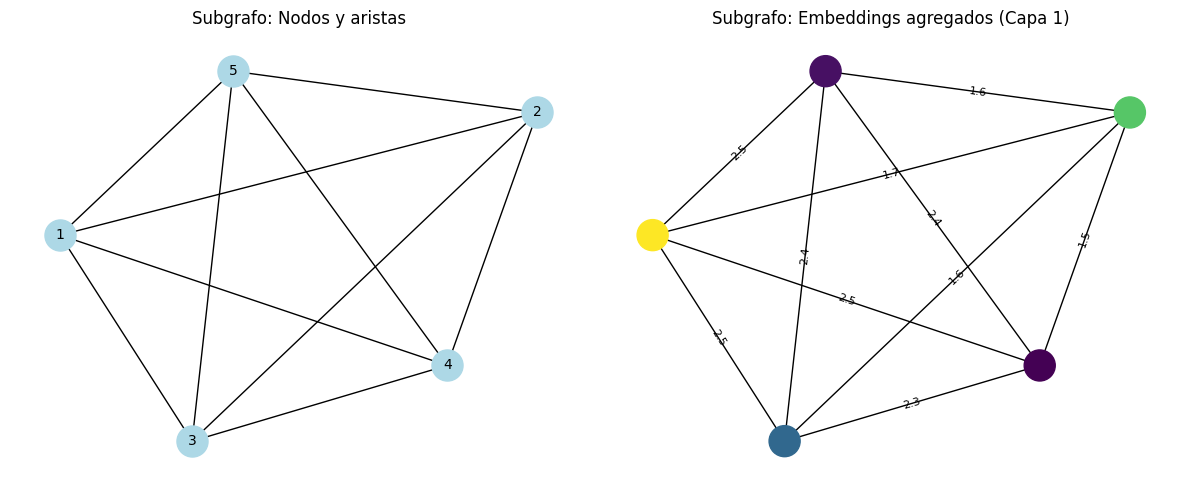

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import torch

# Crear un subgrafo pequeño para visualización
subgraph_nodes = list(G.nodes)[:5]  # Tomar los primeros 5 nodos
subG = G.subgraph(subgraph_nodes)

# Configurar el lienzo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Dibujar grafo inicial
pos = nx.spring_layout(subG)
nx.draw(subG, pos, ax=ax1, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edge_labels(subG, pos, edge_labels={(u, v): f"{d['weight']:.1f}" for u, v, d in subG.edges(data=True)}, font_size=8)
ax1.set_title("Subgrafo: Nodos y aristas")

# Simular una capa SAGEConv
node_features = torch.tensor([G.nodes[n]['combined_features'] for n in subgraph_nodes], dtype=torch.float)
edge_index = torch.tensor([[list(G.nodes).index(u), list(G.nodes).index(v)] for u, v in subG.edges], dtype=torch.long).t()
edge_weight = torch.tensor([subG[u][v]['weight'] for u, v in subG.edges], dtype=torch.float)

# Aplicar agregación manual
agg_features = {}
for node in subgraph_nodes:
    node_idx = list(G.nodes).index(node)
    neighbors = [list(G.nodes).index(n) for n in subG.neighbors(node)]
    if neighbors:
        neighbor_feats = node_features[neighbors]
        weights = torch.tensor([subG[node][n]['weight'] for n in subG.neighbors(node)], dtype=torch.float)
        agg = (neighbor_feats.T * weights).T.mean(dim=0)
    else:
        agg = torch.zeros_like(node_features[0])
    agg_features[node] = agg

# Dibujar embeddings agregados
node_colors = [sum(agg_features[n].numpy()) for n in subgraph_nodes]  # Intensidad basada en suma de embeddings
nx.draw(subG, pos, ax=ax2, node_color=node_colors, cmap=plt.cm.viridis, node_size=500, font_size=10)
ax2.set_title("Subgrafo: Embeddings agregados (Capa 1)")

plt.tight_layout()
plt.show()

Número de nodos: 80
Índice máximo en edge_index: 79


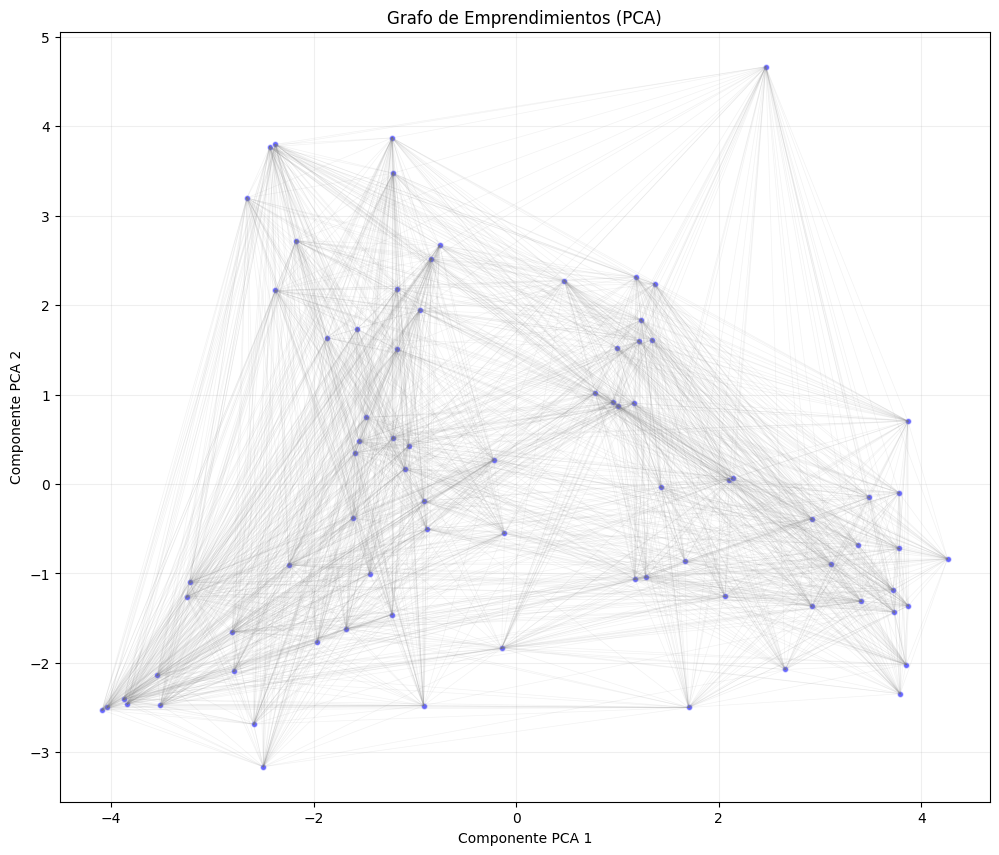

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# 1. Reducir dimensionalidad
pca = PCA(n_components=2)
node_positions = pca.fit_transform(data.x.numpy())

# 2. Verificar consistencia de índices
print(f"Número de nodos: {len(node_positions)}")
print(f"Índice máximo en edge_index: {data.edge_index.max().item()}")

# 3. Filtrar aristas válidas
valid_edges = []
for edge in data.edge_index.t().numpy():
    if edge[0] < len(node_positions) and edge[1] < len(node_positions):
        valid_edges.append(edge)
    else:
        print(f"Arista inválida ignorada: {edge}")

valid_edges = np.array(valid_edges)

# 4. Visualización
plt.figure(figsize=(12, 10))

# Dibujar aristas primero (para que queden detrás de los nodos)
for edge in valid_edges:
    plt.plot(node_positions[edge, 0], node_positions[edge, 1],
             'gray', alpha=0.1, linewidth=0.5)

# Dibujar nodos
plt.scatter(node_positions[:, 0], node_positions[:, 1],
            s=20, alpha=0.6, c='blue', edgecolors='white')

plt.title("Grafo de Emprendimientos (PCA)")
plt.xlabel("Componente PCA 1")
plt.ylabel("Componente PCA 2")
plt.grid(alpha=0.2)
plt.show()

In [23]:
from pyvis.network import Network
from sklearn.decomposition import PCA
import numpy as np
import json  # <-- Importación faltante
from IPython.display import HTML

# 1. Convertir features a float64 (serializable)
node_features = data.x.numpy().astype('float64')

# 2. Calcular posiciones de los nodos con PCA
pca = PCA(n_components=2)
node_positions = pca.fit_transform(node_features)

# 3. Normalizar posiciones
node_positions = (node_positions - node_positions.min()) / (node_positions.max() - node_positions.min())

# 4. Crear red
net = Network(notebook=True,
              height="750px",
              width="100%",
              bgcolor="#222222",
              font_color="white",
              cdn_resources='remote')

# 5. Mapear IDs y asegurar tipos de datos
node_mapping = {emp_id: idx for idx, emp_id in enumerate(G.nodes())}
reverse_mapping = {idx: emp_id for idx, emp_id in enumerate(G.nodes())}

# 6. Añadir nodos con conversión explícita de tipos
for i, pos in enumerate(node_positions):
    emp_id = reverse_mapping[i]

    # Convertir todos los valores a Python nativo
    likes = float(emprendimientos_features[emprendimientos_features['id_emprendimiento'] == emp_id]['total_likes'].values[0])
    seguidores = float(emprendimientos_features[emprendimientos_features['id_emprendimiento'] == emp_id]['cantidad'].values[0])
    size = float(10 + 5*emprendimientos_features[emprendimientos_features['id_emprendimiento'] == emp_id]['total_likes_norm'].values[0])

    net.add_node(int(i),  # Asegurar índice como entero
                x=float(pos[0]*1000),
                y=float(pos[1]*1000),
                label=str(emp_id),
                title=f"""
                Emprendimiento {emp_id}
                Likes: {likes:.0f}
                Seguidores: {seguidores:.0f}
                """,
                size=size,
                color='#4dbbff')

# 7. Añadir aristas con verificación
for src, dst in data.edge_index.t().numpy():
    if int(src) in reverse_mapping and int(dst) in reverse_mapping:
        net.add_edge(int(src), int(dst),
                    width=0.3,
                    color='rgba(200, 200, 200, 0.2)')

# 8. Configuración física optimizada
physics_options = {
    "barnesHut": {
        "gravitationalConstant": -80000,
        "centralGravity": 0.3,
        "springLength": 95
    },
    "minVelocity": 0.75
}
net.set_options(f"""
{{
    "physics": {json.dumps(physics_options)}
}}
""")

# 9. Guardar y mostrar
net.save_graph("emprendimientos.html")
HTML("emprendimientos.html")

# Gráficas del Modelo

In [39]:
from datetime import datetime
import os
import torch

# Nombre base del modelo
nombre_base = "MSSYL1_"

# Obtener fecha y hora actual
fecha_actual = datetime.now().strftime("%Y%m%d_%H%M%S")

# Nombre completo del modelo
nombre_modelo = f"{nombre_base}_{fecha_actual}"

# Asegurarse que la carpeta "Modelos" existe
os.makedirs("Modelos", exist_ok=True)

# Ruta completa del archivo
ruta_modelo = os.path.join("Modelos", f"{nombre_modelo}.pth")

# 🔹 Guardar todo lo necesario
torch.save({
    'model_state_dict': model.state_dict(),
    'history': history,          # historial de entrenamiento
    'test_metrics': test_metrics, # métricas de prueba
    'test_data': test_data.cpu(), # datos de prueba completos
}, ruta_modelo)

print(f"Modelo guardado en: {ruta_modelo}")


Modelo guardado en: Modelos\MSSYL1__20250827_155424.pth


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator


def plot_training_history(history, test_metrics=None, nombre_base="modelo_Entorno_"):
    """Genera y guarda gráficas del historial de entrenamiento"""
    # Crear estructura de carpetas
    graficas_dir = os.path.join("Modelos", "Graficas", nombre_base)
    os.makedirs(graficas_dir, exist_ok=True)
    
    sns.set_style("whitegrid")
    palette = sns.color_palette("husl", 8)
    
    # Función para guardar cada gráfica
    def guardar_grafica(plt, nombre_archivo):
        ruta_completa = os.path.join(graficas_dir, f"{nombre_base}_{nombre_archivo}.png")
        plt.savefig(ruta_completa, bbox_inches='tight', dpi=300)
        plt.close()
        print(f"Gráfica guardada en: {ruta_completa}")
    
    # 1. Gráfica de pérdida de entrenamiento
    plt.figure(figsize=(8, 5))
    train_loss = history['train_loss']
    plt.plot(train_loss, label='Pérdida en Entrenamiento', color=palette[0], linewidth=2)
    plt.title('Pérdida durante el Entrenamiento', fontsize=14, pad=20)
    plt.xlabel('Época', fontsize=12)
    plt.ylabel('Pérdida', fontsize=12)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    guardar_grafica(plt, "perdida_entrenamiento")
    
    # 2. Gráfica de métricas principales
    plt.figure(figsize=(10, 6))
    epochs = np.arange(len(history['train_loss']))
    plt.plot(epochs, history['val_metrics']['auc'], label='AUC Validación', color=palette[1], linewidth=2)
    plt.plot(epochs, history['val_metrics']['f1'], label='F1 Validación', color=palette[2], linewidth=2)
    plt.plot(epochs, history['val_metrics']['precision'], label='Precisión Validación', color=palette[3], linewidth=2, linestyle='--')
    plt.plot(epochs, history['val_metrics']['recall'], label='Recall Validación', color=palette[4], linewidth=2, linestyle='--')
    plt.title('Métricas de Validación', fontsize=14, pad=20)
    plt.xlabel('Época', fontsize=12)
    plt.ylabel('Puntuación', fontsize=12)
    plt.ylim(0, 1.05)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    guardar_grafica(plt, "metricas_validacion")
    
    # 3. Gráfica de AUC y Precisión Promedio
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, history['val_metrics']['auc'], label='AUC', color=palette[5], linewidth=2)
    plt.plot(epochs, history['val_metrics']['ap'], label='Precisión Promedio', color=palette[6], linewidth=2)
    plt.title('AUC y Precisión Promedio', fontsize=14, pad=20)
    plt.xlabel('Época', fontsize=12)
    plt.ylabel('Puntuación', fontsize=12)
    plt.ylim(0, 1.05)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    guardar_grafica(plt, "auc_precision_promedio")
    
    # 4. Gráfica de Precisión y Recall
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, history['val_metrics']['precision'], label='Precisión', color=palette[3], linewidth=2)
    plt.plot(epochs, history['val_metrics']['recall'], label='Recall', color=palette[4], linewidth=2)
    plt.title('Precisión y Recall', fontsize=14, pad=20)
    plt.xlabel('Época', fontsize=12)
    plt.ylabel('Puntuación', fontsize=12)
    plt.ylim(0, 1.05)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    guardar_grafica(plt, "precision_recall")
    
    # 5. Gráfica de Puntuación F1
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, history['val_metrics']['f1'], label='Puntuación F1', color=palette[7], linewidth=2)
    plt.title('Puntuación F1', fontsize=14, pad=20)
    plt.xlabel('Época', fontsize=12)
    plt.ylabel('Puntuación', fontsize=12)
    plt.ylim(0, 1.05)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    guardar_grafica(plt, "puntuacion_f1")
    
    # 6. Gráfica de métricas finales de prueba
    if test_metrics:
        plt.figure(figsize=(8, 5))
        metrics_names = ['AUC', 'Prec. Prom.', 'Precisión', 'Recall', 'F1']
        metrics_values = [
            test_metrics['auc'],
            test_metrics['ap'],
            test_metrics['precision'],
            test_metrics['recall'],
            test_metrics['f1']
        ]
        bars = plt.bar(metrics_names, metrics_values, color=palette[:5])
        plt.title('Métricas en Conjunto de Prueba', fontsize=14, pad=20)
        plt.ylim(0, 1.1)
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.3f}',
                     ha='center', va='bottom', fontsize=11)
        plt.grid(True, linestyle='--', alpha=0.3)
        guardar_grafica(plt, "metricas_prueba")

# Uso:
plot_training_history(history, test_metrics, nombre_base="modelo_Entorno_")

Gráfica guardada en: Modelos\Graficas\modelo_Entorno_\modelo_Entorno__perdida_entrenamiento.png
Gráfica guardada en: Modelos\Graficas\modelo_Entorno_\modelo_Entorno__metricas_validacion.png
Gráfica guardada en: Modelos\Graficas\modelo_Entorno_\modelo_Entorno__auc_precision_promedio.png
Gráfica guardada en: Modelos\Graficas\modelo_Entorno_\modelo_Entorno__precision_recall.png
Gráfica guardada en: Modelos\Graficas\modelo_Entorno_\modelo_Entorno__puntuacion_f1.png
Gráfica guardada en: Modelos\Graficas\modelo_Entorno_\modelo_Entorno__metricas_prueba.png


In [20]:
def plot_roc_pr_curves(model, test_data, nombre_base="modelo_Entorno_"):
    """Genera y guarda gráficas ROC y Precision-Recall en español"""
    from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
    
    # Configurar estructura de carpetas
    graficas_dir = os.path.join("Modelos", "Graficas", nombre_base)
    os.makedirs(graficas_dir, exist_ok=True)
    
    model.eval()
    h = model(test_data.x, test_data.edge_index)
    pred = model.predict(h[test_data.edge_label_index[0]], 
                        h[test_data.edge_label_index[1]])
    y = test_data.edge_label.float()
    
    # Convertir a numpy
    y_np = y.cpu().detach().numpy()
    pred_np = pred.cpu().detach().numpy()
    
    # Calcular métricas
    auc_score = roc_auc_score(y_np, pred_np)
    ap_score = average_precision_score(y_np, pred_np)
    fpr, tpr, _ = roc_curve(y_np, pred_np)
    precision, recall, _ = precision_recall_curve(y_np, pred_np)
    
    # Función para guardar gráficas
    def guardar_grafica(plt, nombre_archivo):
        ruta_completa = os.path.join(graficas_dir, f"{nombre_base}_{nombre_archivo}.png")
        plt.savefig(ruta_completa, bbox_inches='tight', dpi=300)
        plt.close()
        print(f"Gráfica guardada en: {ruta_completa}")
    
    # 1. Gráfica ROC (guardada por separado)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='#FF7F0E', lw=2, label=f'Curva ROC (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
    plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
    plt.title('Curva ROC', fontsize=14, pad=20)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    guardar_grafica(plt, "curva_roc")
    
    # 2. Gráfica Precision-Recall (guardada por separado)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='#1F77B4', lw=2, 
             label=f'Curva PR (AP = {ap_score:.3f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall (Sensibilidad)', fontsize=12)
    plt.ylabel('Precisión', fontsize=12)
    plt.title('Curva Precisión-Recall', fontsize=14, pad=20)
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    guardar_grafica(plt, "curva_precision_recall")
    
    # 3. Gráfica combinada (opcional)
    plt.figure(figsize=(14, 6))
    sns.set_style("whitegrid")
    
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='#FF7F0E', lw=2, label=f'Curva ROC (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
    plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
    plt.title('Curva ROC', fontsize=14, pad=20)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='#1F77B4', lw=2, 
             label=f'Curva PR (AP = {ap_score:.3f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall (Sensibilidad)', fontsize=12)
    plt.ylabel('Precisión', fontsize=12)
    plt.title('Curva Precisión-Recall', fontsize=14, pad=20)
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    guardar_grafica(plt, "curvas_combinadas")
    plt.close()

# Uso:
plot_roc_pr_curves(model, test_data, nombre_base="modelo_Entorno_")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [21]:
def plot_confusion_matrix(model, test_data, threshold=0.5, nombre_base="modelo_Entorno_"):
    """Genera y guarda matriz de confusión en español"""
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    # Configurar estructura de carpetas
    graficas_dir = os.path.join("Modelos", "Graficas", nombre_base)
    os.makedirs(graficas_dir, exist_ok=True)
    
    model.eval()
    h = model(test_data.x, test_data.edge_index)
    pred = model.predict(h[test_data.edge_label_index[0]], 
                        h[test_data.edge_label_index[1]])
    y = test_data.edge_label.float()
    
    # Convertir a numpy
    y_np = y.cpu().detach().numpy()
    pred_np = (pred.cpu().detach().numpy() > threshold).astype(int)
    
    # Calcular matriz de confusión
    cm = confusion_matrix(y_np, pred_np)
    
    # Crear figura
    plt.figure(figsize=(8, 6))
    sns.set_style("whitegrid")
    
    # Configuración en español
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                display_labels=['Negativo', 'Positivo'])
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca(), colorbar=False)
    
    # Título y etiquetas mejoradas
    plt.title(f'Matriz de Confusión (Umbral = {threshold})', fontsize=14, pad=20)
    plt.xlabel('Predicción', fontsize=12)
    plt.ylabel('Valor Real', fontsize=12)
    
    # Añadir porcentajes y conteos con mejor formato
    total = cm.sum()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, f"\n\n({cm[i, j]/total*100:.1f}%)",
                    ha="center", 
                    va="center", 
                    color="white" if cm[i, j] > cm.max()/2 else "black",
                    fontsize=12,
                    bbox=dict(facecolor='white', alpha=0.3, edgecolor='none'))
    
    plt.grid(False)
    plt.tight_layout()
    
    # Guardar la gráfica
    ruta_guardado = os.path.join(graficas_dir, f"{nombre_base}_matriz_confusion.png")
    plt.savefig(ruta_guardado, bbox_inches='tight', dpi=300)
    print(f"Matriz de confusión guardada en: {ruta_guardado}")
    plt.close()

# Uso:
plot_confusion_matrix(model, test_data, threshold=0.5, nombre_base="modelo_Entorno_")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

# Realizar Predicciones

## Para Cargar un Modelo

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv

# Definir la clase GraphSAGE (misma que en el entrenamiento)
class GraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers=2, dropout=0.3):
        super().__init__()
        self.convs = nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        for _ in range(num_layers - 2):
            self.convs.append(SAGEConv(hidden_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))
        
        self.dropout = dropout
        self.predictor = nn.Sequential(
            nn.Linear(2 * out_channels, out_channels),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(out_channels, 1)
        )
    
    def forward(self, x, edge_index):
        for conv in self.convs[:-1]:
            x = conv(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return x
    
    def predict(self, x_src, x_dst):
        h = torch.cat([x_src, x_dst], dim=1)
        return torch.sigmoid(self.predictor(h)).view(-1)

# Configurar dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Definir hiperparámetros
in_channels = 120  # Confirmado por la salida del modelo (SAGEConv(120, 256))
hidden_channels = 256
out_channels = 128

# Crear instancia del modelo
model = GraphSAGE(in_channels, hidden_channels, out_channels).to(device)

# Cargar el archivo .pth
model_path = r"D:\Universidad\Proyecto De Grado\Construccion del modelo\Modelo_Repositorio\Modelos\Segundo Metodo Modelos\model_5_20250627_184503.pth"
checkpoint = torch.load(model_path, map_location=device, weights_only=False)

# Extraer el state_dict del diccionario cargado
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # Poner el modelo en modo evaluación

# Usar test_data del entrenamiento para las predicciones
data = test_data.to(device)  # Mover test_data al dispositivo

# Obtener embeddings y realizar predicciones
with torch.no_grad():
    h = model(data.x, data.edge_index)  # Generar embeddings para todos los nodos
    pred = model.predict(h[data.edge_label_index[0]], h[data.edge_label_index[1]])  # Predecir para las aristas
    pred_np = pred.cpu().numpy()  # Convertir a numpy
    pred_binary = (pred_np > 0.5).astype(int)  # Predicciones binarias (umbral 0.5)

# Mostrar resultados
print("Predicciones (probabilidades):", pred_np)
print("Predicciones (binarias):", pred_binary)

# Opcional: Comparar con etiquetas reales (si están disponibles)
if hasattr(data, 'edge_label'):
    y_np = data.edge_label.cpu().numpy()
    print("Etiquetas reales:", y_np)
    # Calcular métricas
    from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, average_precision_score
    auc = roc_auc_score(y_np, pred_np)
    ap = average_precision_score(y_np, pred_np)
    precision = precision_score(y_np, pred_binary)
    recall = recall_score(y_np, pred_binary)
    f1 = f1_score(y_np, pred_binary)
    print(f"Métricas de prueba: Precision: {precision:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}, Recall: {recall:.4f}, AP: {ap:.4f}")

Predicciones (probabilidades): [9.39689279e-01 9.75932598e-01 9.89080906e-01 9.90255773e-01
 9.88072813e-01 9.97163117e-01 9.80772853e-01 9.35518384e-01
 9.78171587e-01 2.78432429e-01 9.89091516e-01 9.93686736e-01
 9.63977993e-01 9.61416304e-01 9.24253404e-01 9.90447402e-01
 9.75095928e-01 9.80836689e-01 9.91955638e-01 9.75137413e-01
 9.94249582e-01 9.89594340e-01 8.82521331e-01 9.93408680e-01
 9.81935680e-01 9.74166393e-01 9.73685384e-01 5.94226003e-01
 9.15662348e-01 9.90260541e-01 9.96126831e-01 6.11036360e-01
 9.95486200e-01 9.99108374e-01 9.89360332e-01 9.55530524e-01
 9.50824142e-01 9.97922480e-01 9.98969316e-01 9.86125529e-01
 9.71355855e-01 9.00013745e-01 8.53656888e-01 9.79447484e-01
 7.01690137e-01 9.91695821e-01 8.50706995e-01 5.82111537e-01
 6.09590888e-01 9.98132288e-01 7.31153190e-01 9.95265841e-01
 9.93147552e-01 6.95091486e-01 9.91298616e-01 9.91324306e-01
 9.97509956e-01 9.84155297e-01 9.88608599e-01 9.89281416e-01
 9.92012441e-01 4.53596711e-01 9.87131417e-01 9.949181

In [37]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def get_emprendimiento_info(id_emprendimiento, emprendimientos_df):
    """Obtiene información de un emprendimiento dado su ID"""
    emp = emprendimientos_df[emprendimientos_df['id_emprendimiento'] == id_emprendimiento].iloc[0]
    return {
        'id': id_emprendimiento,
        'nombre': emp['nombre_emprendimiento'],
        'descripcion': emp['descripcion'],
        'municipio': emp['id_municipio_origen'],
        'alcance': emp['id_alcance']
    }

def recommend_emprendimientos(model, data, emprendimientos_df, target_id, top_k=15):
    """
    Recomienda emprendimientos similares a uno dado
    
    Args:
        model: Modelo GraphSAGE entrenado
        data: Datos del grafo (en formato PyG)
        emprendimientos_df: DataFrame con información de emprendimientos
        target_id: ID del emprendimiento objetivo
        top_k: Número de recomendaciones a devolver
    """
    # Verificar dispositivo del modelo
    device = next(model.parameters()).device
    
    # Verificar si el emprendimiento objetivo existe en el DataFrame
    if target_id not in emprendimientos_df['id_emprendimiento'].values:
        print(f"Error: No se encontró el emprendimiento con ID {target_id} en el DataFrame")
        return None
    
    # Mover datos al mismo dispositivo que el modelo
    data = data.to(device)
    
    # Obtener embeddings de todos los nodos
    model.eval()
    with torch.no_grad():
        embeddings = model(data.x, data.edge_index).cpu().numpy()
    
    # Asumimos que el orden de los nodos en data.x corresponde a los IDs ordenados
    # Si no es así, necesitaríamos mapear los índices a los IDs
    node_ids = emprendimientos_df['id_emprendimiento'].values
    
    try:
        target_idx = np.where(node_ids == target_id)[0][0]
    except IndexError:
        print(f"Error: El ID {target_id} no existe en los nodos del grafo")
        return None
    
    # Calcular similitud coseno
    target_embedding = embeddings[target_idx].reshape(1, -1)
    similarities = cosine_similarity(target_embedding, embeddings)[0]
    
    # Ordenar por similitud (excluyendo el propio emprendimiento)
    sorted_indices = np.argsort(similarities)[::-1]
    sorted_indices = [i for i in sorted_indices if node_ids[i] != target_id][:top_k]
    
    # Obtener información de los emprendimientos recomendados
    recommendations = []
    for idx in sorted_indices:
        emp_id = node_ids[idx]
        similarity = similarities[idx]
        emp_info = get_emprendimiento_info(emp_id, emprendimientos_df)
        emp_info['similitud'] = f"{similarity:.3f}"
        recommendations.append(emp_info)
    
    return recommendations

    
def print_recommendations(target_emp, recommendations):
    """Muestra las recomendaciones de forma legible"""
    print(f"\nRecomendaciones para el emprendimiento:")
    print(f"ID: {target_emp['id']}")
    print(f"Nombre: {target_emp['nombre']}")
    print(f"Descripción: {target_emp['descripcion']}")
    print(f"Municipio: {target_emp['municipio']}")
    print(f"Alcance: {target_emp['alcance']}")
    
    print("\nEmprendimientos recomendados:")
    for i, rec in enumerate(recommendations, 1):
        print(f"\n#{i} (Similitud: {rec['similitud']})")
        print(f"ID: {rec['id']}")
        print(f"Nombre: {rec['nombre']}")
        print(f"Descripción: {rec['descripcion']}")
        print(f"Municipio: {rec['municipio']}")
        print(f"Alcance: {rec['alcance']}")

# Ejemplo de uso después del entrenamiento:
# 1. Cargar el dataframe de emprendimientos 
# emprendimientos_df = pd.read_csv('ruta/a/tu/archivo.csv')

# 2. Seleccionar un emprendimiento para recomendar
# target_id = 5  # Cambia esto por el ID que quieras probar

# 3. Obtener recomendaciones
# target_emp = get_emprendimiento_info(target_id, emprendimientos_df)
# recommendations = recommend_emprendimientos(model, data, emprendimientos_df, target_id)

# 4. Mostrar resultados
# print_recommendations(target_emp, recommendations)

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
data = data.to(device)

# Cargar el dataframe de emprendimientos
emprendimientos_df = pd.read_csv('.\DATOS\emprendimientos.csv')

# Generar recomendaciones
target_id = 46 # Cambia esto por el ID que quieras probar
target_emp = get_emprendimiento_info(target_id, emprendimientos_df)
recommendations = recommend_emprendimientos(model, data, emprendimientos_df, target_id)

if recommendations:
    print_recommendations(target_emp, recommendations)


Recomendaciones para el emprendimiento:
ID: 46
Nombre: Mujeres Tejedoras
Descripción: Taller de empoderamiento femenino a través de tejidos
Municipio: 1
Alcance: 1

Emprendimientos recomendados:

#1 (Similitud: 0.954)
ID: 38
Nombre: Manos Nasa
Descripción: Productos tejidos por comunidades indígenas
Municipio: 3
Alcance: 1

#2 (Similitud: 0.951)
ID: 56
Nombre: EcoFeminista
Descripción: Huerto urbano gestionado por mujeres
Municipio: 2
Alcance: 1

#3 (Similitud: 0.950)
ID: 29
Nombre: Tejidos Andinos
Descripción: Accesorios tejidos por mujeres indígenas
Municipio: 7
Alcance: 1

#4 (Similitud: 0.948)
ID: 57
Nombre: Manos Diversas
Descripción: Artesanías elaboradas por comunidades vulnerables
Municipio: 3
Alcance: 1

#5 (Similitud: 0.943)
ID: 41
Nombre: Sabores del Huerto
Descripción: Elaboración de mermeladas y conservas con frutas locales
Municipio: 6
Alcance: 1

#6 (Similitud: 0.926)
ID: 36
Nombre: Reutiliza Moda
Descripción: Ropa reciclada con diseño local
Municipio: 2
Alcance: 1

#7 

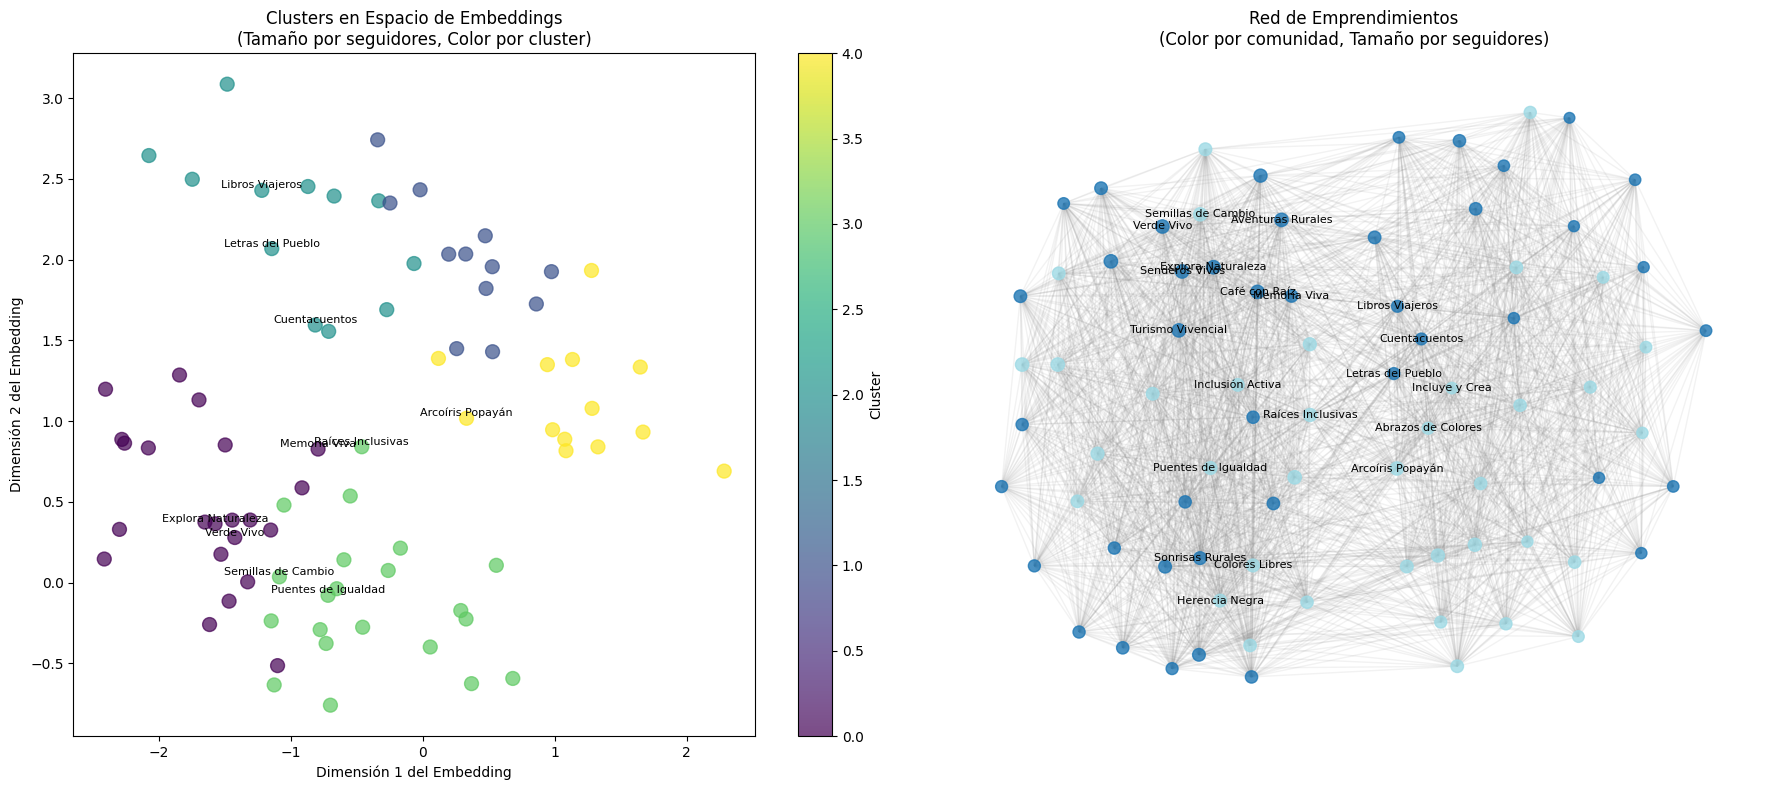


ANÁLISIS DETALLADO DE COMUNIDADES

🔵 COMUNIDAD 0 (43 miembros)
📌 Temáticas principales: Inclusión social, Justicia ambiental, Conservación ambiental, Derechos humanos
📍 Municipio más común: 1
🌐 Alcance predominante: Regional
👥 Seguidores totales: 14,476

🚀 Emprendimientos destacados:
- Explora Naturaleza (436 seguidores)
- Senderos Vivos (432 seguidores)
- Ríos Vivos (431 seguidores)
- EcoRutas (429 seguidores)
- Verde Vivo (427 seguidores)
- Turismo Vivencial (426 seguidores)

📊 Características del cluster 0:
- Miembros: 22
- Seguidores promedio: 325
- Temáticas únicas: 14

🔵 COMUNIDAD 1 (37 miembros)
📌 Temáticas principales: Inclusión social, Artesanías, Feminismo, Cultura indígena
📍 Municipio más común: 1
🌐 Alcance predominante: Local
👥 Seguidores totales: 8,523

🚀 Emprendimientos destacados:
- Arcoíris Popayán (412 seguidores)
- Feminismo Rural (398 seguidores)
- Voces Diversas (387 seguidores)
- Diversidad en Marcha (328 seguidores)
- Orgullo Afro (315 seguidores)
- EcoHuertas Ur

In [27]:
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch

def detect_communities_with_embeddings(model, G, test_data, emprendimientos_df, tematicas_df, emprendimiento_tematica_df):
    """Detecta comunidades con visualizaciones detalladas y análisis"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # 1. Generar embeddings
    model.eval()
    with torch.no_grad():
        z = model(test_data.x.to(device), test_data.edge_index.to(device)).cpu().numpy()
    
    # 2. Clustering con K-Means
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(z)
    
    # 3. Detección de comunidades con Louvain
    partition = nx.community.louvain_communities(G.to_undirected(), weight='weight', resolution=1.0)
    partition_dict = {node: i for i, community in enumerate(partition) for node in community}
    
    # 4. Preparar datos para análisis
    results_df = pd.DataFrame({
        'id_emprendimiento': list(G.nodes()),
        'cluster_embedding': clusters,
        'comunidad_louvain': [partition_dict[node] for node in G.nodes()]
    }).merge(
        emprendimientos_df[['id_emprendimiento', 'nombre_emprendimiento', 'descripcion', 'id_municipio_origen', 'id_alcance']],
        on='id_emprendimiento'
    ).merge(
        seguidores[['id_emprendimiento', 'cantidad']],
        on='id_emprendimiento',
        how='left'
    ).fillna({'cantidad': 0})
    
    # 5. Análisis de temáticas por comunidad
    comunidad_tematica = []
    for com_id in set(partition_dict.values()):
        emps = results_df[results_df['comunidad_louvain'] == com_id]['id_emprendimiento']
        temas = emprendimiento_tematica_df[emprendimiento_tematica_df['id_emprendimiento'].isin(emps)]['id_tematica']
        top_temas = temas.value_counts().head(4).index
        tema_names = [tematicas_df[tematicas_df['id_tematica'] == t]['nombre'].values[0] for t in top_temas]
        comunidad_tematica.append(', '.join(tema_names))
    
    # 6. Visualización mejorada
    plt.figure(figsize=(18, 8))
    
    # Gráfico 1: Embeddings con nombres
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(z[:, 0], z[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.7)
    
    # Mostrar algunos nombres (los más centrales)
    central_nodes = sorted(G.degree(weight='weight'), key=lambda x: x[1], reverse=True)[:10]
    for node, _ in central_nodes:
        idx = list(G.nodes()).index(node)
        plt.text(z[idx, 0], z[idx, 1], 
                results_df[results_df['id_emprendimiento'] == node]['nombre_emprendimiento'].values[0],
                fontsize=8, ha='center', va='bottom')
    
    plt.colorbar(scatter, label='Cluster')
    plt.title('Clusters en Espacio de Embeddings\n(Tamaño por seguidores, Color por cluster)', fontsize=12)
    plt.xlabel('Dimensión 1 del Embedding')
    plt.ylabel('Dimensión 2 del Embedding')
    
    # Gráfico 2: Red con comunidades
    plt.subplot(1, 2, 2)
    pos = nx.spring_layout(G, weight='weight', seed=42)
    
    # Dibujar con tamaño proporcional a seguidores
    node_sizes = [results_df[results_df['id_emprendimiento'] == n]['cantidad'].values[0]/10 + 50 for n in G.nodes()]
    
    nx.draw_networkx_nodes(
        G, pos,
        node_color=list(partition_dict.values()),
        node_size=node_sizes,
        cmap='tab20',
        alpha=0.8
    )
    
    # Etiquetar nodos importantes
    for node, (x, y) in pos.items():
        if G.degree(node, weight='weight') > np.percentile([d for n, d in G.degree(weight='weight')], 75):
            plt.text(x, y, 
                    results_df[results_df['id_emprendimiento'] == node]['nombre_emprendimiento'].values[0],
                    fontsize=8, ha='center', va='center')
    
    nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
    plt.title('Red de Emprendimientos\n(Color por comunidad, Tamaño por seguidores)', fontsize=12)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 7. Análisis detallado por comunidad
    print("\n" + "="*80)
    print("ANÁLISIS DETALLADO DE COMUNIDADES")
    print("="*80)
    
    for com_id in sorted(set(partition_dict.values())):
        miembros = results_df[results_df['comunidad_louvain'] == com_id]
        
        print(f"\n🔵 COMUNIDAD {com_id} ({len(miembros)} miembros)")
        print(f"📌 Temáticas principales: {comunidad_tematica[com_id]}")
        print(f"📍 Municipio más común: {miembros['id_municipio_origen'].mode()[0]}")
        print(f"🌐 Alcance predominante: {'Local' if miembros['id_alcance'].mode()[0] == 1 else 'Regional'}")
        print(f"👥 Seguidores totales: {miembros['cantidad'].sum():,}")
        
        # Top emprendimientos por seguidores
        top_emps = miembros.sort_values('cantidad', ascending=False).head(6)
        print("\n🚀 Emprendimientos destacados:")
        for _, emp in top_emps.iterrows():
            print(f"- {emp['nombre_emprendimiento']} ({emp['cantidad']} seguidores)")
        
        # Características del cluster
        cluster_id = miembros['cluster_embedding'].mode()[0]
        cluster_members = results_df[results_df['cluster_embedding'] == cluster_id]
        print(f"\n📊 Características del cluster {cluster_id}:")
        print(f"- Miembros: {len(cluster_members)}")
        print(f"- Seguidores promedio: {cluster_members['cantidad'].mean():.0f}")
        print(f"- Temáticas únicas: {len(cluster_members.merge(emprendimiento_tematica_df, on='id_emprendimiento')['id_tematica'].unique())}")
    
    return results_df, z

# Ejecutar con todos los datos necesarios
communities_df, embeddings = detect_communities_with_embeddings(
    model, G, test_data, 
    emprendimientos, tematicas, emprendimiento_tematica
)

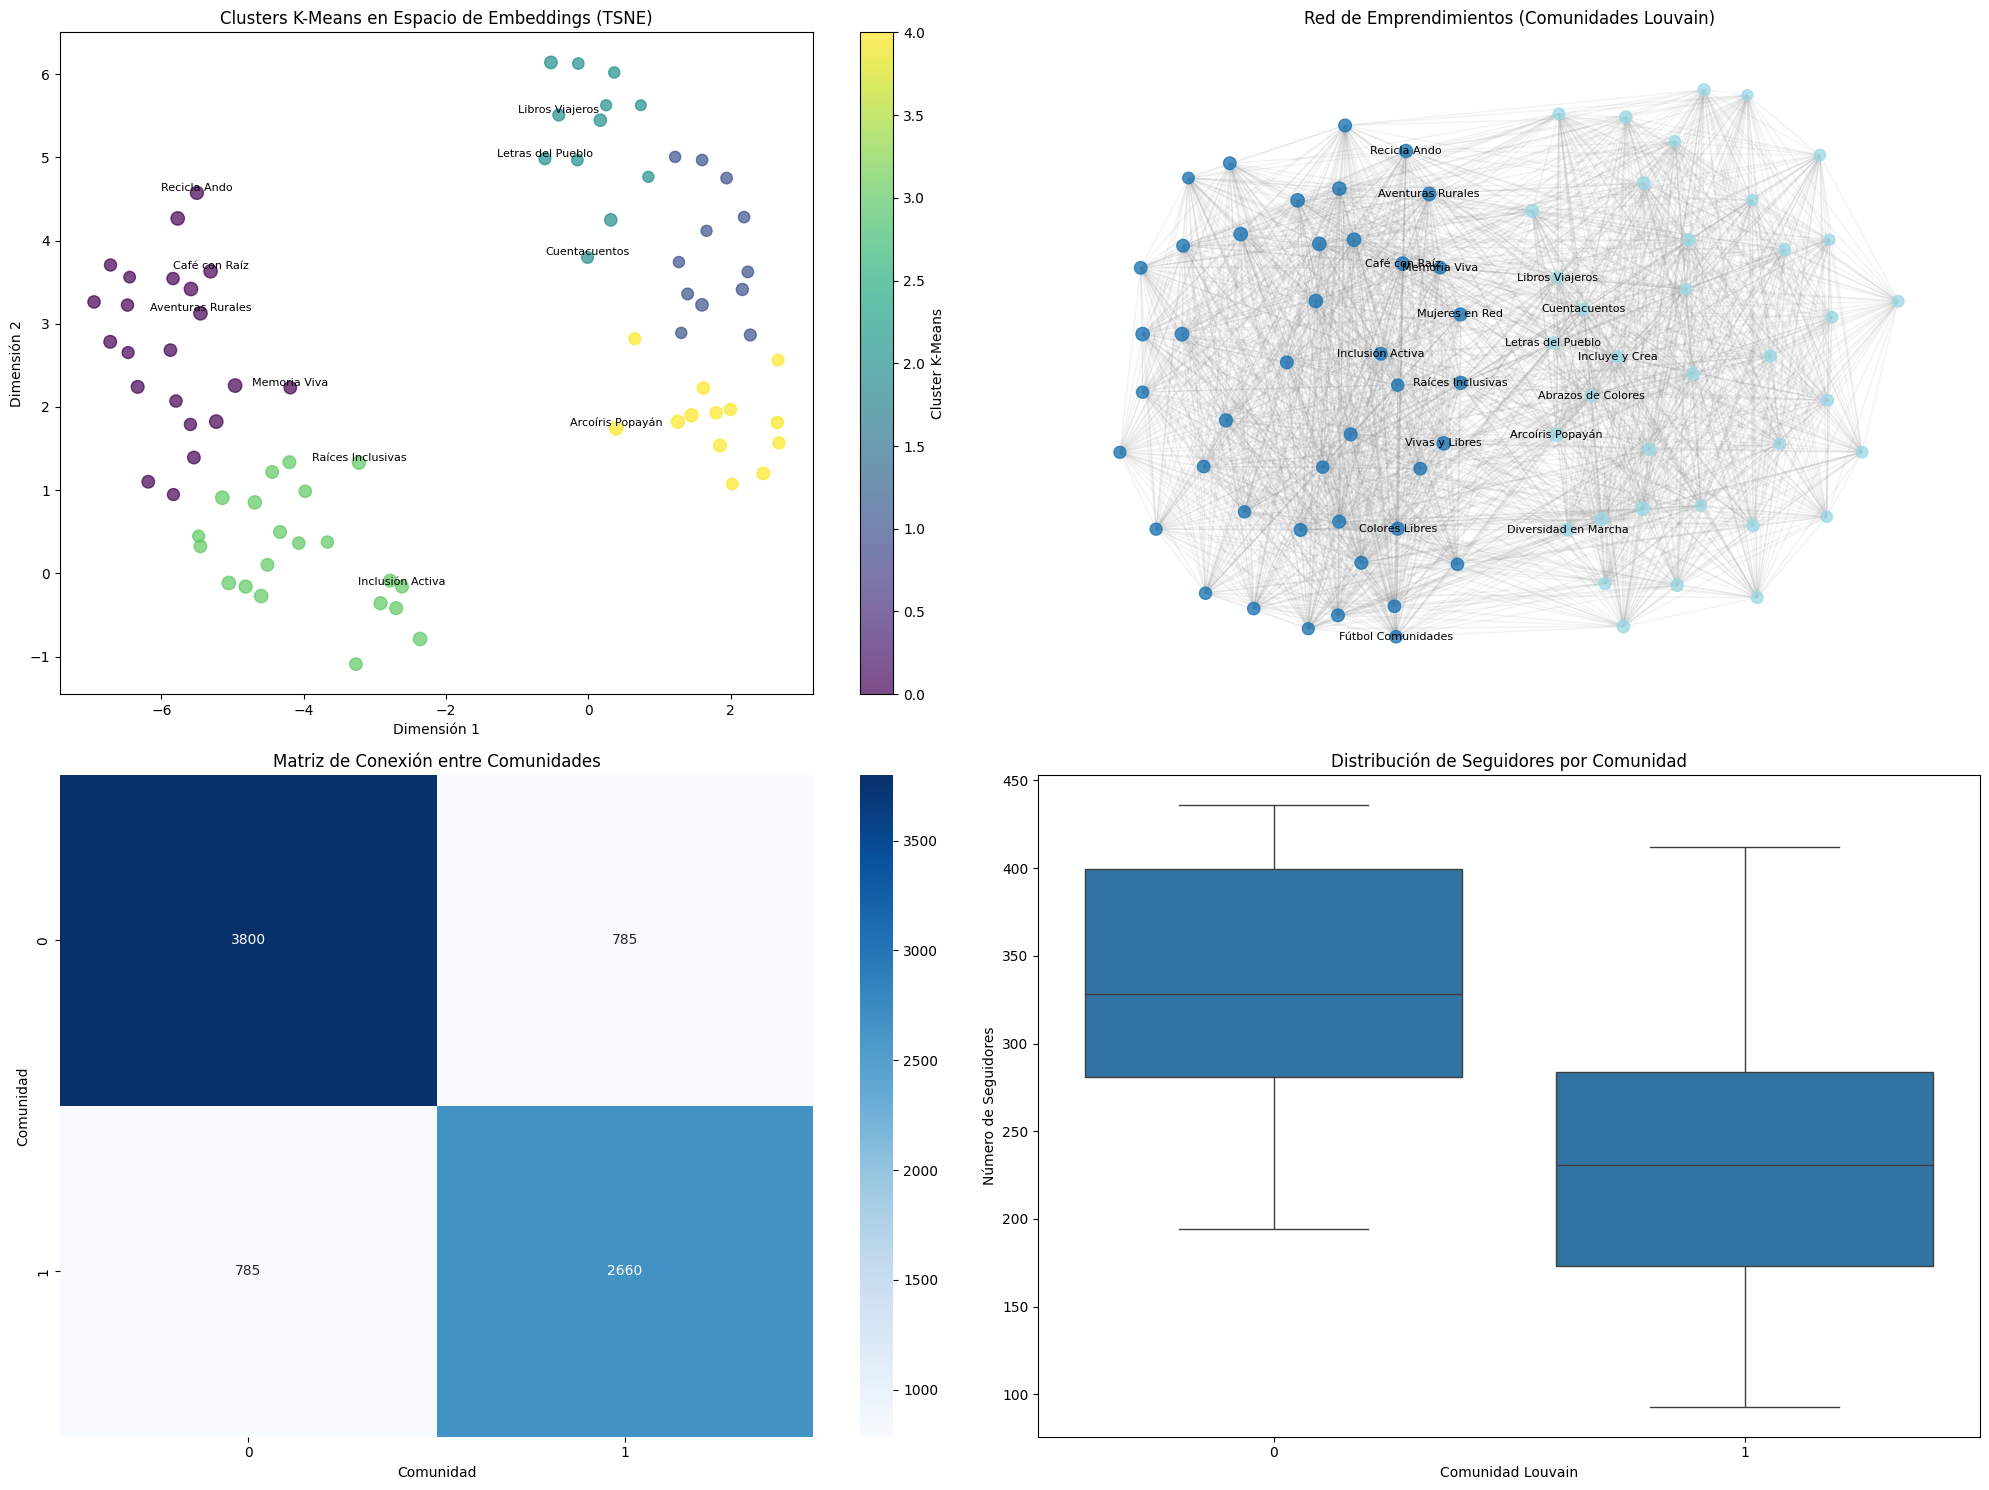


ANÁLISIS DETALLADO DE COMUNIDADES Y CLUSTERS

📊 Métricas de Clustering:
K-Means - Silhouette: 0.3206, Davies-Bouldin: 1.0086
Agglomerative - Silhouette: 0.3162, Davies-Bouldin: 0.9842
DBSCAN - N° Clusters: 0, Silhouette: 0.0000

🔄 Solapamiento entre K-Means y Louvain:
comunidad_louvain   0   1
cluster_kmeans           
0                  22   0
1                   0  12
2                   0  12
3                  21   0
4                   0  13

🔵 COMUNIDAD 0 (43 miembros)
📌 Temáticas principales: Inclusión social, Justicia ambiental, Conservación ambiental, Derechos humanos, Educación
📊 Distribución de temáticas: {15: 12, 17: 11, 10: 11, 16: 9, 6: 7, 12: 5, 1: 4, 7: 4, 5: 4, 13: 4, 14: 3, 11: 3, 9: 3, 19: 2, 3: 2, 2: 1, 18: 1}
📍 Municipio más común: 1
🌐 Alcance predominante: Regional
👥 Seguidores totales: 14,476
📈 Centralidad promedio (degree): 0.6674
📈 Centralidad promedio (betweenness): 0.0013

🚀 Emprendimientos destacados:
- Explora Naturaleza (436 seguidores, Centralidad: 0.696

In [26]:
import numpy as np
import pandas as pd
import torch
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.sparse.csgraph import connected_components
import community as community_louvain  # Para Louvain
from collections import Counter
import plotly.express as px  # Para visualizaciones interactivas
import plotly.graph_objects as go

def detect_communities_with_embeddings(model, G, test_data, emprendimientos_df, tematicas_df, emprendimiento_tematica_df, n_clusters=5, resolution=1.0, use_3d=False):
    """
    Detecta comunidades con múltiples métodos de clustering y visualizaciones avanzadas.
    
    Args:
        model: Modelo GraphSAGE entrenado
        G: Grafo NetworkX
        test_data: Objeto Data de PyTorch Geometric con x, edge_index, edge_label_index
        emprendimientos_df: DataFrame con datos de emprendimientos
        tematicas_df: DataFrame con datos de temáticas
        emprendimiento_tematica_df: DataFrame con relaciones emprendimiento-temática
        n_clusters: Número de clusters para K-Means y Agglomerative
        resolution: Resolución para Louvain
        use_3d: Si True, genera visualización 3D interactiva
    
    Returns:
        results_df: DataFrame con asignaciones de clusters y comunidades
        embeddings: Embeddings generados por el modelo
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # 1. Generar embeddings
    model.eval()
    with torch.no_grad():
        z = model(test_data.x.to(device), test_data.edge_index.to(device)).cpu().numpy()
    
    # 2. Múltiples métodos de clustering
    # K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(z)
    kmeans_silhouette = silhouette_score(z, kmeans_labels) if n_clusters > 1 else 0
    kmeans_db = davies_bouldin_score(z, kmeans_labels) if n_clusters > 1 else 0

    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_labels = agglomerative.fit_predict(z)
    agg_silhouette = silhouette_score(z, agg_labels) if n_clusters > 1 else 0
    agg_db = davies_bouldin_score(z, agg_labels) if n_clusters > 1 else 0

    # DBSCAN (para detectar outliers)
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(z)
    n_dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    dbscan_silhouette = silhouette_score(z, dbscan_labels) if n_dbscan_clusters > 1 else 0

    # 3. Detección de comunidades con Louvain
    partition = community_louvain.best_partition(G.to_undirected(), weight='weight', resolution=resolution)
    louvain_labels = np.array([partition[node] for node in G.nodes()])
    n_louvain_communities = len(set(partition.values()))

    # 4. Preparar datos para análisis
    results_df = pd.DataFrame({
        'id_emprendimiento': list(G.nodes()),
        'cluster_kmeans': kmeans_labels,
        'cluster_agglomerative': agg_labels,
        'cluster_dbscan': dbscan_labels,
        'comunidad_louvain': louvain_labels
    }).merge(
        emprendimientos_df[['id_emprendimiento', 'nombre_emprendimiento', 'descripcion', 'id_municipio_origen', 'id_alcance']],
        on='id_emprendimiento'
    ).merge(
        seguidores[['id_emprendimiento', 'cantidad']],
        on='id_emprendimiento',
        how='left'
    ).fillna({'cantidad': 0})

    # 5. Análisis de centralidad
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
    results_df['degree_centrality'] = [degree_centrality[node] for node in results_df['id_emprendimiento']]
    results_df['betweenness_centrality'] = [betweenness_centrality[node] for node in results_df['id_emprendimiento']]

    # 6. Análisis de temáticas por comunidad
    comunidad_tematica = []
    for com_id in set(louvain_labels):
        emps = results_df[results_df['comunidad_louvain'] == com_id]['id_emprendimiento']
        temas = emprendimiento_tematica_df[emprendimiento_tematica_df['id_emprendimiento'].isin(emps)]['id_tematica']
        tema_counts = temas.value_counts()
        top_temas = tema_counts.head(5).index
        tema_names = [tematicas_df[tematicas_df['id_tematica'] == t]['nombre'].values[0] for t in top_temas]
        comunidad_tematica.append({
            'comunidad': com_id,
            'tematicas': ', '.join(tema_names),
            'tematica_counts': tema_counts.to_dict()
        })

    # 7. Visualizaciones avanzadas
    plt.figure(figsize=(20, 15))

    # Gráfico 1: Embeddings 2D con TSNE
    tsne = TSNE(n_components=2, random_state=42)
    z_2d = tsne.fit_transform(z)

    plt.subplot(2, 2, 1)
    scatter = plt.scatter(z_2d[:, 0], z_2d[:, 1], c=kmeans_labels, cmap='viridis', s=results_df['cantidad'] / 10 + 50, alpha=0.7)
    plt.colorbar(scatter, label='Cluster K-Means')
    central_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for node, _ in central_nodes:
        idx = list(G.nodes()).index(node)
        plt.text(z_2d[idx, 0], z_2d[idx, 1], 
                 results_df[results_df['id_emprendimiento'] == node]['nombre_emprendimiento'].values[0],
                 fontsize=8, ha='center', va='bottom')
    plt.title('Clusters K-Means en Espacio de Embeddings (TSNE)')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')

    # Gráfico 2: Red con comunidades Louvain
    plt.subplot(2, 2, 2)
    pos = nx.spring_layout(G, weight='weight', seed=42)
    node_sizes = [results_df[results_df['id_emprendimiento'] == n]['cantidad'].values[0] / 10 + 50 for n in G.nodes()]
    nx.draw_networkx_nodes(
        G, pos, node_color=louvain_labels, node_size=node_sizes, cmap='tab20', alpha=0.8
    )
    nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
    for node, (x, y) in pos.items():
        if degree_centrality[node] > np.percentile(list(degree_centrality.values()), 75):
            plt.text(x, y, 
                     results_df[results_df['id_emprendimiento'] == node]['nombre_emprendimiento'].values[0],
                     fontsize=8, ha='center', va='center')
    plt.title('Red de Emprendimientos (Comunidades Louvain)')
    plt.axis('off')

    # Gráfico 3: Mapa de calor de similitud entre comunidades
    plt.subplot(2, 2, 3)
    community_matrix = np.zeros((n_louvain_communities, n_louvain_communities))
    for u, v in G.edges():
        com_u, com_v = partition[u], partition[v]
        community_matrix[com_u, com_v] += G[u][v].get('weight', 1.0)
        community_matrix[com_v, com_u] += G[u][v].get('weight', 1.0)
    sns.heatmap(community_matrix, cmap='Blues', annot=True, fmt='.0f')
    plt.title('Matriz de Conexión entre Comunidades')
    plt.xlabel('Comunidad')
    plt.ylabel('Comunidad')

    # Gráfico 4: Distribución de seguidores por comunidad
    plt.subplot(2, 2, 4)
    sns.boxplot(x='comunidad_louvain', y='cantidad', data=results_df)
    plt.title('Distribución de Seguidores por Comunidad')
    plt.xlabel('Comunidad Louvain')
    plt.ylabel('Número de Seguidores')

    plt.tight_layout()
    plt.show()

    # Visualización 3D interactiva (opcional)
    if use_3d:
        z_3d = PCA(n_components=3).fit_transform(z)
        fig = px.scatter_3d(
            x=z_3d[:, 0], y=z_3d[:, 1], z=z_3d[:, 2],
            color=kmeans_labels, size=results_df['cantidad'] / 10 + 50,
            text=results_df['nombre_emprendimiento'],
            title='Clusters K-Means en 3D (PCA)'
        )
        fig.update_traces(textposition='top center')
        fig.show()

    # 8. Análisis detallado
    print("\n" + "="*100)
    print("ANÁLISIS DETALLADO DE COMUNIDADES Y CLUSTERS")
    print("="*100)

    # Métricas de clustering
    print("\n📊 Métricas de Clustering:")
    print(f"K-Means - Silhouette: {kmeans_silhouette:.4f}, Davies-Bouldin: {kmeans_db:.4f}")
    print(f"Agglomerative - Silhouette: {agg_silhouette:.4f}, Davies-Bouldin: {agg_db:.4f}")
    print(f"DBSCAN - N° Clusters: {n_dbscan_clusters}, Silhouette: {dbscan_silhouette:.4f}")

    # Solapamiento entre K-Means y Louvain
    overlap = pd.crosstab(results_df['cluster_kmeans'], results_df['comunidad_louvain'])
    print("\n🔄 Solapamiento entre K-Means y Louvain:")
    print(overlap)

    # Análisis por comunidad Louvain
    for com_id in sorted(set(louvain_labels)):
        print(f"\n🔵 COMUNIDAD {com_id} ({len(results_df[results_df['comunidad_louvain'] == com_id])} miembros)")
        com_data = results_df[results_df['comunidad_louvain'] == com_id]
        
        # Temáticas
        temas_info = comunidad_tematica[com_id]
        print(f"📌 Temáticas principales: {temas_info['tematicas']}")
        print(f"📊 Distribución de temáticas: {temas_info['tematica_counts']}")

        # Estadísticas
        print(f"📍 Municipio más común: {com_data['id_municipio_origen'].mode()[0]}")
        print(f"🌐 Alcance predominante: {'Local' if com_data['id_alcance'].mode()[0] == 1 else 'Regional'}")
        print(f"👥 Seguidores totales: {com_data['cantidad'].sum():,}")
        print(f"📈 Centralidad promedio (degree): {com_data['degree_centrality'].mean():.4f}")
        print(f"📈 Centralidad promedio (betweenness): {com_data['betweenness_centrality'].mean():.4f}")

        # Emprendimientos destacados
        top_emps = com_data.sort_values('cantidad', ascending=False).head(5)
        print("\n🚀 Emprendimientos destacados:")
        for _, emp in top_emps.iterrows():
            print(f"- {emp['nombre_emprendimiento']} ({emp['cantidad']:,} seguidores, Centralidad: {emp['degree_centrality']:.4f})")

        # Análisis de clusters dentro de la comunidad
        cluster_counts = com_data['cluster_kmeans'].value_counts()
        print("\n📊 Distribución de clusters K-Means en esta comunidad:")
        for cluster_id, count in cluster_counts.items():
            print(f"Cluster {cluster_id}: {count} miembros")

    # Análisis de cohesión
    print("\n🔗 Análisis de Cohesión del Grafo:")
    n_components, _ = connected_components(nx.to_scipy_sparse_array(G.to_undirected()))
    print(f"Número de componentes conexas: {n_components}")
    print(f"Modularidad (Louvain): {community_louvain.modularity(partition, G.to_undirected(), weight='weight')}")

    return results_df, z

# Ejecutar con todos los datos necesarios
# Asumiendo que model, G, test_data, emprendimientos, tematicas, emprendimiento_tematica están definidos
communities_df, embeddings = detect_communities_with_embeddings(
    model, G, test_data, 
    emprendimientos, tematicas, emprendimiento_tematica,
    n_clusters=5, resolution=1.0, use_3d=False
)